# Funciones de Borovicka

In [1]:
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
X0, Y0, a0 = 726.62320933, 479.34323936, 3.93382199

In [3]:
def plot_plano(plano):
    x = np.linspace(0, 1200, 100)
    y = np.linspace(0, 900, 100)
    X, Y = np.meshgrid(x, y)
    Z = plano(X, Y)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z, 10)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Toda una linea que minimiza y=mx+n')
    plt.gca().invert_yaxis()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
#     plt.scatter(X0,Y0)
    plt.show()

### Funcion de radio
- Donde C, A, F son parametros que describen la camara

In [4]:
def construct_radio(C, A, F):
    def r(x, y):
        return C * ( np.sqrt( (x-X0)**2 + (y-Y0)**2 ) + A*(y-X0)*np.cos(F-a0) - A*(x-X0)*np.sin(F-a0) )
    return r

### Funcion de u
- donde V, S, D, P, Q son los parametros que describen la lente de la camara

In [5]:
def construct_u(C, A, F, V, S, D, P, Q):
    def u(x, y):
        r = construct_radio(C, A, F)
        return V*r(x, y) + S*(np.e**(D*r(x,y)) - 1) + P*(np.e**(Q*r(x,y)**2) - 1) 
    return u

### Funcion de b
- Donde E describe la orientacion de la camara

In [48]:
def construct_b(E):
    def b(x, y):
         return a0 - E + np.arctan((y - Y0)/(x - X0))
    return b

### Funcion de distancia zenithal

In [7]:
def construct_altura(C, A, F, V, S, D, P, Q, E, ep):
    def z(x, y):
        u = construct_u(C, A, F, V, S, D, P, Q)
        b = construct_b(E)
        return np.arccos( np.cos(u(x,y))*np.cos(ep) - np.sin(u(x,y))*np.sin(ep)*np.cos(b(x,y)) )
    return z

def construct_altura_deg(C, A, F, V, S, D, P, Q, E, ep):
    def z(x, y):
        u = construct_u(C, A, F, V, S, D, P, Q)
        b = construct_b(E)
        return 90 - np.rad2deg( np.arccos( np.cos(u(x,y))*np.cos(ep) - np.sin(u(x,y))*np.sin(ep)*np.cos(b(x,y)) ) )
    return z

### Funcion de azimuth

In [8]:
def construct_azimuth(C, A, F, V, S, D, P, Q, E, ep):
    def az(x, y):
        u = construct_u(C, A, F, V, S, D, P, Q)
        b = construct_b(E)
        z = construct_altura(C, A, F, V, S, D, P, Q, E, ep)
        return np.arcsin( np.sin(b(x,y))*np.sin(u(x,y))/np.sin(z(x,y)) ) + E
    return az

def construct_azimuth_deg(C, A, F, V, S, D, P, Q, E, ep):
    def az(x, y):
        u = construct_u(C, A, F, V, S, D, P, Q)
        b = construct_b(E)
        z = construct_altura(C, A, F, V, S, D, P, Q, E, ep)
        return np.rad2deg( np.arcsin( np.sin(b(x,y))*np.sin(u(x,y))/np.sin(z(x,y)) ) + E )
    return az

### Plot del radio

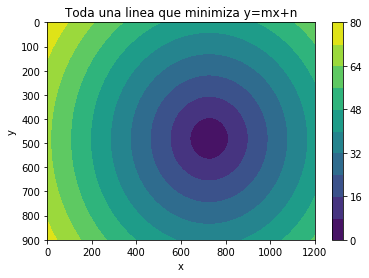

In [9]:


C, A, F = 0.09, 0.01, 1
def plot_radio(vector):
    plano = construct_radio(*vector)
    plot_plano(plano)
plot_radio([C,A,F])

### Plot de u


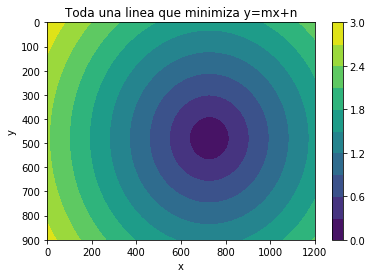

In [38]:
X0, Y0, a0 = 726.62320933, 479.34323936, 3.93382199
C, A, F = 1.11782417, 0, 0
V, S, D, P, Q = 0.003, 0.0001, 0.00001, 0, 0
E, ep = 1.90202401, 0.00914851

def plot_u(vector):
    plano = construct_u(*vector)
    plot_plano(plano)
plot_u([C, A, F, V, S, D, P, Q])

### Plot del angulo de orientacion de la camara

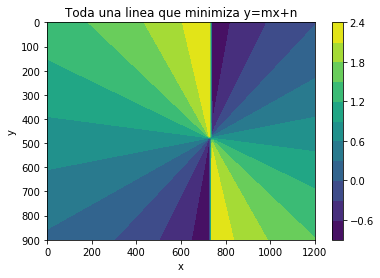

In [49]:
X0, Y0, a0 = 7.28125200e+02, 4.78181845e+02, 7.73853421e-01
C, A, F = 0.04952671, 0.00310034, -1.04782185
V, S, D, P, Q = 0.0682171007, 0.00310608468, -5.75141386e-05, 4.26865327e-06, -0.00415889519
E, ep = -4.82552710e-03, -0.0022711518934522366
def plot_b(vector):
    plano = construct_b(*vector)
    plot_plano(plano)
plot_b([E])

### Plot de Altura según algunos parametros del paper de Borovicka

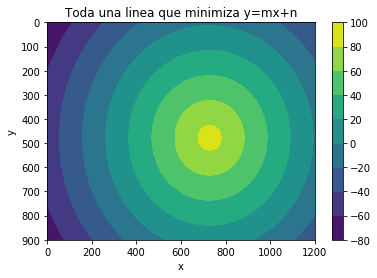

In [10]:
X0, Y0, a0 = 726.62320933, 479.34323936, 3.93382199
C, A, F = 1.11782417, 0, 0
V, S, D, P, Q = 0.003, 0.0001, 0.00001, 0, 0
E, ep = 1.90202401, 0.00914851

X0, Y0, a0 = 7.28125200e+02, 4.78181845e+02, 7.73853421e-01
C, A, F = 0.04952671, 0.00310034, -1.04782185
V, S, D, P, Q = 0.0682171007, 0.00310608468, -5.75141386e-05, 4.26865327e-06, -0.00415889519
E, ep = -4.82552710e-03, -0.0022711518934522366
def plot_z(vector):
    plano = construct_altura_deg(*vector)
    plot_plano(plano)
plot_z([C, A, F, V, S, D, P, Q, E, ep])

### Ahora el Azimuth

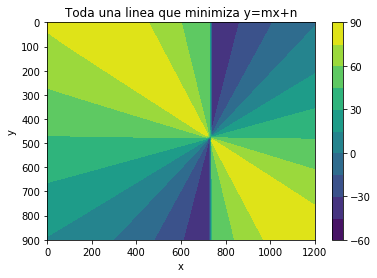

In [50]:
X0, Y0, a0 = 7.28125200e+02, 4.78181845e+02, 7.73853421e-01
C, A, F = 0.04952671, 0.00310034, -1.04782185
V, S, D, P, Q = 0.0682171007, 0.00310608468, -5.75141386e-05, 4.26865327e-06, -0.00415889519
E, ep = -4.82552710e-03, -0.0022711518934522366
def plot_az(vector):
    plano = construct_azimuth_deg(*vector)
    plot_plano(plano)
plot_az([C, A, F, V, S, D, P, Q, E, ep])

# Ahora interactivo

<IPython.core.display.Javascript object>


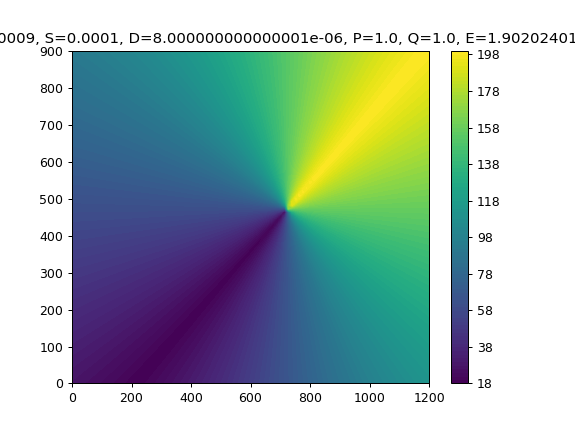

interactive(children=(FloatSlider(value=1.0, description='c', max=3.0, min=-1.0), FloatSlider(value=1.0, descr…

In [101]:
"""
Usar
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
"""

%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt


X0, Y0, a0 = float(724), float(472), 0.82635545
C, A, F = 1, 0, 0
V, S, D, P, Q = 0.003, 0.0001, 0.00001, 0, 0
E, ep = 1.90202401, 0.00914851
plano = construct_azimuth_deg(*[C, A, F, V, S, D, P, Q, E, ep])
x = np.linspace(0, 1200, 100)
y = np.linspace(0, 900, 100)
X, Y = np.meshgrid(x, y)
Z = plano(X, Y)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 100)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Toda una linea que minimiza y=mx+n')
plt.gca().invert_yaxis()
ax.set_xlabel('x')
ax.set_ylabel('y')
#     plt.scatter(X0,Y0)

def update(c=1.0, a=1.0, f=1.0, v=1.0, s=1.0, d=1.0, p=1.0, q=1.0, e=0.0, epp=0.0):
    
    plano = construct_azimuth_deg(*[C*c, A*a, F*f, V*v, S*s, D*d, P*p, Q*q, E*e, ep*epp])
    Z = plano(X, Y)
    ax.clear()
    cp = ax.contourf(X, Y, Z, 100)
    ax.set_title("C={}, A={}, F={}, V={}, S={}, D={}, P={}, Q={}, E={}, ep={}".format(C*c, A+a, F+f, V*v, S*s, D*d, P+p, Q+q, E+e, ep+epp)) 
    fig.canvas.draw_idle()

interact(update);

In [12]:
plano = construct_altura_deg(*[C, A, F, V, S, D, P, Q, E, ep])

In [15]:
x = np.arange(0, 1548)
y = np.arange(0, 1040)
X, Y = np.meshgrid(x, y)
Z = plano(X, Y)

In [17]:
X

array([[   0,    1,    2, ..., 1545, 1546, 1547],
       [   0,    1,    2, ..., 1545, 1546, 1547],
       [   0,    1,    2, ..., 1545, 1546, 1547],
       ...,
       [   0,    1,    2, ..., 1545, 1546, 1547],
       [   0,    1,    2, ..., 1545, 1546, 1547],
       [   0,    1,    2, ..., 1545, 1546, 1547]])

In [19]:
for row_x, row_y, row_z in zip(X,Y,Z):
    for x, y, z in zip(row_x, row_y, row_z):
        print(x, y, z)

0 0 -78.3376120376382
1 0 -78.176351902231
2 0 -78.01515850353104
3 0 -77.85403204511098
4 0 -77.69297273066422
5 0 -77.53198076404257
6 0 -77.37105634929222
7 0 -77.21019969068544
8 0 -77.04941099275209
9 0 -76.88869046030743
10 0 -76.72803829847871
11 0 -76.56745471272984
12 0 -76.40693990888474
13 0 -76.24649409314878
14 0 -76.0861174721293
15 0 -75.92581025285446
16 0 -75.7655726427916
17 0 -75.60540484986365
18 0 -75.44530708246575
19 0 -75.28527954947972
20 0 -75.12532246028857
21 0 -74.96543602479014
22 0 -74.80562045340963
23 0 -74.64587595711205
24 0 -74.48620274741356
25 0 -74.32660103639267
26 0 -74.16707103670058
27 0 -74.00761296157143
28 0 -73.84822702483149
29 0 -73.68891344090889
30 0 -73.52967242484195
31 0 -73.3705041922878
32 0 -73.21140895953062
33 0 -73.05238694348913
34 0 -72.89343836172432
35 0 -72.73456343244678
36 0 -72.57576237452358
37 0 -72.41703540748489
38 0 -72.2583827515308
39 0 -72.09980462753754
40 0 -71.94130125706366
41 0 -71.78287286235599
42 0 -71.

564 0 -7.82212229629404
565 0 -7.759813317409609
566 0 -7.697847454566656
567 0 -7.636225367280872
568 0 -7.5749477131203236
569 0 -7.514015147676318
570 0 -7.453428324533718
571 0 -7.393187895241482
572 0 -7.333294509283093
573 0 -7.273748814046925
574 0 -7.214551454796663
575 0 -7.155703074641551
576 0 -7.097204314506698
577 0 -7.039055813103232
578 0 -6.981258206898545
579 0 -6.923812130086546
580 0 -6.8667182145577215
581 0 -6.809977089869221
582 0 -6.753589383215143
583 0 -6.697555719396405
584 0 -6.641876720790975
585 0 -6.586553007323786
586 0 -6.531585196436907
587 0 -6.476973903059573
588 0 -6.422719739578071
589 0 -6.36882331580604
590 0 -6.31528523895426
591 0 -6.262106113600808
592 0 -6.2092865416611005
593 0 -6.156827122357967
594 0 -6.104728452191637
595 0 -6.052991124909994
596 0 -6.001615731478452
597 0 -5.950602860050296
598 0 -5.8999530959367945
599 0 -5.8496670215772895
600 0 -5.799745216509436
601 0 -5.75018825733963
602 0 -5.700996717712982
603 0 -5.652171168283985

1082 0 -25.34111560633812
1083 0 -25.45692727084335
1084 0 -25.572948848376697
1085 0 -25.68917970883504
1086 0 -25.80561922349908
1087 0 -25.92226676503782
1088 0 -26.039121707512834
1089 0 -26.15618342638274
1090 0 -26.273451298507112
1091 0 -26.39092470215047
1092 0 -26.508603016986683
1093 0 -26.626485624102344
1094 0 -26.744571906000616
1095 0 -26.86286124660532
1096 0 -26.981353031264078
1097 0 -27.10004664675182
1098 0 -27.21894148127464
1099 0 -27.338036924472462
1100 0 -27.45733236742295
1101 0 -27.57682720264397
1102 0 -27.696520824097178
1103 0 -27.816412627190743
1104 0 -27.936502008782156
1105 0 -28.056788367181184
1106 0 -28.177271102152616
1107 0 -28.29794961491868
1108 0 -28.418823308161663
1109 0 -28.539891586026513
1110 0 -28.66115385412307
1111 0 -28.78260951952842
1112 0 -28.904257990789034
1113 0 -29.02609867792306
1114 0 -29.148130992422224
1115 0 -29.270354347253914
1116 0 -29.392768156863113
1117 0 -29.515371837174172
1118 0 -29.638164805592524
1119 0 -29.761146

69 1 -67.26462887160588
70 1 -67.10836170453271
71 1 -66.95217635985651
72 1 -66.79607308337356
73 1 -66.64005212171122
74 1 -66.48411372233156
75 1 -66.32825813353494
76 1 -66.17248560446382
77 1 -66.01679638510586
78 1 -65.86119072629776
79 1 -65.70566887972902
80 1 -65.55023109794482
81 1 -65.39487763435031
82 1 -65.23960874321341
83 1 -65.0844246796687
84 1 -64.92932569972072
85 1 -64.7743120602475
86 1 -64.61938401900406
87 1 -64.46454183462572
88 1 -64.30978576663156
89 1 -64.15511607542808
90 1 -64.00053302231214
91 1 -63.84603686947497
92 1 -63.69162788000497
93 1 -63.53730631789168
94 1 -63.38307244802874
95 1 -63.22892653621756
96 1 -63.074868849170514
97 1 -62.920899654514386
98 1 -62.767019220794
99 1 -62.613227817475234
100 1 -62.459525714948455
101 1 -62.30591318453216
102 1 -62.15239049847611
103 1 -61.99895792996469
104 1 -61.845615753120455
105 1 -61.69236424300732
106 1 -61.53920367563413
107 1 -61.386134327957734
108 1 -61.233156477886666
109 1 -61.080270404284136
11

516 1 -11.026148018610115
517 1 -10.948038488323718
518 1 -10.870239014373723
519 1 -10.79275032000568
520 1 -10.715573127835285
521 1 -10.638708159823494
522 1 -10.562156137251662
523 1 -10.48591778069651
524 1 -10.409993810004906
525 1 -10.33438494426845
526 1 -10.259091901798215
527 1 -10.184115400099074
528 1 -10.109456155843816
529 1 -10.035114884847673
530 1 -9.961092302042005
531 1 -9.887389121448393
532 1 -9.814006056152238
533 1 -9.740943818276747
534 1 -9.6682031189561
535 1 -9.595784668309108
536 1 -9.523689175412315
537 1 -9.451917348273398
538 1 -9.380469893804005
539 1 -9.309347517792887
540 1 -9.238550924878567
541 1 -9.168080818522185
542 1 -9.09793790098
543 1 -9.028122873276047
544 1 -8.958636435174242
545 1 -8.889479285151097
546 1 -8.820652120367455
547 1 -8.752155636640936
548 1 -8.683990528417624
549 1 -8.616157488744236
550 1 -8.548657209239693
551 1 -8.481490380066887
552 1 -8.414657689904331
553 1 -8.348159825917605
554 1 -8.281997473730826
555 1 -8.21617131739

927 1 -10.17653758529076
928 1 -10.251657078408982
929 1 -10.327095407716286
930 1 -10.402851858469688
931 1 -10.478925715037036
932 1 -10.555316260923078
933 1 -10.632022778795388
934 1 -10.70904455050983
935 1 -10.786380857136677
936 1 -10.864030978985596
937 1 -10.941994195631167
938 1 -11.02026978593824
939 1 -11.098857028086854
940 1 -11.177755199597172
941 1 -11.25696357735437
942 1 -11.336481437633338
943 1 -11.416308056123157
944 1 -11.496442707951388
945 1 -11.57688466770854
946 1 -11.657633209472024
947 1 -11.738687606830155
948 1 -11.820047132906069
949 1 -11.901711060381274
950 1 -11.983678661519292
951 1 -12.065949208188911
952 1 -12.148521971887646
953 1 -12.231396223764662
954 1 -12.314571234643779
955 1 -12.398046275046298
956 1 -12.481820615213664
957 1 -12.565893525129866
958 1 -12.650264274544014
959 1 -12.734932132992228
960 1 -12.819896369819986
961 1 -12.905156254203845
962 1 -12.990711055173264
963 1 -13.07656004163222
964 1 -13.162702482380496
965 1 -13.24913764

1513 1 -88.24752527658103
1514 1 -88.41353034318385
1515 1 -88.57958553403759
1516 1 -88.74568806498272
1517 1 -88.91183354657593
1518 1 -89.07801453557505
1519 1 -89.24421717412827
1520 1 -89.4104121430504
1521 1 -89.57652431965778
1522 1 -89.74228524409753
1523 1 -89.90552689716628
1524 1 -89.91686231073868
1525 1 -89.75417029891648
1526 1 -89.58824606499448
1527 1 -89.42181844575285
1528 1 -89.2551881252603
1529 1 -89.08843637448874
1530 1 -88.92159434644839
1531 1 -88.75467659728034
1532 1 -88.58769087986701
1533 1 -88.42064173500174
1534 1 -88.25353202504076
1535 1 -88.08636366537519
1536 1 -87.91913800396335
1537 1 -87.75185603180003
1538 1 -87.58451850611019
1539 1 -87.41712602575836
1540 1 -87.24967907918472
1541 1 -87.08217807587596
1542 1 -86.91462336761157
1543 1 -86.74701526316343
1544 1 -86.57935403868618
1545 1 -86.41163994520309
1546 1 -86.2438732140954
1547 1 -86.07605406118645
0 2 -78.12535915912733
1 2 -77.96389482590365
2 2 -77.80249693407848
3 2 -77.64116568614901
4

440 2 -17.648580838754427
441 2 -17.548883421465078
442 2 -17.449441019959437
443 2 -17.350254346693205
444 2 -17.251324114946883
445 2 -17.152651038812294
446 2 -17.05423583317929
447 2 -16.956079213722347
448 2 -16.858181896886805
449 2 -16.76054459987519
450 2 -16.663168040632968
451 2 -16.566052937834854
452 2 -16.469200010870225
453 2 -16.372609979828823
454 2 -16.276283565486168
455 2 -16.180221489288883
456 2 -16.08442447333978
457 2 -15.988893240382666
458 2 -15.893628513787519
459 2 -15.79863101753476
460 2 -15.703901476199931
461 2 -15.609440614938123
462 2 -15.515249159467984
463 2 -15.421327836055823
464 2 -15.327677371499476
465 2 -15.234298493112021
466 2 -15.141191928705396
467 2 -15.048358406573598
468 2 -14.955798655476158
469 2 -14.86351340462113
470 2 -14.771503383647868
471 2 -14.679769322610042
472 2 -14.588311951958133
473 2 -14.49713200252178
474 2 -14.406230205492179
475 2 -14.315607292404195
476 2 -14.225263995118254
477 2 -14.135201045802276
478 2 -14.04541917

949 2 -11.72588739972916
950 2 -11.807995763628284
951 2 -11.890407370172
952 2 -11.973121487625832
953 2 -12.056137383915555
954 2 -12.13945432665028
955 2 -12.223071583145583
956 2 -12.306988420446018
957 2 -12.391204105347924
958 2 -12.475717904421813
959 2 -12.560529084034712
960 2 -12.645636910372346
961 2 -12.731040649461079
962 2 -12.816739567189828
963 2 -12.902732929331862
964 2 -12.989020001566047
965 2 -13.075600049498618
966 2 -13.162472338684111
967 2 -13.249636134646678
968 2 -13.337090702900738
969 2 -13.424835308972064
970 2 -13.512869218418118
971 2 -13.601191696848616
972 2 -13.689802009945808
973 2 -13.77869942348471
974 2 -13.867883203352918
975 2 -13.957352615570457
976 2 -14.047106926309496
977 2 -14.137145401913926
978 2 -14.227467308918463
979 2 -14.318071914068057
980 2 -14.408958484336864
981 2 -14.500126286946937
982 2 -14.591574589387164
983 2 -14.683302659431746
984 2 -14.77530976515851
985 2 -14.867595174967065
986 2 -14.960158157597192
987 2 -15.052997982

1334 2 -59.50261008399147
1335 2 -59.65544758987346
1336 2 -59.80838077925151
1337 2 -59.96140935958175
1338 2 -60.11453303932919
1339 2 -60.267751527964606
1340 2 -60.421064535960824
1341 2 -60.57447177478994
1342 2 -60.72797295691959
1343 2 -60.88156779581021
1344 2 -61.035256005911236
1345 2 -61.189037302658164
1346 2 -61.342911402469184
1347 2 -61.496878022741924
1348 2 -61.65093688185024
1349 2 -61.80508769914107
1350 2 -61.959330194930885
1351 2 -62.11366409050291
1352 2 -62.268089108103425
1353 2 -62.42260497093892
1354 2 -62.5772114031727
1355 2 -62.73190812992166
1356 2 -62.886694877253234
1357 2 -63.041571372182005
1358 2 -63.19653734266657
1359 2 -63.351592517606576
1360 2 -63.506736626839114
1361 2 -63.66196940113588
1362 2 -63.81729057219994
1363 2 -63.97269987266233
1364 2 -64.12819703607948
1365 2 -64.28378179692919
1366 2 -64.43945389060823
1367 2 -64.59521305342906
1368 2 -64.75105902261623
1369 2 -64.90699153630379
1370 2 -65.0630103335319
1371 2 -65.21911515424381
13

306 3 -32.893177654244354
307 3 -32.765130042019734
308 3 -32.637252876899666
309 3 -32.509546694482054
310 3 -32.38201203189344
311 3 -32.2546494277896
312 3 -32.127459422356
313 3 -32.000442557308105
314 3 -31.8735993758917
315 3 -31.74693042288341
316 3 -31.620436244590593
317 3 -31.494117388851734
318 3 -31.367974405036577
319 3 -31.242007844045872
320 3 -31.116218258311932
321 3 -30.99060620179803
322 3 -30.865172229998606
323 3 -30.73991689993896
324 3 -30.614840770175007
325 3 -30.489944400793107
326 3 -30.36522835340965
327 3 -30.240693191170337
328 3 -30.116339478750277
329 3 -29.992167782352922
330 3 -29.86817866970965
331 3 -29.744372710079205
332 3 -29.620750474246663
333 3 -29.497312534522877
334 3 -29.374059464743382
335 3 -29.250991840267744
336 3 -29.128110237978163
337 3 -29.005415236278694
338 3 -28.882907415093783
339 3 -28.76058735586753
340 3 -28.63845564156179
341 3 -28.516512856655183
342 3 -28.394759587141564
343 3 -28.27319642052845
344 3 -28.151823945835446
34

942 3 -10.982942819516197
943 3 -11.06304705793184
944 3 -11.14345996947813
945 3 -11.224180822150785
946 3 -11.305208883448103
947 3 -11.386543420394943
948 3 -11.468183699567064
949 3 -11.550128987115045
950 3 -11.632378548787926
951 3 -11.714931649957052
952 3 -11.797787555639388
953 3 -11.880945530521075
954 3 -11.964404838980485
955 3 -12.048164745111265
956 3 -12.132224512745367
957 3 -12.21658340547556
958 3 -12.301240686678284
959 3 -12.386195619535911
960 3 -12.47144746705905
961 3 -12.556995492108655
962 3 -12.642838957418121
963 3 -12.72897712561489
964 3 -12.815409259242202
965 3 -12.902134620780714
966 3 -12.98915247266956
967 3 -13.07646207732779
968 3 -13.164062697175225
969 3 -13.251953594653429
970 3 -13.340134032246397
971 3 -13.42860327250088
972 3 -13.517360578047189
973 3 -13.606405211619034
974 3 -13.69573643607373
975 3 -13.785353514412165
976 3 -13.875255709798466
977 3 -13.965442285579599
978 3 -14.055912505304732
979 3 -14.146665632744572
980 3 -14.23770093191

32 4 -72.77415899806411
33 4 -72.61470894905207
34 4 -72.45533169771866
35 4 -72.2960274613232
36 4 -72.1367964577941
37 4 -71.97763890573592
38 4 -71.81855502443472
39 4 -71.65954503386465
40 4 -71.50060915469328
41 4 -71.3417476082873
42 4 -71.18296061671819
43 4 -71.02424840276726
44 4 -70.86561118993103
45 4 -70.70704920242648
46 4 -70.54856266519567
47 4 -70.39015180391101
48 4 -70.23181684497976
49 4 -70.07355801554897
50 4 -69.91537554350992
51 4 -69.75726965750283
52 4 -69.59924058692118
53 4 -69.44128856191622
54 4 -69.28341381340118
55 4 -69.12561657305571
56 4 -68.96789707332996
57 4 -68.81025554744878
58 4 -68.65269222941595
59 4 -68.49520735401794
60 4 -68.33780115682833
61 4 -68.18047387421146
62 4 -68.02322574332655
63 4 -67.86605700213138
64 4 -67.70896788938663
65 4 -67.55195864465901
66 4 -67.39502950832568
67 4 -67.23818072157792
68 4 -67.0814125264244
69 4 -66.92472516569543
70 4 -66.76811888304653
71 4 -66.61159392296184
72 4 -66.45515053075817
73 4 -66.29878895258

749 4 -1.9041254381301371
750 4 -1.9132377681210642
751 4 -1.9227574905122964
752 4 -1.9326844863193031
753 4 -1.9430186311854527
754 4 -1.953759795390397
755 4 -1.96490784385864
756 4 -1.9764626361683924
757 4 -1.9884240265610629
758 4 -2.0007918639506386
759 4 -2.0135659919338735
760 4 -2.026746248800535
761 4 -2.04033246754409
762 4 -2.054324475872619
763 4 -2.0687220962203554
764 4 -2.083525145759154
765 4 -2.0987334364106545
766 4 -2.1143467748585607
767 4 -2.130364962561302
768 4 -2.1467877957651353
769 4 -2.1636150655173196
770 4 -2.1808465576799563
771 4 -2.198482052943774
772 4 -2.2165213268426243
773 4 -2.234964149767947
774 4 -2.253810286983736
775 4 -2.2730594986419277
776 4 -2.2927115397977076
777 4 -2.3127661604256247
778 4 -2.3332231054355503
779 4 -2.3540821146893904
780 4 -2.375342923017641
781 4 -2.3970052602365968
782 4 -2.4190688511657754
783 4 -2.4415334156454236
784 4 -2.464398668554608
785 4 -2.4876643198295056
786 4 -2.511330074481748
787 4 -2.535395632617494
78

1431 4 -74.51642042110765
1432 4 -74.67752653894257
1433 4 -74.83870387483046
1434 4 -74.99995221990758
1435 4 -75.16127136602199
1436 4 -75.32266110573053
1437 4 -75.48412123229537
1438 4 -75.64565153968067
1439 4 -75.80725182254972
1440 4 -75.96892187626099
1441 4 -76.13066149686506
1442 4 -76.29247048110105
1443 4 -76.45434862639343
1444 4 -76.61629573084792
1445 4 -76.77831159324819
1446 4 -76.94039601305218
1447 4 -77.10254879038811
1448 4 -77.26476972605064
1449 4 -77.42705862149708
1450 4 -77.58941527884312
1451 4 -77.7518395008585
1452 4 -77.91433109096309
1453 4 -78.07688985322207
1454 4 -78.23951559234132
1455 4 -78.40220811366257
1456 4 -78.56496722315859
1457 4 -78.72779272742784
1458 4 -78.89068443368888
1459 4 -79.0536421497747
1460 4 -79.21666568412701
1461 4 -79.37975484578936
1462 4 -79.54290944440066
1463 4 -79.7061292901881
1464 4 -79.86941419395947
1465 4 -80.0327639670951
1466 4 -80.1961784215394
1467 4 -80.35965736979111
1468 4 -80.5232006248936
1469 4 -80.6868080

364 5 -25.4582415150102
365 5 -25.340699199295386
366 5 -25.22336081563786
367 5 -25.106226990241908
368 5 -24.98929835078505
369 5 -24.872575526414423
370 5 -24.756059147743358
371 5 -24.639749846846925
372 5 -24.523648257258614
373 5 -24.407755013965968
374 5 -24.292070753406534
375 5 -24.176596113463603
376 5 -24.061331733461927
377 5 -23.946278254163317
378 5 -23.83143631776194
379 5 -23.716806567879885
380 5 -23.602389649562312
381 5 -23.48818620927257
382 5 -23.37419689488729
383 5 -23.260422355691404
384 5 -23.146863242372802
385 5 -23.03352020701712
386 5 -22.920393903102465
387 5 -22.80748498549373
388 5 -22.694794110437144
389 5 -22.58232193555439
390 5 -22.470069119836893
391 5 -22.358036323639894
392 5 -22.246224208676225
393 5 -22.13463343801027
394 5 -22.023264676051696
395 5 -21.912118588548807
396 5 -21.80119584258236
397 5 -21.690497106558553
398 5 -21.58002305020264
399 5 -21.469774344551638
400 5 -21.359751661947627
401 5 -21.249955676030496
402 5 -21.14038706173062


785 5 -2.2952987478295057
786 5 -2.3190126391572647
787 5 -2.34312714290958
788 5 -2.367641952415468
789 5 -2.3925567561083767
790 5 -2.417871237546038
791 5 -2.443585075430434
792 5 -2.4696979436284465
793 5 -2.496209511192319
794 5 -2.523119442380761
795 5 -2.550427396679993
796 5 -2.5781330288253486
797 5 -2.6062359888230304
798 5 -2.6347359219718243
799 5 -2.6636324688856945
800 5 -2.6929252655159246
801 5 -2.7226139431741387
802 5 -2.752698128554954
803 5 -2.7831774437594845
804 5 -2.8140515063185347
805 5 -2.8453199292164015
806 5 -2.8769823209147347
807 5 -2.9090382853766386
808 5 -2.9414874220909866
809 5 -2.9743293260971484
810 5 -3.0075635880094467
811 5 -3.0411897940425376
812 5 -3.0752075260362375
813 5 -3.1096163614811587
814 5 -3.1444158735442187
815 5 -3.1796056310944607
816 5 -3.21518519872906
817 5 -3.2511541367994
818 5 -3.287512001437662
819 5 -3.3242583445831
820 5 -3.361392714009014
821 5 -3.398914653349536
822 5 -3.436823702126759
823 5 -3.4751193957779662
824 5 -

1273 5 -49.99085896873814
1274 5 -50.137662519854246
1275 5 -50.28458112345953
1276 5 -50.431614418781066
1277 5 -50.578762046271606
1278 5 -50.7260236476059
1279 5 -50.87339886567776
1280 5 -51.02088734459622
1281 5 -51.168488729682025
1282 5 -51.31620266746455
1283 5 -51.464028805677714
1284 5 -51.61196679325707
1285 5 -51.76001628033609
1286 5 -51.90817691824259
1287 5 -52.05644835949553
1288 5 -52.20483025780109
1289 5 -52.35332226804971
1290 5 -52.5019240463123
1291 5 -52.65063524983674
1292 5 -52.79945553704451
1293 5 -52.94838456752717
1294 5 -53.097422002042975
1295 5 -53.24656750251302
1296 5 -53.39582073201828
1297 5 -53.5451813547958
1298 5 -53.69464903623529
1299 5 -53.844223442875716
1300 5 -53.993904242401584
1301 5 -54.14369110363981
1302 5 -54.293583696555885
1303 5 -54.443581692250774
1304 5 -54.59368476295708
1305 5 -54.74389258203581
1306 5 -54.89420482397276
1307 5 -55.044621164375314
1308 5 -55.19514127996851
1309 5 -55.34576484859201
1310 5 -55.49649154919638
1311

231 6 -42.54486006565091
232 6 -42.40502270441351
233 6 -42.265319391417506
234 6 -42.125750553104126
235 6 -41.98631661731301
236 6 -41.84701801328572
237 6 -41.707855171668484
238 6 -41.568828524515425
239 6 -41.429938505291204
240 6 -41.29118554887472
241 6 -41.15257009156133
242 6 -41.01409257106636
243 6 -40.87575342652764
244 6 -40.737553098508926
245 6 -40.599492029002306
246 6 -40.46157066143141
247 6 -40.323789440654195
248 6 -40.18614881296571
249 6 -40.04864922610113
250 6 -39.91129112923835
251 6 -39.77407497300089
252 6 -39.63700120946058
253 6 -39.50007029214052
254 6 -39.363282676017576
255 6 -39.22663881752507
256 6 -39.090139174555674
257 6 -38.953784206463865
258 6 -38.81757437406861
259 6 -38.68151013965601
260 6 -38.5455919669819
261 6 -38.40982032127428
262 6 -38.27419566923595
263 6 -38.138718479046986
264 6 -38.003389220367325
265 6 -37.868208364338926
266 6 -37.73317638358854
267 6 -37.59829375222981
268 6 -37.46356094586588
269 6 -37.328978441591545
270 6 -37.1

713 6 -1.4607221046817074
714 6 -1.4551086977120633
715 6 -1.4499050737993997
716 6 -1.445111310801252
717 6 -1.4407274810768769
718 6 -1.4367536514823058
719 6 -1.433189883365813
720 6 -1.4300362325638218
721 6 -1.4272927493971395
722 6 -1.4249594786676596
723 6 -1.4230364596551368
724 6 -1.4215237261147564
725 6 -1.4204213062747328
726 6 -1.4197292228344764
727 6 -1.4194474929629735
728 6 -1.4195761282977486
729 6 -1.4201151349440124
730 6 -1.4210645134742066
731 6 -1.422424258928075
732 6 -1.4241943608129048
733 6 -1.4263748031042667
734 6 -1.4289655642471217
735 6 -1.4319666171572436
736 6 -1.4353779292230513
737 6 -1.4391994623077409
738 6 -1.4434311727520281
739 6 -1.4480730113769198
740 6 -1.453124923487053
741 6 -1.4585868488744893
742 6 -1.464458721822595
743 6 -1.4707404711106022
744 6 -1.4774320200183269
745 6 -1.4845332863313985
746 6 -1.4920441823466888
747 6 -1.499964614878209
748 6 -1.5082944852634483
749 6 -1.5170336893699954
750 6 -1.526182117602346
751 6 -1.5357396549

1123 6 -29.360693570210913
1124 6 -29.485534871319828
1125 6 -29.610560888979705
1126 6 -29.735771045613532
1127 6 -29.861164765200513
1128 6 -29.986741473276638
1129 6 -30.11250059693559
1130 6 -30.238441564829174
1131 6 -30.364563807167954
1132 6 -30.490866755721697
1133 6 -30.61734984381971
1134 6 -30.74401250635144
1135 6 -30.870854179766354
1136 6 -30.99787430207465
1137 6 -31.125072312846996
1138 6 -31.25244765321473
1139 6 -31.379999765870224
1140 6 -31.50772809506634
1141 6 -31.63563208661678
1142 6 -31.76371118789565
1143 6 -31.891964847837386
1144 6 -32.02039251693664
1145 6 -32.14899364724768
1146 6 -32.27776769238419
1147 6 -32.40671410751881
1148 6 -32.53583234938263
1149 6 -32.66512187626479
1150 6 -32.79458214801171
1151 6 -32.92421262602659
1152 6 -33.05401277326851
1153 6 -33.18398205425201
1154 6 -33.31411993504602
1155 6 -33.44442588327311
1156 6 -33.57489936810863
1157 6 -33.70553986027973
1158 6 -33.836346832064336
1159 6 -33.967319757290184
1160 6 -34.098458111333

32 7 -72.44786981015505
33 7 -72.28809886505383
34 7 -72.12840023553915
35 7 -71.96877413814943
36 7 -71.80922079010136
37 7 -71.64974040929576
38 7 -71.49033321432353
39 7 -71.33099942447114
40 7 -71.17173925972645
41 7 -71.01255294078356
42 7 -70.85344068904868
43 7 -70.69440272664485
44 7 -70.53543927641704
45 7 -70.3765505619372
46 7 -70.21773680750894
47 7 -70.05899823817242
48 7 -69.90033507970907
49 7 -69.74174755864564
50 7 -69.58323590225947
51 7 -69.42480033858237
52 7 -69.2664410964052
53 7 -69.1081584052821
54 7 -68.94995249553486
55 7 -68.79182359825691
56 7 -68.6337719453177
57 7 -68.47579776936661
58 7 -68.317901303837
59 7 -68.16008278295044
60 7 -68.0023424417204
61 7 -67.84468051595627
62 7 -67.68709724226738
63 7 -67.5295928580667
64 7 -67.37216760157486
65 7 -67.21482171182359
66 7 -67.05755542865992
67 7 -66.90036899274983
68 7 -66.74326264558161
69 7 -66.58623662947014
70 7 -66.4292911875601
71 7 -66.27242656382992
72 7 -66.11564300309527
73 7 -65.95894075101279
7

464 7 -14.482150539159548
465 7 -14.38801159983106
466 7 -14.29414580881516
467 7 -14.200553908541153
468 7 -14.107236641966566
469 7 -14.014194752560087
470 7 -13.92142898428412
471 7 -13.828940081577173
472 7 -13.736728789336354
473 7 -13.644795852899477
474 7 -13.553142018026833
475 7 -13.461768030883249
476 7 -13.370674638019594
477 7 -13.279862586354284
478 7 -13.18933262315457
479 7 -13.099085496017665
480 7 -13.0091219528518
481 7 -12.919442741856784
482 7 -12.830048611505035
483 7 -12.740940310521594
484 7 -12.652118587864749
485 7 -12.563584192706031
486 7 -12.4753378744102
487 7 -12.387380382514905
488 7 -12.299712466710574
489 7 -12.212334876819668
490 7 -12.125248362776063
491 7 -12.038453674603986
492 7 -11.951951562397326
493 7 -11.865742776298077
494 7 -11.779828066475076
495 7 -11.694208183102589
496 7 -11.608883876338439
497 7 -11.52385589630211
498 7 -11.4391249930529
499 7 -11.354691916567461
500 7 -11.270557416717693
501 7 -11.186722243248013
502 7 -11.1031871457526

1106 7 -27.11598003936166
1107 7 -27.23774770164502
1108 7 -27.359710063521206
1109 7 -27.4818665198126
1110 7 -27.604216466885475
1111 7 -27.7267593026516
1112 7 -27.849494426570587
1113 7 -27.972421239651283
1114 7 -28.095539144453724
1115 7 -28.21884754509078
1116 7 -28.342345847229666
1117 7 -28.466033458093463
1118 7 -28.58990978646247
1119 7 -28.71397424267569
1120 7 -28.838226238632004
1121 7 -28.96266518779123
1122 7 -29.08729050517566
1123 7 -29.212101607370613
1124 7 -29.337097912525593
1125 7 -29.462278840355438
1126 7 -29.587643812140882
1127 7 -29.713192250729293
1128 7 -29.838923580535493
1129 7 -29.96483722754232
1130 7 -30.090932619301327
1131 7 -30.21720918493311
1132 7 -30.343666355127723
1133 7 -30.47030356214519
1134 7 -30.59712023981575
1135 7 -30.72411582353986
1136 7 -30.85128975028873
1137 7 -30.978641458604287
1138 7 -31.106170388599153
1139 7 -31.23387598195653
1140 7 -31.361757681930527
1141 7 -31.489814933345627
1142 7 -31.618047182596513
1143 7 -31.74645387

121 8 -58.41926565972335
122 8 -58.26674488249205
123 8 -58.114318670832944
124 8 -57.961987317856824
125 8 -57.80975111769922
126 8 -57.65761036552368
127 8 -57.505565357525256
128 8 -57.35361639093412
129 8 -57.20176376401909
130 8 -57.05000777609112
131 8 -56.89834872750686
132 8 -56.746786919672104
133 8 -56.59532265504552
134 8 -56.44395623714192
135 8 -56.29268797053609
136 8 -56.14151816086607
137 8 -55.99044711483688
138 8 -55.83947514022401
139 8 -55.68860254587699
140 8 -55.537829641722794
141 8 -55.38715673876979
142 8 -55.2365841491108
143 8 -55.08611218592699
144 8 -54.9357411634914
145 8 -54.78547139717233
146 8 -54.635303203437275
147 8 -54.48523689985592
148 8 -54.33527280510438
149 8 -54.18541123896833
150 8 -54.03565252234648
151 8 -53.88599697725485
152 8 -53.73644492682945
153 8 -53.58699669533044
154 8 -53.43765260814561
155 8 -53.28841299179396
156 8 -53.139278173929114
157 8 -52.990248483343066
158 8 -52.841324249969915
159 8 -52.692505804889095
160 8 -52.5437934

678 8 -1.5291144888129224
679 8 -1.5091637987012376
680 8 -1.489618429033868
681 8 -1.4704786475993359
682 8 -1.4517447170188262
683 8 -1.4334168947286798
684 8 -1.4154954329635387
685 8 -1.3979805787398476
686 8 -1.3808725738394259
687 8 -1.3641716547935374
688 8 -1.3478780528673866
689 8 -1.3319919940445004
690 8 -1.316513699012134
691 8 -1.301443383146406
692 8 -1.286781256498017
693 8 -1.2725275237782796
694 8 -1.2586823843454908
695 8 -1.2452460321917016
696 8 -1.2322186559296568
697 8 -1.2196004387803754
698 8 -1.2073915585606443
699 8 -1.1955921876713091
700 8 -1.1842024930857633
701 8 -1.1732226363384939
702 8 -1.1626527735145373
703 8 -1.1524930552387929
704 8 -1.1427436266659612
705 8 -1.1334046274708243
706 8 -1.124476191838781
707 8 -1.1159584484567375
708 8 -1.1078515205046386
709 8 -1.1001555256469544
710 8 -1.0928705760247226
711 8 -1.0859967782482016
712 8 -1.0795342333894666
713 8 -1.0734830369755315
714 8 -1.067843278982096
715 8 -1.0626150438272361
716 8 -1.057798410

1418 8 -71.99077182368464
1419 8 -72.15136444196446
1420 8 -72.31203040682348
1421 8 -72.47276950062667
1422 8 -72.6335815064943
1423 8 -72.79446620829901
1424 8 -72.95542339066245
1425 8 -73.11645283895268
1426 8 -73.27755433928087
1427 8 -73.4387276784984
1428 8 -73.59997264419357
1429 8 -73.76128902468884
1430 8 -73.92267660903767
1431 8 -74.08413518702119
1432 8 -74.2456645491454
1433 8 -74.40726448663787
1434 8 -74.56893479144469
1435 8 -74.7306752562273
1436 8 -74.8924856743592
1437 8 -75.05436583992287
1438 8 -75.21631554770644
1439 8 -75.37833459320032
1440 8 -75.54042277259435
1441 8 -75.70257988277379
1442 8 -75.86480572131646
1443 8 -76.02710008648887
1444 8 -76.18946277724339
1445 8 -76.35189359321382
1446 8 -76.5143923347126
1447 8 -76.67695880272663
1448 8 -76.83959279891371
1449 8 -77.0022941255987
1450 8 -77.1650625857697
1451 8 -77.32789798307374
1452 8 -77.49080012181307
1453 8 -77.65376880694049
1454 8 -77.81680384405547
1455 8 -77.97990503939903
1456 8 -78.143072199

591 9 -4.587872453924902
592 9 -4.534107611425668
593 9 -4.480708229295601
594 9 -4.427674934487513
595 9 -4.375008351122588
596 9 -4.322709100458155
597 9 -4.270777800855399
598 9 -4.219215067747044
599 9 -4.16802151360524
600 9 -4.117197747909103
601 9 -4.066744377112784
602 9 -4.0166620046131385
603 9 -3.9669512307177257
604 9 -3.917612652612661
605 9 -3.8686468643305716
606 9 -3.8200544567187222
607 9 -3.7718360174068692
608 9 -3.7239921307756703
609 9 -3.6765233779245534
610 9 -3.6294303366401977
611 9 -3.582713581364686
612 9 -3.5363736831639727
613 9 -3.4904112096962905
614 9 -3.4448267251805476
615 9 -3.3996207903652333
616 9 -3.3547939624967853
617 9 -3.310346795288538
618 9 -3.2662798388895737
619 9 -3.2225936398535424
620 9 -3.179288741107868
621 9 -3.1363656819228964
622 9 -3.0938249978810575
623 9 -3.051667220846312
624 9 -3.0098928789335844
625 9 -2.9685024964784077
626 9 -2.9274965940067403
627 9 -2.8868756882044835
628 9 -2.8466402918878657
629 9 -2.806790913973302
630 

1322 9 -56.83134095614602
1323 9 -56.9838770363819
1324 9 -57.136511163098646
1325 9 -57.28924303169211
1326 9 -57.442072338623746
1327 9 -57.59499878141713
1328 9 -57.7480220586543
1329 9 -57.901141869972406
1330 9 -58.0543579160603
1331 9 -58.20766989865476
1332 9 -58.36107752053729
1333 9 -58.51458048553059
1334 9 -58.66817849849497
1335 9 -58.82187126532506
1336 9 -58.975658492946195
1337 9 -59.12953988931099
1338 9 -59.28351516339609
1339 9 -59.43758402519839
1340 9 -59.59174618573178
1341 9 -59.746001357024056
1342 9 -59.900349252112704
1343 9 -60.05478958504224
1344 9 -60.20932207086045
1345 9 -60.363946425614955
1346 9 -60.5186623663499
1347 9 -60.673469611102604
1348 9 -60.828367878900195
1349 9 -60.98335688975604
1350 9 -61.138436364666376
1351 9 -61.293606025607346
1352 9 -61.448865595531174
1353 9 -61.604214798362904
1354 9 -61.75965335899727
1355 9 -61.91518100329512
1356 9 -62.07079745808019
1357 9 -62.22650245113579
1358 9 -62.38229571120138
1359 9 -62.538176967969235
13

435 10 -16.83494415685871
436 10 -16.732732248747496
437 10 -16.630772517503658
438 10 -16.529065690919055
439 10 -16.427612497783485
440 10 -16.326413667871776
441 10 -16.225469931931556
442 10 -16.12478202167
443 10 -16.024350669740983
444 10 -15.924176609731859
445 10 -15.82426057615011
446 10 -15.724603304409797
447 10 -15.62520553081798
448 10 -15.526067992560769
449 10 -15.427191427689493
450 10 -15.328576575106396
451 10 -15.230224174550301
452 10 -15.132134966582285
453 10 -15.034309692570886
454 10 -14.936749094677282
455 10 -14.839453915840465
456 10 -14.742424899761986
457 10 -14.645662790890484
458 10 -14.549168334406474
459 10 -14.452942276206628
460 10 -14.356985362887826
461 10 -14.261298341731248
462 10 -14.165881960686278
463 10 -14.070736968354069
464 10 -13.97586411397117
465 10 -13.881264147392727
466 10 -13.786937819075803
467 10 -13.692885880062107
468 10 -13.59910908196116
469 10 -13.50560817693271
470 10 -13.412383917669246
471 10 -13.319437057378394
472 10 -13.

1046 10 -19.708544262432625
1047 10 -19.81794175882905
1048 10 -19.927573042107866
1049 10 -20.037437415346048
1050 10 -20.147534182907123
1051 10 -20.257862650449525
1052 10 -20.36842212493464
1053 10 -20.479211914634973
1054 10 -20.59023132914207
1055 10 -20.70147967937426
1056 10 -20.812956277584377
1057 10 -20.924660437367265
1058 10 -21.0365914736673
1059 10 -21.148748702785426
1060 10 -21.26113144238647
1061 10 -21.373739011506274
1062 10 -21.486570730558327
1063 10 -21.59962592134069
1064 10 -21.71290390704266
1065 10 -21.826404012251302
1066 10 -21.940125562957732
1067 10 -22.05406788656356
1068 10 -22.168230311886887
1069 10 -22.282612169168587
1070 10 -22.3972127900779
1071 10 -22.512031507718504
1072 10 -22.627067656634168
1073 10 -22.742320572814194
1074 10 -22.857789593698953
1075 10 -22.973474058185246
1076 10 -23.089373306631643
1077 10 -23.20548668086323
1078 10 -23.321813524177045
1079 10 -23.438353181346812
1080 10 -23.555104998627513
1081 10 -23.672068323760456
1082 

84 11 -63.784697253922104
85 11 -63.62852766441259
86 11 -63.472441965804876
87 11 -63.31644041529432
88 11 -63.16052327097671
89 11 -63.00469079185186
90 11 -62.84894323782714
91 11 -62.69328086972095
92 11 -62.53770394926613
93 11 -62.382212739113726
94 11 -62.22680750283644
95 11 -62.07148850493164
96 11 -61.91625601082583
97 11 -61.76111028687731
98 11 -61.60605160038003
99 11 -61.451080219567075
100 11 -61.2961964136143
101 11 -61.141400452643495
102 11 -60.98669260772624
103 11 -60.83207315088737
104 11 -60.677542355108244
105 11 -60.523100494330464
106 11 -60.368747843459545
107 11 -60.21448467836814
108 11 -60.06031127589958
109 11 -59.90622791387162
110 11 -59.75223487107985
111 11 -59.59833242730127
112 11 -59.4445208632977
113 11 -59.290800460819355
114 11 -59.13717150260851
115 11 -58.983634272403066
116 11 -58.83018905493975
117 11 -58.67683613595807
118 11 -58.523575802203624
119 11 -58.37040834143181
120 11 -58.21733404241118
121 11 -58.06435319492735
122 11 -57.91146608

769 11 -0.8125076795285793
770 11 -0.8299870058743295
771 11 -0.8478762539306786
772 11 -0.8661751891168166
773 11 -0.8848835714845933
774 11 -0.904001155734548
775 11 -0.9235276912324366
776 11 -0.9434629220258159
777 11 -0.9638065868612102
778 11 -0.9845584192014627
779 11 -1.0057181472434706
780 11 -1.0272854939362617
781 11 -1.0492601769992405
782 11 -1.0716419089410891
783 11 -1.0944303970785114
784 11 -1.1176253435557157
785 11 -1.1412264453640404
786 11 -1.1652333943616924
787 11 -1.1896458772942395
788 11 -1.2144635758149604
789 11 -1.2396861665057344
790 11 -1.2653133208981018
791 11 -1.291344705494751
792 11 -1.3177799817912614
793 11 -1.3446188062978734
794 11 -1.3718608305619995
795 11 -1.399505701190634
796 11 -1.427553059873219
797 11 -1.4560025434046366
798 11 -1.4848537837087434
799 11 -1.5141064078618314
800 11 -1.5437600381165595
801 11 -1.5738142919261549
802 11 -1.6042687819686847
803 11 -1.6351231161718403
804 11 -1.6663768977377487
805 11 -1.6980297251680412
806 1

1297 11 -52.80442200434592
1298 11 -52.954662617104276
1299 11 -53.1050088899359
1300 11 -53.2554604904297
1301 11 -53.406017087335016
1302 11 -53.5566783505578
1303 11 -53.70744395115736
1304 11 -53.85831356134247
1305 11 -54.009286854467604
1306 11 -54.16036350502955
1307 11 -54.311543188663734
1308 11 -54.46282558214048
1309 11 -54.614210363361536
1310 11 -54.76569721135627
1311 11 -54.91728580627819
1312 11 -55.068975829401325
1313 11 -55.22076696311649
1314 11 -55.37265889092785
1315 11 -55.524651297449225
1316 11 -55.67674386840042
1317 11 -55.828936290603764
1318 11 -55.9812282519805
1319 11 -56.13361944154707
1320 11 -56.28610954941166
1321 11 -56.438698266770615
1322 11 -56.59138528590478
1323 11 -56.74417030017602
1324 11 -56.897053004023604
1325 11 -57.05003309296072
1326 11 -57.203110263570665
1327 11 -57.356284213503784
1328 11 -57.50955464147344
1329 11 -57.6629212472526
1330 11 -57.81638373167064
1331 11 -57.96994179660925
1332 11 -58.123595144999456
1333 11 -58.27734348

358 12 -25.103355008727576
359 12 -24.983499620460464
360 12 -24.86384399438802
361 12 -24.744388757910002
362 12 -24.625134540004183
363 12 -24.506081971223068
364 12 -24.387231683691397
365 12 -24.268584311103012
366 12 -24.150140488717838
367 12 -24.031900853359048
368 12 -23.913866043409328
369 12 -23.796036698807953
370 12 -23.678413461047228
371 12 -23.560996973168926
372 12 -23.443787879760734
373 12 -23.326786826952457
374 12 -23.20999446241231
375 12 -23.09341143534286
376 12 -22.977038396476985
377 12 -22.860875998073922
378 12 -22.7449248939147
379 12 -22.629185739298165
380 12 -22.513659191036197
381 12 -22.398345907449368
382 12 -22.28324654836196
383 12 -22.16836177509765
384 12 -22.053692250474157
385 12 -21.939238638798443
386 12 -21.825001605861573
387 12 -21.710981818933448
388 12 -21.59717994675745
389 12 -21.483596659544915
390 12 -21.37023262896969
391 12 -21.257088528162242
392 12 -21.14416503170395
393 12 -21.03146281562117
394 12 -20.918982557379096
395 12 -20.8

821 12 -2.0683671139864543
822 12 -2.106815904376049
823 12 -2.145656482290221
824 12 -2.1848883590642174
825 12 -2.2245110418603247
826 12 -2.264524033697498
827 12 -2.304926833480991
828 12 -2.34571893603281
829 12 -2.386899832121358
830 12 -2.428469008492158
831 12 -2.4704259478980077
832 12 -2.51277012912972
833 12 -2.5555010270468728
834 12 -2.598618112608591
835 12 -2.6421208529046396
836 12 -2.686008711186389
837 12 -2.7302811468982924
838 12 -2.7749376157091064
839 12 -2.819977569543255
840 12 -2.8654004566127327
841 12 -2.9112057214485674
842 12 -2.9573928049326526
843 12 -3.0039611443297645
844 12 -3.0509101733193376
845 12 -3.0982393220278794
846 12 -3.145948017060846
847 12 -3.194035681535027
848 12 -3.2425017351109204
849 12 -3.2913455940250884
850 12 -3.340566671122687
851 12 -3.3901643758899525
852 12 -3.440138114487013
853 12 -3.4904872897803187
854 12 -3.541211301375526
855 12 -3.592309545650366
856 12 -3.6437814157873305
857 12 -3.695626301806712
858 12 -3.74784359059

1272 12 -48.95754653873277
1273 12 -49.10516766865993
1274 12 -49.25290297767228
1275 12 -49.400752103071056
1276 12 -49.548714683413266
1277 12 -49.696790358507855
1278 12 -49.84497876941211
1279 12 -49.99327955842787
1280 12 -50.14169236909814
1281 12 -50.29021684620287
1282 12 -50.43885263575564
1283 12 -50.587599385000004
1284 12 -50.73645674240541
1285 12 -50.885424357663965
1286 12 -51.03450188168645
1287 12 -51.18368896659871
1288 12 -51.3329852657379
1289 12 -51.482390433648874
1290 12 -51.6319041260804
1291 12 -51.78152599998171
1292 12 -51.93125571349833
1293 12 -52.08109292596893
1294 12 -52.231037297921205
1295 12 -52.38108849106851
1296 12 -52.53124616830587
1297 12 -52.68150999370661
1298 12 -52.831879632518394
1299 12 -52.98235475115976
1300 12 -53.13293501721628
1301 12 -53.28362009943703
1302 12 -53.43440966773065
1303 12 -53.58530339316212
1304 12 -53.73630094794876
1305 12 -53.887402005456465
1306 12 -54.0386062401964
1307 12 -54.18991332782116
1308 12 -54.3413229451

504 13 -9.889135860905284
505 13 -9.805632776183273
506 13 -9.722434486675041
507 13 -9.63954176105183
508 13 -9.556955367753858
509 13 -9.474676074966027
510 13 -9.392704650593117
511 13 -9.311041862234589
512 13 -9.229688477159797
513 13 -9.148645262282557
514 13 -9.06791298413576
515 13 -8.987492408845583
516 13 -8.90738430210601
517 13 -8.827589429152582
518 13 -8.748108554736476
519 13 -8.668942443098203
520 13 -8.590091857941133
521 13 -8.511557562404803
522 13 -8.433340319038408
523 13 -8.355440889773604
524 13 -8.27786003589759
525 13 -8.200598518025814
526 13 -8.123657096074638
527 13 -8.047036529233608
528 13 -7.970737575938045
529 13 -7.894760993840876
530 13 -7.819107539784866
531 13 -7.743777969774243
532 13 -7.668773038946611
533 13 -7.594093501544293
534 13 -7.519740110885849
535 13 -7.445713619337354
536 13 -7.372014778283273
537 13 -7.298644338097802
538 13 -7.225603048115346
539 13 -7.152891656601355
540 13 -7.08051091072295
541 13 -7.008461556519137
542 13 -6.9367443

1223 13 -41.73908006333977
1224 13 -41.880777198064436
1225 13 -42.02260772779934
1226 13 -42.16457122356428
1227 13 -42.306667257814894
1228 13 -42.44889540443967
1229 13 -42.59125523875667
1230 13 -42.73374633750956
1231 13 -42.876368278864675
1232 13 -43.01912064240736
1233 13 -43.16200300913849
1234 13 -43.30501496147116
1235 13 -43.448156083227076
1236 13 -43.59142595963311
1237 13 -43.73482417731776
1238 13 -43.878350324307604
1239 13 -44.02200399002413
1240 13 -44.16578476527954
1241 13 -44.30969224227377
1242 13 -44.453726014590785
1243 13 -44.59788567719497
1244 13 -44.7421708264275
1245 13 -44.88658106000287
1246 13 -45.031115977005385
1247 13 -45.1757751778853
1248 13 -45.32055826445546
1249 13 -45.4654648398876
1250 13 -45.61049450870868
1251 13 -45.755646876797385
1252 13 -45.900921551380435
1253 13 -46.04631814102885
1254 13 -46.19183625565441
1255 13 -46.33747550650608
1256 13 -46.48323550616615
1257 13 -46.62911586854668
1258 13 -46.775116208886004
1259 13 -46.921236143

305 14 -31.439259696002694
306 14 -31.309366008770112
307 14 -31.179640870831037
308 14 -31.050084825897642
309 14 -30.920698419313027
310 14 -30.791482198052122
311 14 -30.662436710722616
312 14 -30.533562507566373
313 14 -30.404860140460116
314 14 -30.276330162916352
315 14 -30.147973130084537
316 14 -30.01978959875163
317 14 -29.891780127342813
318 14 -29.76394527592241
319 14 -29.63628560619452
320 14 -29.50880168150327
321 14 -29.381494066833824
322 14 -29.254363328812545
323 14 -29.12741003570754
324 14 -29.000634757428784
325 14 -28.87403806552892
326 14 -28.747620533202735
327 14 -28.621382735288137
328 14 -28.495325248265544
329 14 -28.369448650258448
330 14 -28.2437535210331
331 14 -28.118240441998452
332 14 -27.99290999620598
333 14 -27.867762768349678
334 14 -27.742799344765416
335 14 -27.618020313430762
336 14 -27.493426263964537
337 14 -27.369017787626262
338 14 -27.24479547731555
339 14 -27.120759927571612
340 14 -26.99691173457225
341 14 -26.873251496133335
342 14 -26.7

899 14 -5.837653720902807
900 14 -5.905175063542288
901 14 -5.973040902679585
902 14 -6.041250512710604
903 14 -6.109803166375897
904 14 -6.178698134792569
905 14 -6.247934687485994
906 14 -6.317512092421524
907 14 -6.3874296160359165
908 14 -6.457686523268848
909 14 -6.528282077594227
910 14 -6.599215541051322
911 14 -6.670486174275922
912 14 -6.742093236531346
913 14 -6.814035985739167
914 14 -6.886313678510021
915 14 -6.958925570174188
916 14 -7.031870914812046
917 14 -7.105148965284499
918 14 -7.178758973263044
919 14 -7.252700189259954
920 14 -7.326971862658326
921 14 -7.401573241741644
922 14 -7.476503573723704
923 14 -7.551762104777978
924 14 -7.627348080067094
925 14 -7.703260743772091
926 14 -7.779499339121543
927 14 -7.856063108420429
928 14 -7.932951293079142
929 14 -8.010163133641896
930 14 -8.087697869815514
931 14 -8.16555474049764
932 14 -8.243732983805032
933 14 -8.322231837101555
934 14 -8.401050537026109
935 14 -8.480188319520437
936 14 -8.559644419856753
937 14 -8.63

1448 14 -76.20657243802296
1449 14 -76.36989171104037
1450 14 -76.5332771644103
1451 14 -76.69672860314844
1452 14 -76.86024583293201
1453 14 -77.02382866009572
1454 14 -77.18747689162811
1455 14 -77.35119033516665
1456 14 -77.514968798994
1457 14 -77.67881209203367
1458 14 -77.8427200238448
1459 14 -78.00669240461815
1460 14 -78.17072904517076
1461 14 -78.33482975694105
1462 14 -78.49899435198321
1463 14 -78.66322264296198
1464 14 -78.82751444314667
1465 14 -78.99186956640483
1466 14 -79.15628782719628
1467 14 -79.32076904056575
1468 14 -79.48531302213598
1469 14 -79.64991958810006
1470 14 -79.81458855521282
1471 14 -79.97931974078284
1472 14 -80.1441129626622
1473 14 -80.30896803923716
1474 14 -80.47388478941664
1475 14 -80.63886303262072
1476 14 -80.80390258876795
1477 14 -80.96900327826117
1478 14 -81.13416492197223
1479 14 -81.29938734122547
1480 14 -81.46467035777911
1481 14 -81.63001379380503
1482 14 -81.79541747186616
1483 14 -81.96088121489166
1484 14 -82.12640484614897
1485 1

527 15 -7.6916891150435305
528 15 -7.615110558564794
529 15 -7.538855106951885
530 15 -7.462923524312842
531 15 -7.387316573930889
532 15 -7.312035018235889
533 15 -7.237079618775454
534 15 -7.162451136186007
535 15 -7.088150330163742
536 15 -7.014177959435102
537 15 -6.940534781727649
538 15 -6.867221553740322
539 15 -6.794239031113705
540 15 -6.721587968400399
541 15 -6.649269119034784
542 15 -6.577283235303028
543 15 -6.505631068312766
544 15 -6.434313367962758
545 15 -6.363330882912322
546 15 -6.29268436055068
547 15 -6.222374546966179
548 15 -6.152402186915381
549 15 -6.082768023791942
550 15 -6.013472799595604
551 15 -5.944517254900759
552 15 -5.875902128825132
553 15 -5.8076281589982415
554 15 -5.739696081529743
555 15 -5.672106630977652
556 15 -5.604860540316636
557 15 -5.537958540905819
558 15 -5.471401362456916
559 15 -5.405189733002004
560 15 -5.339324378861107
561 15 -5.273806024609982
562 15 -5.2086353930476434
563 15 -5.143813205163696
564 15 -5.079340180105774
565 15 -5.

1104 15 -25.66514608189638
1105 15 -25.787784946109156
1106 15 -25.91061911349898
1107 15 -26.033647965011994
1108 15 -26.156870883228322
1109 15 -26.280287252363635
1110 15 -26.403896458271035
1111 15 -26.527697888442205
1112 15 -26.651690932009345
1113 15 -26.77587497974632
1114 15 -26.900249424069912
1115 15 -27.0248136590412
1116 15 -27.149567080366566
1117 15 -27.274509085399018
1118 15 -27.399639073138687
1119 15 -27.524956444234405
1120 15 -27.65046060098399
1121 15 -27.776150947335253
1122 15 -27.902026888886653
1123 15 -28.028087832887934
1124 15 -28.154333188240628
1125 15 -28.28076236549846
1126 15 -28.407374776867968
1127 15 -28.53416983620862
1128 15 -28.66114695903309
1129 15 -28.78830556250759
1130 15 -28.915645065451812
1131 15 -29.043164888339163
1132 15 -29.170864453296602
1133 15 -29.29874318410468
1134 15 -29.42680050619728
1135 15 -29.555035846661454
1136 15 -29.683448634237237
1137 15 -29.812038299317308
1138 15 -29.940804273946384
1139 15 -30.069745991820966
1140

209 16 -44.359352502976805
210 16 -44.21529244781871
211 16 -44.071355657626555
212 16 -43.9275425309132
213 16 -43.78385346756693
214 16 -43.640288868855265
215 16 -43.496849137428995
216 16 -43.35353467732537
217 16 -43.210345893972345
218 16 -43.06728319419176
219 16 -42.924346986203574
220 16 -42.78153767962914
221 16 -42.638855685495116
222 16 -42.49630141623692
223 16 -42.353875285702486
224 16 -42.21157770915613
225 16 -42.0694091032818
226 16 -41.92736988618691
227 16 -41.785460477405934
228 16 -41.64368129790401
229 16 -41.50203277008063
230 16 -41.360515317773036
231 16 -41.21912936625981
232 16 -41.07787534226455
233 16 -40.93675367395943
234 16 -40.795764790968576
235 16 -40.65490912437167
236 16 -40.51418710670751
237 16 -40.37359917197736
238 16 -40.23314575564871
239 16 -40.09282729465815
240 16 -39.95264422741562
241 16 -39.812596993807176
242 16 -39.67268603519881
243 16 -39.53291179443957
244 16 -39.39327471586506
245 16 -39.25377524530086
246 16 -39.1144138300659
247

738 16 0.49343463102337637
739 16 0.4887048950230479
740 16 0.4835562173186645
741 16 0.4779886621117839
742 16 0.4720022994773245
743 16 0.4655972053583497
744 16 0.45877346156102305
745 16 0.4515311557486399
746 16 0.4438703814355591
747 16 0.4357912379807516
748 16 0.42729383058066617
749 16 0.41837827026193963
750 16 0.40904467387366594
751 16 0.3992931640792392
752 16 0.3891238693476424
753 16 0.37853692394462257
754 16 0.367532467923283
755 16 0.35611064711424945
756 16 0.3442716131155805
757 16 0.33201552328220885
758 16 0.31934254071495616
759 16 0.30625283424922145
760 16 0.29274657844327123
761 16 0.278823953566004
762 16 0.264485145584743
763 16 0.24973034615196354
764 16 0.23455975259238926
765 16 0.2189735678891367
766 16 0.2029720006698028
767 16 0.1865552651920126
768 16 0.16972358132865395
769 16 0.1524771745529705
770 16 0.13481627592268808
771 16 0.11674112206445386
772 16 0.09825195515749385
773 16 0.07934902291704304
774 16 0.060032578577491336
775 16 0.040302880874

1384 16 -65.67767096400061
1385 16 -65.83654346292593
1386 16 -65.99549580176932
1387 16 -66.15452773679942
1388 16 -66.31363902515292
1389 16 -66.47282942483113
1390 16 -66.63209869469642
1391 16 -66.79144659446965
1392 16 -66.9508728847265
1393 16 -67.11037732689448
1394 16 -67.26995968324954
1395 16 -67.42961971691338
1396 16 -67.5893571918497
1397 16 -67.74917187286133
1398 16 -67.90906352558713
1399 16 -68.06903191649872
1400 16 -68.22907681289729
1401 16 -68.38919798291076
1402 16 -68.54939519549026
1403 16 -68.70966822040714
1404 16 -68.87001682825004
1405 16 -69.0304407904217
1406 16 -69.19093987913553
1407 16 -69.35151386741299
1408 16 -69.51216252908017
1409 16 -69.67288563876482
1410 16 -69.83368297189324
1411 16 -69.99455430468723
1412 16 -70.1554994141608
1413 16 -70.31651807811753
1414 16 -70.47761007514711
1415 16 -70.63877518462229
1416 16 -70.8000131866961
1417 16 -70.96132386229854
1418 16 -71.12270699313348
1419 16 -71.28416236167581
1420 16 -71.44568975116817
1421 1

340 17 -26.5519621928228
341 17 -26.427828102174118
342 17 -26.30388227372859
343 17 -26.18012531224855
344 17 -26.056557824165964
345 17 -25.93318041758171
346 17 -25.809993702264308
347 17 -25.68699828964911
348 17 -25.564194792836844
349 17 -25.44158382659259
350 17 -25.319166007344165
351 17 -25.19694195318104
352 17 -25.074912283852626
353 17 -24.953077620766564
354 17 -24.83143858698736
355 17 -24.709995807234364
356 17 -24.58874990788007
357 17 -24.46770151694804
358 17 -24.34685126411091
359 17 -24.22619978068839
360 17 -24.105747699644965
361 17 -23.98549565558747
362 17 -23.865444284762845
363 17 -23.74559422505567
364 17 -23.6259461159855
365 17 -23.506500598704065
366 17 -23.387258315992753
367 17 -23.268219912259596
368 17 -23.149386033536203
369 17 -23.030757327474817
370 17 -22.912334443345173
371 17 -22.79411803203098
372 17 -22.676108746026884
373 17 -22.558307239434626
374 17 -22.440714167959882
375 17 -22.32333018890803
376 17 -22.20615596118087
377 17 -22.0891921452

1073 17 -21.653035752271293
1074 17 -21.769626452606857
1075 17 -21.886432372303375
1076 17 -22.00345283952302
1077 17 -22.120687183988906
1078 17 -22.238134736989693
1079 17 -22.355794831384415
1080 17 -22.47366680160667
1081 17 -22.59174998366916
1082 17 -22.710043715168027
1083 17 -22.828547335286743
1084 17 -22.94726018480037
1085 17 -23.066181606079454
1086 17 -23.185310943093754
1087 17 -23.30464754141599
1088 17 -23.42419074822554
1089 17 -23.543939912311913
1090 17 -23.663894384077977
1091 17 -23.78405351554356
1092 17 -23.904416660348403
1093 17 -24.024983173755416
1094 17 -24.145752412653493
1095 17 -24.266723735560575
1096 17 -24.387896502626518
1097 17 -24.509270075635456
1098 17 -24.630843818008756
1099 17 -24.752617094807476
1100 17 -24.874589272734482
1101 17 -24.996759720137305
1102 17 -25.11912780700972
1103 17 -25.241692904994608
1104 17 -25.364454387385337
1105 17 -25.487411629128204
1106 17 -25.610564006824077
1107 17 -25.733910898730088
1108 17 -25.85745168476174
1

275 18 -34.858876343601764
276 18 -34.72357259956971
277 18 -34.58842122234729
278 18 -34.45342270986262
279 18 -34.318577561651026
280 18 -34.18388627885753
281 18 -34.049349364239674
282 18 -33.9149673221698
283 18 -33.78074065863754
284 18 -33.646669881252706
285 18 -33.51275549924729
286 18 -33.37899802347803
287 18 -33.24539796642888
288 18 -33.111955842213135
289 18 -32.978672166575976
290 18 -32.8455474568965
291 18 -32.712582232190115
292 18 -32.57977701311067
293 18 -32.44713232195248
294 18 -32.31464868265262
295 18 -32.18232662079289
296 18 -32.05016666360173
297 18 -31.91816933995652
298 18 -31.786335180385123
299 18 -31.654664717068044
300 18 -31.523158483840092
301 18 -31.391817016192377
302 18 -31.260640851273962
303 18 -31.129630527893482
304 18 -30.998786586521092
305 18 -30.868109569289658
306 18 -30.737600019996833
307 18 -30.607258484105998
308 18 -30.47708550874829
309 18 -30.34708164272378
310 18 -30.217247436502532
311 18 -30.08758344222666
312 18 -29.95809021371

788 18 0.13061206220756105
789 18 0.10502048290214816
790 18 0.07901849082367107
791 18 0.052606434489234744
792 18 0.025784667633814706
793 18 -0.0014464508133045229
794 18 -0.029086556752474735
795 18 -0.05713528093795617
796 18 -0.08559224900240281
797 18 -0.11445708148170297
798 18 -0.14372939384007566
799 18 -0.17340879649540852
800 18 -0.20349489484500793
801 18 -0.23398728929137746
802 18 -0.2648855752686359
803 18 -0.2961893432687077
804 18 -0.32789817886832395
805 18 -0.36001166275585206
806 18 -0.3925293707586235
807 18 -0.42545087387028957
808 18 -0.458775738278689
809 18 -0.49250352539387166
810 18 -0.5266337918761366
811 18 -0.5611660896646384
812 18 -0.5960999660060082
813 18 -0.631434963483315
814 18 -0.6671706200450984
815 18 -0.7033064690348283
816 18 -0.739842039220477
817 18 -0.7767768548241349
818 18 -0.8141104355521378
819 18 -0.8518422966252643
820 18 -0.8899719488089772
821 18 -0.9284988984440901
822 18 -0.9674226474775622
823 18 -1.0067426934933366
824 18 -1.046

1301 18 -52.55256707567992
1302 18 -52.70412756979434
1303 18 -52.855791123540456
1304 18 -53.00755740926411
1305 18 -53.15942610047682
1306 18 -53.31139687185254
1307 18 -53.463469399223044
1308 18 -53.615643359574904
1309 18 -53.76791843104502
1310 18 -53.92029429291722
1311 18 -54.07277062561835
1312 18 -54.225347110714324
1313 18 -54.37802343090655
1314 18 -54.53079927002801
1315 18 -54.683674313039575
1316 18 -54.83664824602599
1317 18 -54.98972075619238
1318 18 -55.142891531860414
1319 18 -55.296160262464355
1320 18 -55.44952663854755
1321 18 -55.60299035175851
1322 18 -55.75655109484714
1323 18 -55.91020856166131
1324 18 -56.063962447142586
1325 18 -56.2178124473231
1326 18 -56.371758259321325
1327 18 -56.52579958133862
1328 18 -56.6799361126555
1329 18 -56.83416755362771
1330 18 -56.98849360568306
1331 18 -57.14291397131717
1332 18 -57.297428354089874
1333 18 -57.45203645862199
1334 18 -57.606737990591
1335 18 -57.761532656728036
1336 18 -57.916420164813644
1337 18 -58.07140022

196 19 -45.86303881023417
197 19 -45.717003519178064
198 19 -45.571085886417535
199 19 -45.425286293282454
200 19 -45.27960512244164
201 19 -45.13404275790748
202 19 -44.988599585039196
203 19 -44.84327599054728
204 19 -44.6980723624971
205 19 -44.55298909031279
206 19 -44.40802656478135
207 19 -44.26318517805626
208 19 -44.11846532366158
209 19 -43.97386739649585
210 19 -43.82939179283579
211 19 -43.68503891034038
212 19 -43.540809148054365
213 19 -43.39670290641263
214 19 -43.25272058724363
215 19 -43.10886259377338
216 19 -42.96512933062937
217 19 -42.8215212038443
218 19 -42.67803862085998
219 19 -42.53468199053091
220 19 -42.39145172312857
221 19 -42.2483482303447
222 19 -42.105371925295344
223 19 -41.96252322252468
224 19 -41.81980253800873
225 19 -41.67721028915909
226 19 -41.53474689482661
227 19 -41.392412775305445
228 19 -41.25020835233644
229 19 -41.10813404911099
230 19 -40.966190290274824
231 19 -40.82437750193171
232 19 -40.68269611164692
233 19 -40.54114654845111
234 19 

650 19 -0.14995332993026977
651 19 -0.1180425498293971
652 19 -0.08653628215699882
653 19 -0.055434959605548784
654 19 -0.024739010012879703
655 19 0.005551143666068015
656 19 0.035435083386474275
657 19 0.06491239604116572
658 19 0.09398267348764477
659 19 0.12264551257476342
660 19 0.15090051516951064
661 19 0.17874728818293306
662 19 0.20618544359636815
663 19 0.23321459848702375
664 19 0.2598343750534724
665 19 0.28604440064071923
666 19 0.3118443077651136
667 19 0.3372337341388203
668 19 0.3622123226940346
669 19 0.3867797216071267
670 19 0.41093558432206123
671 19 0.4346795695738024
672 19 0.45801134141140665
673 19 0.48093056922058963
674 19 0.5034369277462503
675 19 0.5255300971144266
676 19 0.547209762854024
677 19 0.5684756159183308
678 19 0.5893273527059506
679 19 0.6097646750816352
680 19 0.629787290396564
681 19 0.6493949115085513
682 19 0.6685872568016009
683 19 0.6873640502053462
684 19 0.7057250212140218
685 19 0.7236699049050372
686 19 0.7411984419574935
687 19 0.75831

1088 19 -23.118885900588538
1089 19 -23.238956935632928
1090 19 -23.35923315160325
1091 19 -23.479713897429406
1092 19 -23.600398523687346
1093 19 -23.721286382602315
1094 19 -23.842376828051513
1095 19 -23.963669215567137
1096 19 -24.085162902338794
1097 19 -24.206857247216277
1098 19 -24.328751610712075
1099 19 -24.450845355003665
1100 19 -24.57313784393601
1101 19 -24.695628443023338
1102 19 -24.818316519451926
1103 19 -24.94120144208155
1104 19 -25.06428258144777
1105 19 -25.187559309763515
1106 19 -25.311031000921204
1107 19 -25.43469703049395
1108 19 -25.558556775737614
1109 19 -25.68260961559193
1110 19 -25.80685493068208
1111 19 -25.931292103320146
1112 19 -26.05592051750608
1113 19 -26.180739558929105
1114 19 -26.30574861496862
1115 19 -26.43094707469521
1116 19 -26.556334328871927
1117 19 -26.681909769954544
1118 19 -26.80767279209266
1119 19 -26.93362279113036
1120 19 -27.059759164606888
1121 19 -27.186081311756908
1122 19 -27.31258863351121
1123 19 -27.439280532497136
1124 

10 20 -74.61334374438846
11 20 -74.4506925614649
12 20 -74.28810703499676
13 20 -74.12558736428261
14 20 -73.96313374917469
15 20 -73.80074639008888
16 20 -73.63842548801426
17 20 -73.47617124452253
18 20 -73.3139838617765
19 20 -73.15186354253888
20 20 -72.98981049018039
21 20 -72.82782490868752
22 20 -72.6659070026702
23 20 -72.50405697736898
24 20 -72.34227503866214
25 20 -72.18056139307285
26 20 -72.01891624777517
27 20 -71.85733981060105
28 20 -71.69583229004616
29 20 -71.53439389527625
30 20 -71.3730248361328
31 20 -71.21172532313898
32 20 -71.0504955675051
33 20 -70.88933578113424
34 20 -70.72824617662712
35 20 -70.5672269672882
36 20 -70.40627836712994
37 20 -70.24540059087832
38 20 -70.08459385397745
39 20 -69.92385837259476
40 20 -69.76319436362544
41 20 -69.60260204469716
42 20 -69.44208163417477
43 20 -69.2816333511648
44 20 -69.12125741551984
45 20 -68.96095404784293
46 20 -68.80072346949206
47 20 -68.64056590258437
48 20 -68.48048157000011
49 20 -68.32047069538743
50 20 -

448 20 -13.869408005866902
449 20 -13.768945909102385
450 20 -13.66874664404763
451 20 -13.568810977561384
452 20 -13.469139677470992
453 20 -13.369733512557517
454 20 -13.270593252540678
455 20 -13.171719668063645
456 20 -13.073113530677418
457 20 -12.974775612825454
458 20 -12.876706687827735
459 20 -12.778907529864767
460 20 -12.681378913961538
461 20 -12.584121615970957
462 20 -12.487136412557547
463 20 -12.39042408118047
464 20 -12.293985400076906
465 20 -12.19782114824477
466 20 -12.101932105425448
467 20 -12.006319052086226
468 20 -11.91098276940292
469 20 -11.815924039241793
470 20 -11.72114364414152
471 20 -11.626642367294991
472 20 -11.532420992531002
473 20 -11.438480304295496
474 20 -11.344821087632795
475 20 -11.251444128166668
476 20 -11.158350212081103
477 20 -11.065540126100913
478 20 -10.973014657472248
479 20 -10.880774593942732
480 20 -10.788820723741594
481 20 -10.697153835559448
482 20 -10.60577471852811
483 20 -10.514684162199842
484 20 -10.423882956526782
485 20 

886 20 -3.8915708443283563
887 20 -3.9552799616016046
888 20 -4.019346003034073
889 20 -4.083768244576049
890 20 -4.148545960088811
891 20 -4.213678421379242
892 20 -4.279164898234413
893 20 -4.345004658455878
894 20 -4.411196967894043
895 20 -4.477741090482411
896 20 -4.544636288271661
897 20 -4.611881821463896
898 20 -4.679476948446265
899 20 -4.747420925825153
900 20 -4.815713008459639
901 20 -4.884352449495438
902 20 -4.953338500398075
903 20 -5.022670410986592
904 20 -5.0923474294668125
905 20 -5.1623688024643855
906 20 -5.232733775058037
907 20 -5.303441590812369
908 20 -5.3744914918109
909 20 -5.44588271868848
910 20 -5.517614510664217
911 20 -5.589686105573605
912 20 -5.662096739901017
913 20 -5.734845648811927
914 20 -5.807932066184819
915 20 -5.881355224643215
916 20 -5.955114355587398
917 20 -6.029208689226039
918 20 -6.10363745460775
919 20 -6.178399879652289
920 20 -6.253495191181898
921 20 -6.32892261495229
922 20 -6.404681375683552
923 20 -6.480770697090847
924 20 -6.557

1327 20 -56.28996431189543
1328 20 -56.44434858456228
1329 20 -56.59882739849877
1330 20 -56.753400455334656
1331 20 -56.90806745777175
1332 20 -57.06282810958069
1333 20 -57.21768211559683
1334 20 -57.3726291817168
1335 20 -57.527669014894656
1336 20 -57.68280132313819
1337 20 -57.83802581550515
1338 20 -57.99334220209991
1339 20 -58.14875019406918
1340 20 -58.30424950359904
1341 20 -58.45983984391074
1342 20 -58.615520929257144
1343 20 -58.77129247491936
1344 20 -58.92715419720281
1345 20 -59.08310581343363
1346 20 -59.23914704195519
1347 20 -59.39527760212437
1348 20 -59.55149721430789
1349 20 -59.707805599878924
1350 20 -59.8642024812132
1351 20 -60.02068758168568
1352 20 -60.17726062566683
1353 20 -60.33392133851916
1354 20 -60.49066944659356
1355 20 -60.6475046772257
1356 20 -60.8044267587328
1357 20 -60.96143542040957
1358 20 -61.118530392525145
1359 20 -61.2757114063194
1360 20 -61.43297819399925
1361 20 -61.59033048873562
1362 20 -61.74776802465934
1363 20 -61.90529053685813
1

189 21 -46.637815096896844
190 21 -46.490696658879216
191 21 -46.34369287474766
192 21 -46.19680411672658
193 21 -46.05003075836012
194 21 -45.90337317451633
195 21 -45.756831741390954
196 21 -45.61040683651166
197 21 -45.46409883874182
198 21 -45.3179081282847
199 21 -45.17183508668742
200 21 -45.025880096844645
201 21 -44.88004354300318
202 21 -44.734325810765284
203 21 -44.58872728709321
204 21 -44.44324836031285
205 21 -44.29788942011774
206 21 -44.15265085757329
207 21 -44.00753306512044
208 21 -43.862536436579745
209 21 -43.71766136715544
210 21 -43.57290825343918
211 21 -43.42827749341427
212 21 -43.28376948645925
213 21 -43.139384633352165
214 21 -42.99512333627433
215 21 -42.850985998814394
216 21 -42.70697302597205
217 21 -42.563084824162104
218 21 -42.419321801218274
219 21 -42.27568436639717
220 21 -42.13217293038238
221 21 -41.988787905287865
222 21 -41.84552970466234
223 21 -41.70239874349272
224 21 -41.55939543820841
225 21 -41.41652020668474
226 21 -41.27377346824707
22

605 21 -1.622641894723813
606 21 -1.5728439157097114
607 21 -1.52342777645012
608 21 -1.4743941032980104
609 21 -1.4257435191699273
610 21 -1.377476643510505
611 21 -1.3295940922571958
612 21 -1.2820964778047568
613 21 -1.234984408970206
614 21 -1.1882584909576224
615 21 -1.1419193253229736
616 21 -1.095967509939129
617 21 -1.0504036389610434
618 21 -1.0052283027907691
619 21 -0.9604420880428393
620 21 -0.9160455775095642
621 21 -0.8720393501266273
622 21 -0.8284239809384388
623 21 -0.7852000410640301
624 21 -0.7423680976626912
625 21 -0.6999287139001495
626 21 -0.6578824489142505
627 21 -0.6162298577815761
628 21 -0.5749714914833248
629 21 -0.5341078968721007
630 21 -0.49363961663839007
631 21 -0.45356718927723705
632 21 -0.41389114905526014
633 21 -0.374612025977612
634 21 -0.3357303457553087
635 21 -0.2972466297724736
636 21 -0.2591613950539511
637 21 -0.2214751542331186
638 21 -0.18418841551957144
639 21 -0.14730168266747512
640 21 -0.11081545494354827
641 21 -0.07473022709578458
6

1101 21 -24.3950177785522
1102 21 -24.518026971439483
1103 21 -24.64123283964578
1104 21 -24.764634750953178
1105 21 -24.888232074846456
1106 21 -25.012024182514352
1107 21 -25.13601044685153
1108 21 -25.26019024245963
1109 21 -25.38456294564905
1110 21 -25.509127934439945
1111 21 -25.63388458856363
1112 21 -25.75883228946354
1113 21 -25.88397042029642
1114 21 -26.009298365933176
1115 21 -26.13481551295982
1116 21 -26.26052124967825
1117 21 -26.386414966106997
1118 21 -26.512496053981906
1119 21 -26.63876390675641
1120 21 -26.765217919602478
1121 21 -26.89185748941067
1122 21 -27.018682014790656
1123 21 -27.145690896071386
1124 21 -27.272883535301304
1125 21 -27.400259336248453
1126 21 -27.52781770440059
1127 21 -27.655558046965112
1128 21 -27.78347977286886
1129 21 -27.91158229275814
1130 21 -28.039865018998412
1131 21 -28.168327365673818
1132 21 -28.296968748587204
1133 21 -28.42578858525924
1134 21 -28.554786294928277
1135 21 -28.683961298549562
1136 21 -28.8133130187948
1137 21 -28

1516 21 -86.76894464644568
1517 21 -86.93699149129299
1518 21 -87.10509058441218
1519 21 -87.27324156360797
1520 21 -87.4414440117562
1521 21 -87.60969743723808
1522 21 -87.77800124546735
1523 21 -87.94635469638575
1524 21 -88.11475683913781
1525 21 -88.2832064082348
1526 21 -88.45170165182134
1527 21 -88.62024003393222
1528 21 -88.78881768786675
1529 21 -88.95742833873032
1530 21 -89.12606097788597
1531 21 -89.29469420025899
1532 21 -89.46327986866655
1533 21 -89.6316819599052
1534 21 -89.79930817479479
1535 21 -89.95553304544424
1536 21 -89.85574319866174
1537 21 -89.68883008338486
1538 21 -89.5203349356031
1539 21 -89.35145038244045
1540 21 -89.18238661381201
1541 21 -89.0132100717868
1542 21 -88.8439484304717
1543 21 -88.67461531318634
1544 21 -88.50521823964345
1545 21 -88.33576172770384
1546 21 -88.16624867814926
1547 21 -87.99668105759537
0 22 -76.03751197473258
1 22 -75.87401211172173
2 22 -75.71057562531323
3 22 -75.54720270916624
4 22 -75.3838935573769
5 22 -75.22064836449402

389 22 -19.923942392316818
390 22 -19.808962850787623
391 22 -19.694202989778702
392 22 -19.57966350241908
393 22 -19.465345083423884
394 22 -19.351248429088926
395 22 -19.237374237284598
396 22 -19.123723207450155
397 22 -19.01029604058766
398 22 -18.8970934392557
399 22 -18.784116107563023
400 22 -18.671364751162344
401 22 -18.558840077243488
402 22 -18.446542794526735
403 22 -18.334473613256094
404 22 -18.222633245192213
405 22 -18.111022403605148
406 22 -17.999641803267266
407 22 -17.88849216044578
408 22 -17.777574192895074
409 22 -17.666888619849175
410 22 -17.556436162013824
411 22 -17.44621754155854
412 22 -17.336233482108383
413 22 -17.226484708735825
414 22 -17.116971947952152
415 22 -17.007695927699103
416 22 -16.898657377339944
417 22 -16.789857027650726
418 22 -16.681295610811176
419 22 -16.57297386039552
420 22 -16.464892511363303
421 22 -16.357052300049617
422 22 -16.249453964155805
423 22 -16.14209824273928
424 22 -16.03498587620392
425 22 -15.928117606289717
426 22 -15

801 22 0.5314080213986045
802 22 0.5002502430177032
803 22 0.46868369227300377
804 22 0.43670879412465524
805 22 0.4043259785327109
806 22 0.37153568042879215
807 22 0.3383383396874251
808 22 0.30473440109720684
809 22 0.2707243143315736
810 22 0.2363085339194413
811 22 0.20148751921560404
812 22 0.1662617343708348
813 22 0.13063164830178664
814 22 0.09459773466059573
815 22 0.05816047180447015
816 22 0.021320342764710176
817 22 -0.01592216478407238
818 22 -0.053566558555317556
819 22 -0.09161234168183796
820 22 -0.13005901274748055
821 22 -0.16890606581895895
822 22 -0.20815299047778524
823 22 -0.24779927185258543
824 22 -0.28784439065125866
825 22 -0.3282878231938611
826 22 -0.3691290414450066
827 22 -0.41036751304707764
828 22 -0.4520027013530665
829 22 -0.4940340654598714
830 22 -0.5364610602417912
831 22 -0.579283136384035
832 22 -0.622499740416302
833 22 -0.66611031474676
834 22 -0.7101142976959522
835 22 -0.7545111235310458
836 22 -0.7993002224997952
837 22 -0.8444810208652598
8

1272 22 -47.70423247099774
1273 22 -47.8531929453186
1274 22 -48.00226575949296
1275 22 -48.15145055015853
1276 22 -48.30074695524601
1277 22 -48.450154613975
1278 22 -48.59967316685007
1279 22 -48.7493022556568
1280 22 -48.89904152345767
1281 22 -49.04889061458792
1282 22 -49.198849174651826
1283 22 -49.34891685051841
1284 22 -49.499093290317404
1285 22 -49.649378143435456
1286 22 -49.799771060512086
1287 22 -49.95027169343538
1288 22 -50.10087969533831
1289 22 -50.251594720594625
1290 22 -50.402416424814646
1291 22 -50.55334446484164
1292 22 -50.70437849874756
1293 22 -50.85551818582897
1294 22 -51.006763186603536
1295 22 -51.15811316280531
1296 22 -51.30956777738132
1297 22 -51.46112669448746
1298 22 -51.61278957948426
1299 22 -51.764556098933355
1300 22 -51.916425920593014
1301 22 -52.068398713414666
1302 22 -52.22047414753851
1303 22 -52.3726518942899
1304 22 -52.524931626175174
1305 22 -52.67731301687783
1306 22 -52.829795741254514
1307 22 -52.98237947533113
1308 22 -53.135063896

187 23 -46.68283884522805
188 23 -46.535222558780305
189 23 -46.38771980954843
190 23 -46.24033096725685
191 23 -46.0930564029496
192 23 -45.94589648899441
193 23 -45.798851599086674
194 23 -45.651922108253785
195 23 -45.50510839285886
196 23 -45.35841083060512
197 23 -45.21182980053973
198 23 -45.065365683058104
199 23 -44.919018859907794
200 23 -44.772789714192555
201 23 -44.6266786303766
202 23 -44.48068599428839
203 23 -44.334812193125
204 23 -44.18905761545585
205 23 -44.04342265122702
206 23 -43.897907691765226
207 23 -43.752513129781846
208 23 -43.60723935937688
209 23 -43.46208677604315
210 23 -43.31705577667026
211 23 -43.17214675954867
212 23 -43.02736012437353
213 23 -42.88269627224912
214 23 -42.7381556056923
215 23 -42.59373852863703
216 23 -42.449445446438034
217 23 -42.30527676587508
218 23 -42.161232895156616
219 23 -42.01731424392412
220 23 -41.873521223255864
221 23 -41.72985424567091
222 23 -41.58631372513315
223 23 -41.442900077055185
224 23 -41.29961371830228
225 2

661 23 0.9453042700269094
662 23 0.9729836785167976
663 23 1.000250714300762
664 23 1.0271049898675386
665 23 1.0535461229744953
666 23 1.0795737366734386
667 23 1.105187459336392
668 23 1.1303869246806926
669 23 1.1551717717940875
670 23 1.1795416451593752
671 23 1.2034961946785927
672 23 1.2270350756973158
673 23 1.2501579490279795
674 23 1.2728644809735812
675 23 1.2951543433503332
676 23 1.3170272135107126
677 23 1.3384827743654455
678 23 1.35952071440569
679 23 1.3801407277246796
680 23 1.4003425140387975
681 23 1.4201257787087513
682 23 1.4394902327599794
683 23 1.4584355929028874
684 23 1.4769615815527288
685 23 1.4950679268488756
686 23 1.5127543626741726
687 23 1.530020628673455
688 23 1.5468664702719508
689 23 1.563291638693201
690 23 1.5792958909767236
691 23 1.5948789899949816
692 23 1.6100407044702791
693 23 1.6247808089913462
694 23 1.6390990840288993
695 23 1.6529953159516992
696 23 1.666469297041374
697 23 1.67952082550741
698 23 1.6921497055015493
699 23 1.704355747131

1121 23 -26.59817980057521
1122 23 -26.72532253694594
1123 23 -26.85264940199069
1124 23 -26.98015979549183
1125 23 -27.10785311897419
1126 23 -27.235728775705084
1127 23 -27.3637861706939
1128 23 -27.49202471069198
1129 23 -27.620443804192476
1130 23 -27.749042861429857
1131 23 -27.877821294379444
1132 23 -28.00677851675708
1133 23 -28.135913944018498
1134 23 -28.265226993358525
1135 23 -28.39471708371063
1136 23 -28.524383635746148
1137 23 -28.654226071873353
1138 23 -28.78424381623664
1139 23 -28.914436294715586
1140 23 -29.04480293492402
1141 23 -29.17534316620892
1142 23 -29.30605641964908
1143 23 -29.43694212805444
1144 23 -29.5679997259644
1145 23 -29.6992286496467
1146 23 -29.830628337096087
1147 23 -29.962198228033003
1148 23 -30.093937763901963
1149 23 -30.225846387870078
1150 23 -30.357923544825766
1151 23 -30.490168681376687
1152 23 -30.62258124584848
1153 23 -30.755160688282885
1154 23 -30.887906460436028
1155 23 -31.02081801577647
1156 23 -31.153894809483603
1157 23 -31.2

44 24 -68.69161349364413
45 24 -68.53087537974378
46 24 -68.37020937238728
47 24 -68.20961569272643
48 24 -68.0490945626818
49 24 -67.88864620494715
50 24 -67.72827084299342
51 24 -67.56796870107263
52 24 -67.40774000422229
53 24 -67.247584978269
54 24 -67.08750384983236
55 24 -66.92749684632946
56 24 -66.76756419597783
57 24 -66.60770612780044
58 24 -66.44792287162852
59 24 -66.2882146581062
60 24 -66.12858171869385
61 24 -65.9690242856719
62 24 -65.80954259214502
63 24 -65.65013687204538
64 24 -65.49080736013693
65 24 -65.33155429201852
66 24 -65.17237790412835
67 24 -65.01327843374699
68 24 -64.8542561190016
69 24 -64.69531119886949
70 24 -64.53644391318181
71 24 -64.37765450262722
72 24 -64.21894320875543
73 24 -64.0603102739814
74 24 -63.901755941588306
75 24 -63.743280455731735
76 24 -63.58488406144312
77 24 -63.42656700463354
78 24 -63.26832953209737
79 24 -63.110171891515705
80 24 -62.95209433146027
81 24 -62.7940971013972
82 24 -62.63618045169025
83 24 -62.47834463360476
84 24

443 24 -13.718936969349869
444 24 -13.616524501926406
445 24 -13.51437140690517
446 24 -13.412478456862559
447 24 -13.310846425478303
448 24 -13.209476087521395
449 24 -13.108368218835764
450 24 -13.007523596326152
451 24 -12.90694299794302
452 24 -12.806627202668267
453 24 -12.706576990499968
454 24 -12.606793142437255
455 24 -12.507276440465205
456 24 -12.408027667538946
457 24 -12.30904760756816
458 24 -12.210337045401175
459 24 -12.111896766808812
460 24 -12.013727558468048
461 24 -11.915830207945689
462 24 -11.818205503681568
463 24 -11.72085423497164
464 24 -11.623777191951106
465 24 -11.526975165576886
466 24 -11.4304489476105
467 24 -11.334199330600114
468 24 -11.238227107862883
469 24 -11.142533073466936
470 24 -11.04711802221287
471 24 -10.951982749615738
472 24 -10.857128051886036
473 24 -10.762554725911201
474 24 -10.668263569236302
475 24 -10.574255380044903
476 24 -10.480530957139862
477 24 -10.387091099923353
478 24 -10.293936608377294
479 24 -10.201068283043242
480 24 -

866 24 -1.9514968698658777
867 24 -2.008369814876602
868 24 -2.0656161114335987
869 24 -2.123235069196781
870 24 -2.1812259950035298
871 24 -2.2395881929056287
872 24 -2.2983209642061126
873 24 -2.3574236074958463
874 24 -2.416895418690288
875 24 -2.476735691066196
876 24 -2.53694371529825
877 24 -2.597518779495587
878 24 -2.658460169238495
879 24 -2.719767167614819
880 24 -2.7814390552563566
881 24 -2.843475110375536
882 24 -2.905874608801369
883 24 -2.9686368240161016
884 24 -3.03176102719128
885 24 -3.0952464872239034
886 24 -3.1590924707725208
887 24 -3.2232982422933674
888 24 -3.287863064076049
889 24 -3.3527861962797374
890 24 -3.418066896968625
891 24 -3.4837044221478237
892 24 -3.549698025798918
893 24 -3.616046959915508
894 24 -3.68275047453848
895 24 -3.7498078177915346
896 24 -3.817218235916272
897 24 -3.8849809733073357
898 24 -3.9530952725474293
899 24 -4.021560374442203
900 24 -4.090375518055069
901 24 -4.159539940741908
902 24 -4.229052878185513
903 24 -4.298913564430109

1349 24 -59.24882022109452
1350 24 -59.40569665288382
1351 24 -59.56266057060657
1352 24 -59.71971169924535
1353 24 -59.876849764781355
1354 24 -60.03407449419049
1355 24 -60.191385615440254
1356 24 -60.34878285748559
1357 24 -60.5062659502656
1358 24 -60.66383462469986
1359 24 -60.8214886126847
1360 24 -60.979227647089886
1361 24 -61.13705146175468
1362 24 -61.294959791484615
1363 24 -61.45295237204775
1364 24 -61.611028940171025
1365 24 -61.76918923353713
1366 24 -61.92743299078046
1367 24 -62.085759951483766
1368 24 -62.244169856175006
1369 24 -62.402662446323234
1370 24 -62.56123746433536
1371 24 -62.71989465355301
1372 24 -62.87863375824847
1373 24 -63.037454523621506
1374 24 -63.19635669579594
1375 24 -63.35534002181606
1376 24 -63.51440424964329
1377 24 -63.6735491281527
1378 24 -63.83277440712965
1379 24 -63.9920798372662
1380 24 -64.15146517015779
1381 24 -64.31093015830004
1382 24 -64.47047455508505
1383 24 -64.63009811479822
1384 24 -64.78980059261471
1385 24 -64.94958174459

231 25 -40.03906129328112
232 25 -39.89652200147765
233 25 -39.754113450285416
234 25 -39.61183607183895
235 25 -39.46969029977976
236 25 -39.32767656925995
237 25 -39.18579531694655
238 25 -39.04404698102519
239 25 -38.90243200120375
240 25 -38.760950818716594
241 25 -38.619603876328426
242 25 -38.47839161833775
243 25 -38.33731449058121
244 25 -38.19637294043687
245 25 -38.05556741682847
246 25 -37.91489837022894
247 25 -37.77436625266441
248 25 -37.63397151771754
249 25 -37.493714620531776
250 25 -37.35359601781465
251 25 -37.21361616784179
252 25 -37.07377553046028
253 25 -36.93407456709272
254 25 -36.79451374074053
255 25 -36.65509351598777
256 25 -36.51581435900471
257 25 -36.376676737551335
258 25 -36.237681120981094
259 25 -36.098827980244295
260 25 -35.96011778789166
261 25 -35.82155101807798
262 25 -35.683128146565295
263 25 -35.54484965072669
264 25 -35.40671600954953
265 25 -35.268727703639016
266 25 -35.130885215221355
267 25 -34.993189028147455
268 25 -34.8556396278959
26

676 25 1.7019025638562084
677 25 1.723454211225473
678 25 1.7445864636436426
679 25 1.7652990112172517
680 25 1.785591549746158
681 25 1.805463780744958
682 25 1.8249154114640334
683 25 1.8439461549100287
684 25 1.8625557298663722
685 25 1.8807438609128155
686 25 1.8985102784453005
687 25 1.9158547186948027
688 25 1.9327769237461752
689 25 1.9492766415565086
690 25 1.965353625973023
691 25 1.9810076367505758
692 25 1.996238439568998
693 25 2.011045806049623
694 25 2.0254295137717833
695 25 2.0393893462886155
696 25 2.052925093142804
697 25 2.066036549881403
698 25 2.0787235180707597
699 25 2.0909858053107513
700 25 2.102823225248571
701 25 2.1142355975921987
702 25 2.1252227481235195
703 25 2.1357845087107563
704 25 2.1459207173207204
705 25 2.1556312180304644
706 25 2.164915861038736
707 25 2.1737745026766078
708 25 2.1822070054181495
709 25 2.1902132378901626
710 25 2.197793074881986
711 25 2.2049463973543197
712 25 2.2116730924481516
713 25 2.217973053492827
714 25 2.223846180013808

1127 25 -27.072570519368625
1128 25 -27.20112684384368
1129 25 -27.32986347544343
1130 25 -27.45877982228221
1131 25 -27.587875294237833
1132 25 -27.71714930295056
1133 25 -27.846601261822514
1134 25 -27.97623058601691
1135 25 -28.106036692457323
1136 25 -28.236018999826683
1137 25 -28.366176928566517
1138 25 -28.496509900875665
1139 25 -28.6270173407095
1140 25 -28.757698673778776
1141 25 -28.88855332754821
1142 25 -29.019580731235465
1143 25 -29.150780315809797
1144 25 -29.282151513990726
1145 25 -29.413693760246503
1146 25 -29.545406490792743
1147 25 -29.677289143591054
1148 25 -29.809341158347067
1149 25 -29.941561976509277
1150 25 -30.073951041266866
1151 25 -30.20650779754847
1152 25 -30.339231692020107
1153 25 -30.472122173083278
1154 25 -30.605178690873316
1155 25 -30.73840069725739
1156 25 -30.87178764583234
1157 25 -31.005338991922997
1158 25 -31.13905419257958
1159 25 -31.272932706576256
1160 25 -31.406973994408432
1161 25 -31.541177518290695
1162 25 -31.675542742154846
1163

24 26 -71.7116170006999
25 26 -71.54927156964598
26 26 -71.38699364336546
27 26 -71.22478342802023
28 26 -71.06264113044995
29 26 -70.90056695817731
30 26 -70.73856111941387
31 26 -70.57662382306484
32 26 -70.41475527873456
33 26 -70.25295569673176
34 26 -70.09122528807418
35 26 -69.92956426449365
36 26 -69.76797283844093
37 26 -69.60645122309054
38 26 -69.44499963234495
39 26 -69.28361828083996
40 26 -69.12230738394837
41 26 -68.96106715778495
42 26 -68.7998978192108
43 26 -68.63879958583755
44 26 -68.47777267603172
45 26 -68.31681730891898
46 26 -68.15593370438825
47 26 -67.99512208309599
48 26 -67.83438266647033
49 26 -67.67371567671495
50 26 -67.51312133681347
51 26 -67.352599870533
52 26 -67.19215150242869
53 26 -67.03177645784712
54 26 -66.87147496293076
55 26 -66.71124724462138
56 26 -66.55109353066439
57 26 -66.39101404961232
58 26 -66.23100903082914
59 26 -66.07107870449343
60 26 -65.9112233016028
61 26 -65.7514430539774
62 26 -65.59173819426371
63 26 -65.43210895593847
64 26 

705 26 2.3490938365039398
706 26 2.3584002646036737
707 26 2.3672797553109035
708 26 2.3757321701879306
709 26 2.3837573769903457
710 26 2.391355249676735
711 26 2.3985256684179745
712 26 2.4052685196057695
713 26 2.411583695861154
714 26 2.4174710960422487
715 26 2.422930625251709
716 26 2.427962194843687
717 26 2.4325657224302546
718 26 2.4367411318875014
719 26 2.4404883533611184
720 26 2.443807323271514
721 26 2.4466979843184617
722 26 2.4491602854853056
723 26 2.4511941820427836
724 26 2.452799635552097
725 26 2.453976613868093
726 26 2.4547250911412988
727 26 2.4550450478199366
728 26 2.4549364706514467
729 26 2.4543993526832963
730 26 2.453433693263648
731 26 2.452039498041259
732 26 2.4502167789652276
733 26 2.447965554283982
734 26 2.445285848544003
735 26 2.4421776925879897
736 26 2.4386411235525713
737 26 2.4346761848657508
738 26 2.4302829262434216
739 26 2.425461403685958
740 26 2.420211679474022
741 26 2.4145338221639037
742 26 2.4084279065827587
743 26 2.401894013822684


1357 26 -60.27966475797044
1358 26 -60.43747032876823
1359 26 -60.59536084562998
1360 26 -60.753336041775924
1361 26 -60.91139565139869
1362 26 -61.06953940965991
1363 26 -61.22776705268666
1364 26 -61.38607831756781
1365 26 -61.54447294235058
1366 26 -61.7029506660366
1367 26 -61.861511228578934
1368 26 -62.02015437087803
1369 26 -62.17887983477837
1370 26 -62.33768736306487
1371 26 -62.496576699459524
1372 26 -62.65554758861779
1373 26 -62.814599776124936
1374 26 -62.97373300849284
1375 26 -63.132947033156285
1376 26 -63.29224159846939
1377 26 -63.45161645370263
1378 26 -63.611071349038866
1379 26 -63.77060603557001
1380 26 -63.93022026529371
1381 26 -64.08991379111
1382 26 -64.24968636681757
1383 26 -64.40953774711062
1384 26 -64.5694676875753
1385 26 -64.72947594468647
1386 26 -64.88956227580428
1387 26 -65.04972643917046
1388 26 -65.20996819390558
1389 26 -65.37028730000515
1390 26 -65.5306835183365
1391 26 -65.69115661063543
1392 26 -65.85170633950287
1393 26 -66.01233246840161
1

424 27 -15.23093686392157
425 27 -15.12324807375444
426 27 -15.015804314383615
427 27 -14.908606342233227
428 27 -14.801654915112465
429 27 -14.69495079220465
430 27 -14.588494734056496
431 27 -14.482287502567075
432 27 -14.376329860976654
433 27 -14.27062257385522
434 27 -14.165166407091036
435 27 -14.059962127879004
436 27 -13.955010504708483
437 27 -13.8503123073516
438 27 -13.74586830685071
439 27 -13.641679275506206
440 27 -13.537745986863612
441 27 -13.434069215701172
442 27 -13.330649738016646
443 27 -13.2274883310141
444 27 -13.124585773090871
445 27 -13.021942843823822
446 27 -12.919560323955636
447 27 -12.81743899538111
448 27 -12.715579641132877
449 27 -12.613983045367334
450 27 -12.512649993350038
451 27 -12.411581271441221
452 27 -12.310777667080757
453 27 -12.210239968773394
454 27 -12.109968966073339
455 27 -12.009965449569037
456 27 -11.910230210867383
457 27 -11.8107640425781
458 27 -11.711567738297632
459 27 -11.612642092593106
460 27 -11.513987900985754
461 27 -11.41

963 27 -8.581210013925201
964 27 -8.671256764541155
965 27 -8.761602623829816
966 27 -8.852246774957308
967 27 -8.94318840136171
968 27 -9.034426686776513
969 27 -9.125960815253563
970 27 -9.217789971186377
971 27 -9.309913339332553
972 27 -9.402330104836523
973 27 -9.495039453251948
974 27 -9.588040570563564
975 27 -9.681332643209373
976 27 -9.77491485810225
977 27 -9.868786402651466
978 27 -9.962946464783954
979 27 -10.057394232965436
980 27 -10.152128896221285
981 27 -10.247149644157247
982 27 -10.342455666979731
983 27 -10.438046155516318
984 27 -10.533920301235781
985 27 -10.630077296267544
986 27 -10.726516333421912
987 27 -10.823236606209164
988 27 -10.920237308858674
989 27 -11.017517636338269
990 27 -11.11507678437296
991 27 -11.212913949463186
992 27 -11.311028328903802
993 27 -11.409419120801928
994 27 -11.508085524095023
995 27 -11.607026738568763
996 27 -11.706241964874593
997 27 -11.805730404547148
998 27 -11.905491260021464
999 27 -12.00552373464997
1000 27 -12.105827032

294 28 -30.91379800542947
295 28 -30.77993799053533
296 28 -30.64623855868014
297 28 -30.512700246018213
298 28 -30.379323590445466
299 28 -30.246109131601926
300 28 -30.113057410873935
301 28 -29.980168971397063
302 28 -29.847444358057942
303 28 -29.71488411749688
304 28 -29.582488798110106
305 28 -29.450258950051918
306 28 -29.31819512523691
307 28 -29.18629787734207
308 28 -29.05456776180894
309 28 -28.923005335845588
310 28 -28.791611158428537
311 28 -28.660385790304886
312 28 -28.529329793993952
313 28 -28.398443733789293
314 28 -28.267728175760396
315 28 -28.137183687754458
316 28 -28.006810839398042
317 28 -27.876610202098533
318 28 -27.74658234904595
319 28 -27.616727855214464
320 28 -27.487047297363418
321 28 -27.357541254039305
322 28 -27.228210305576653
323 28 -27.099055034099493
324 28 -26.970076023522537
325 28 -26.84127385955233
326 28 -26.7126491296883
327 28 -26.584202423223772
328 28 -26.45593433124708
329 28 -26.327845446642087
330 28 -26.199936364089623
331 28 -26.07

820 28 1.0093251049139127
821 28 0.9699878543381146
822 28 0.9302460409604123
823 28 0.8901001991035713
824 28 0.8495508676481336
825 28 0.8085985899977004
826 28 0.7672439140440872
827 28 0.7254873921326777
828 28 0.6833295810270386
829 28 0.6407710418738617
830 28 0.597812340167394
831 28 0.5544540457139533
832 28 0.5106967325961449
833 28 0.46654097913696546
834 28 0.4219873678638635
835 28 0.3770364854724306
836 28 0.33168892279017825
837 28 0.2859452747402429
838 28 0.23980614030448066
839 28 0.19327212248718695
840 28 0.1463438282780345
841 28 0.09902186861532414
842 28 0.051306858348979745
843 28 0.003199416203287342
844 28 -0.04529983526009573
845 28 -0.09419026967951538
846 28 -0.14347125693073792
847 28 -0.1931421631643957
848 28 -0.24320235084341846
849 28 -0.29365117878070635
850 28 -0.34448800217690234
851 28 -0.39571217265792313
852 28 -0.44732303831295894
853 28 -0.4993199437321465
854 28 -0.5517022300445689
855 28 -0.6044692349562695
856 28 -0.6576202927879677
857 28 -0

1544 28 -89.16421115180165
1545 28 -88.99422290716024
1546 28 -88.82415057400183
1547 28 -88.65400782658156
0 29 -75.32193650637001
1 29 -75.15772746282701
2 29 -74.99358068163568
3 29 -74.82949635380592
4 29 -74.66547467083564
5 29 -74.50151582472259
6 29 -74.33762000797691
7 29 -74.17378741363228
8 29 -74.01001823525712
9 29 -73.84631266696508
10 29 -73.68267090342457
11 29 -73.519093139869
12 29 -73.35557957210531
13 29 -73.19213039652317
14 29 -73.02874581010306
15 29 -72.86542601042476
16 29 -72.70217119567485
17 29 -72.5389815646545
18 29 -72.37585731678652
19 29 -72.21279865212253
20 29 -72.04980577134972
21 29 -71.88687887579744
22 29 -71.72401816744369
23 29 -71.56122384892126
24 29 -71.3984961235237
25 29 -71.23583519521162
26 29 -71.07324126861772
27 29 -70.91071454905307
28 29 -70.74825524251213
29 29 -70.58586355567837
30 29 -70.42353969592958
31 29 -70.26128387134236
32 29 -70.09909629069807
33 29 -69.93697716348717
34 29 -69.77492669991409
35 29 -69.61294511090225
36 29 

457 29 -11.47906420696242
458 29 -11.379541907195403
459 29 -11.280290509890392
460 29 -11.181310816514838
461 29 -11.082603629506622
462 29 -10.984169752257216
463 29 -10.88600998909456
464 29 -10.788125145266008
465 29 -10.690516026920676
466 29 -10.59318344109208
467 29 -10.496128195679859
468 29 -10.399351099432238
469 29 -10.302852961927385
470 29 -10.206634593555094
471 29 -10.110696805498108
472 29 -10.015040409713265
473 29 -9.919666218912411
474 29 -9.824575046542918
475 29 -9.729767706768556
476 29 -9.635245014449382
477 29 -9.541007785122105
478 29 -9.447056834979833
479 29 -9.353392980851723
480 29 -9.260017040182433
481 29 -9.16692983101143
482 29 -9.074132171951902
483 29 -8.981624882169655
484 29 -8.889408781361666
485 29 -8.797484689734432
486 29 -8.70585342798229
487 29 -8.6145158172652
488 29 -8.523472679186597
489 29 -8.432724835770898
490 29 -8.34227310944081
491 29 -8.252118322994491
492 29 -8.162261299582383
493 29 -8.07270286268384
494 29 -7.983443836083822
495 2

942 29 -6.4107003357275545
943 29 -6.494578447125036
944 29 -6.578773465650329
945 29 -6.663284566971498
946 29 -6.748110926513135
947 29 -6.833251719484295
948 29 -6.918706120906322
949 29 -7.004473305640431
950 29 -7.0905524484151385
951 29 -7.17694272385333
952 29 -7.263643306499318
953 29 -7.350653370845578
954 29 -7.437972091359299
955 29 -7.525598642508669
956 29 -7.613532198789159
957 29 -7.7017719347491465
958 29 -7.790317025015909
959 29 -7.879166644321046
960 29 -7.96831996752563
961 29 -8.057776169645422
962 29 -8.147534425875662
963 29 -8.23759391161569
964 29 -8.327953802493468
965 29 -8.418613274389685
966 29 -8.509571503461856
967 29 -8.600827666168001
968 29 -8.692380939290402
969 29 -8.78423049995881
970 29 -8.876375525673538
971 29 -8.968815194328684
972 29 -9.061548684234552
973 29 -9.154575174140291
974 29 -9.247893843256264
975 29 -9.341503871275933
976 29 -9.435404438397967
977 29 -9.529594725347707
978 29 -9.624073913398675
979 29 -9.718841184393881
980 29 -9.813

1434 29 -72.34809831027715
1435 29 -72.51204504391177
1436 29 -72.6760582717817
1437 29 -72.84013779283808
1438 29 -73.00428340675194
1439 29 -73.1684949139109
1440 29 -73.33277211541608
1441 29 -73.49711481307884
1442 29 -73.66152280941739
1443 29 -73.8259959076538
1444 29 -73.99053391171051
1445 29 -74.15513662620708
1446 29 -74.31980385645701
1447 29 -74.48453540846407
1448 29 -74.6493310889193
1449 29 -74.81419070519743
1450 29 -74.97911406535331
1451 29 -75.14410097811876
1452 29 -75.30915125289863
1453 29 -75.47426469976776
1454 29 -75.6394411294668
1455 29 -75.804680353399
1456 29 -75.969982183626
1457 29 -76.13534643286465
1458 29 -76.30077291448262
1459 29 -76.46626144249456
1460 29 -76.63181183155822
1461 29 -76.7974238969702
1462 29 -76.9630974546615
1463 29 -77.12883232119361
1464 29 -77.29462831375349
1465 29 -77.46048525014942
1466 29 -77.62640294880563
1467 29 -77.7923812287579
1468 29 -77.95841990964797
1469 29 -78.12451881171833
1470 29 -78.29067775580668
1471 29 -78.4

404 30 -16.963871397956012
405 30 -16.85094116182347
406 30 -16.738241095470684
407 30 -16.625771931945508
408 30 -16.513534405908104
409 30 -16.401529253623423
410 30 -16.289757212953944
411 30 -16.178219023351787
412 30 -16.06691542585085
413 30 -15.95584716305892
414 30 -15.845014979149468
415 30 -15.734419619853256
416 30 -15.624061832449925
417 30 -15.513942365759434
418 30 -15.404061970133114
419 30 -15.294421397444836
420 30 -15.185021401081855
421 30 -15.07586273593553
422 30 -14.96694615839192
423 30 -14.858272426322088
424 30 -14.74984229907237
425 30 -14.641656537454594
426 30 -14.533715903735626
427 30 -14.426021161627403
428 30 -14.318573076276394
429 30 -14.211372414252835
430 30 -14.104419943540222
431 30 -13.997716433524005
432 30 -13.891262654980736
433 30 -13.785059380066514
434 30 -13.679107382305688
435 30 -13.573407436579103
436 30 -13.46796031911208
437 30 -13.362766807462705
438 30 -13.257827680509308
439 30 -13.153143718438272
440 30 -13.048715702731329
441 30 -

890 30 -2.3237083687229187
891 30 -2.39011750838921
892 30 -2.456885846228616
893 30 -2.52401260972087
894 30 -2.5914970243938313
895 30 -2.6593383138606583
896 30 -2.72753569985656
897 30 -2.7960884022756716
898 30 -2.864995639207592
899 30 -2.934256626974147
900 30 -3.003870580165554
901 30 -3.0738367116768757
902 30 -3.1441542327441425
903 30 -3.2148223529803204
904 30 -3.2858402804112217
905 30 -3.357207221511274
906 30 -3.428922381239147
907 30 -3.50098496307308
908 30 -3.573394169046395
909 30 -3.646149199782485
910 30 -3.7192492545298848
911 30 -3.7926935311971732
912 30 -3.866481226387606
913 30 -3.9406115354337743
914 30 -4.01508365243177
915 30 -4.089896770275672
916 30 -4.165050080691401
917 30 -4.240542774270622
918 30 -4.316374040504712
919 30 -4.39254306781794
920 30 -4.469049043601089
921 30 -4.5458911542446
922 30 -4.623068585171595
923 30 -4.700580520870702
924 30 -4.778426144928716
925 30 -4.856604640063196
926 30 -4.935115188154583
927 30 -5.013956970278514
928 30 -5

1489 30 -81.36042568587953
1490 30 -81.5278445765696
1491 30 -81.6953197167251
1492 30 -81.86285093818205
1493 30 -82.03043807305741
1494 30 -82.19808095371286
1495 30 -82.36577941271594
1496 30 -82.53353328279437
1497 30 -82.70134239678646
1498 30 -82.8692065875826
1499 30 -83.03712568805992
1500 30 -83.20509953100765
1501 30 -83.37312794904051
1502 30 -83.54121077449966
1503 30 -83.70934783933743
1504 30 -83.87753897498388
1505 30 -84.04578401219058
1506 30 -84.2140827808476
1507 30 -84.38243510976761
1508 30 -84.55084082643054
1509 30 -84.71929975667922
1510 30 -84.88781172435486
1511 30 -85.05637655085872
1512 30 -85.22499405462017
1513 30 -85.39366405044842
1514 30 -85.56238634873597
1515 30 -85.731160754473
1516 30 -85.89998706601776
1517 30 -86.06886507355017
1518 30 -86.2377945571059
1519 30 -86.40677528405755
1520 30 -86.57580700584538
1521 30 -86.74488945368813
1522 30 -86.91402233288022
1523 30 -87.08320531509915
1524 30 -87.25243802786363
1525 30 -87.42172003983154
1526 30 

423 31 -14.69829957735233
424 31 -14.589702985096451
425 31 -14.481350785410726
426 31 -14.373243742984585
427 31 -14.265382623969344
428 31 -14.157768195967506
429 31 -14.05040122802231
430 31 -13.943282490606919
431 31 -13.836412755613523
432 31 -13.729792796342153
433 31 -13.62342338748941
434 31 -13.517305305136873
435 31 -13.411439326739696
436 31 -13.30582623111448
437 31 -13.200466798427328
438 31 -13.095361810181842
439 31 -12.990512049206515
440 31 -12.885918299642057
441 31 -12.78158134692896
442 31 -12.677501977794336
443 31 -12.573680980238748
444 31 -12.470119143523021
445 31 -12.366817258154654
446 31 -12.263776115874066
447 31 -12.160996509640782
448 31 -12.058479233619309
449 31 -11.956225083164824
450 31 -11.854234854808738
451 31 -11.752509346243968
452 31 -11.65104935631014
453 31 -11.54985568497841
454 31 -11.448929133336279
455 31 -11.348270503572138
456 31 -11.247880598959554
457 31 -11.147760223841317
458 31 -11.047910183613581
459 31 -10.948331284709454
460 31 -

932 31 -5.236748465912271
933 31 -5.317709077878419
934 31 -5.398995522234088
935 31 -5.480606970809731
936 31 -5.562542594921652
937 31 -5.644801565402702
938 31 -5.727383052632391
939 31 -5.81028622656676
940 31 -5.893510256768195
941 31 -5.977054312435058
942 31 -6.060917562430902
943 31 -6.145099175313689
944 31 -6.229598319364754
945 31 -6.314414162617453
946 31 -6.399545872885696
947 31 -6.484992617792344
948 31 -6.57075356479713
949 31 -6.656827881224743
950 31 -6.743214734292351
951 31 -6.829913291137089
952 31 -6.916922718843296
953 31 -7.004242184469604
954 31 -7.0918708550756975
955 31 -7.179807897748887
956 31 -7.268052479630569
957 31 -7.356603767942303
958 31 -7.445460930011848
959 31 -7.534623133298808
960 31 -7.6240895454201905
961 31 -7.7138593341757655
962 31 -7.803931667573039
963 31 -7.894305713852148
964 31 -7.984980641510518
965 31 -8.07595561932736
966 31 -8.167229816387731
967 31 -8.25880240210661
968 31 -8.350672546252696
969 31 -8.442839418971928
970 31 -8.535

1386 31 -64.34275579014269
1387 31 -64.50348574833839
1388 31 -64.66429239883831
1389 31 -64.8251755027413
1390 31 -64.9861348220224
1391 31 -65.14717011952987
1392 31 -65.30828115898186
1393 31 -65.46946770496274
1394 31 -65.63072952291972
1395 31 -65.79206637915982
1396 31 -65.95347804084608
1397 31 -66.11496427599462
1398 31 -66.27652485347079
1399 31 -66.43815954298648
1400 31 -66.59986811509606
1401 31 -66.76165034119381
1402 31 -66.92350599350996
1403 31 -67.08543484510787
1404 31 -67.24743666988036
1405 31 -67.4095112425467
1406 31 -67.5716583386494
1407 31 -67.73387773455039
1408 31 -67.89616920742853
1409 31 -68.05853253527567
1410 31 -68.22096749689396
1411 31 -68.38347387189228
1412 31 -68.5460514406829
1413 31 -68.7086999844787
1414 31 -68.87141928528962
1415 31 -69.03420912591938
1416 31 -69.19706928996266
1417 31 -69.35999956180135
1418 31 -69.52299972660185
1419 31 -69.68606957031176
1420 31 -69.84920887965646
1421 31 -70.01241744213607
1422 31 -70.17569504602241
1423 31

279 32 -32.39365399868899
280 32 -32.256837884641754
281 32 -32.120173833618225
282 32 -31.98366235824963
283 32 -31.847303972899695
284 32 -31.711099193668403
285 32 -31.575048538394995
286 32 -31.43915252666129
287 32 -31.30341167979485
288 32 -31.167826520872183
289 32 -31.03239757472174
290 32 -30.897125367927245
291 32 -30.762010428830607
292 32 -30.62705328753492
293 32 -30.492254475907515
294 32 -30.357614527582825
295 32 -30.22313397796553
296 32 -30.088813364233005
297 32 -29.954653225338603
298 32 -29.820654102014203
299 32 -29.686816536772866
300 32 -29.55314107391179
301 32 -29.419628259514795
302 32 -29.286278641455112
303 32 -29.15309276939763
304 32 -29.02007119480183
305 32 -28.887214470924036
306 32 -28.754523152819942
307 32 -28.62199779734678
308 32 -28.4896389631661
309 32 -28.357447210745732
310 32 -28.225423102362072
311 32 -28.093567202102378
312 32 -27.96188007586676
313 32 -27.83036229137062
314 32 -27.699014418146277
315 32 -27.56783702754514
316 32 -27.436830

931 32 -4.979676222730234
932 32 -5.060458978651312
933 32 -5.141568749025353
934 32 -5.223004702255196
935 32 -5.304766006209775
936 32 -5.386851828254706
937 32 -5.46926133528288
938 32 -5.551993693744848
939 32 -5.635048069678845
940 32 -5.718423628740908
941 32 -5.802119536234429
942 32 -5.886134957139802
943 32 -5.970469056143571
944 32 -6.055120997667743
945 32 -6.140089945898453
946 32 -6.225375064814699
947 32 -6.310975518216964
948 32 -6.396890469755164
949 32 -6.483119082956975
950 32 -6.569660521255386
951 32 -6.656513948016496
952 32 -6.74367852656674
953 32 -6.83115342022019
954 32 -6.9189377923054
955 32 -7.007030806192162
956 32 -7.0954316253180565
957 32 -7.184139413214666
958 32 -7.273153333533699
959 32 -7.362472550072866
960 32 -7.45209622680143
961 32 -7.54202352788576
962 32 -7.632253617714241
963 32 -7.722785660922668
964 32 -7.81361882241859
965 32 -7.9047522674060815
966 32 -7.996185161410025
967 32 -8.087916670300103
968 32 -8.17994596031474
969 32 -8.272272198

1511 32 -84.86411998390187
1512 32 -85.03292262535675
1513 32 -85.20177749152703
1514 32 -85.37068439821041
1515 32 -85.53964315679218
1516 32 -85.708653573265
1517 32 -85.87771544700647
1518 32 -86.04682856924302
1519 32 -86.21599272110052
1520 32 -86.38520767110603
1521 32 -86.55447317195268
1522 32 -86.72378895625715
1523 32 -86.8931547309279
1524 32 -87.06257016957935
1525 32 -87.23203490215448
1526 32 -87.40154850047512
1527 32 -87.57111045772984
1528 32 -87.74072015870354
1529 32 -87.91037683548006
1530 32 -88.08007949961603
1531 32 -88.24982683478504
1532 32 -88.4196170201343
1533 32 -88.58944742589088
1534 32 -88.75931405869511
1535 32 -88.92921047851974
1536 32 -89.09912548932016
1537 32 -89.26903760801983
1538 32 -89.43889948680322
1539 32 -89.60858181740775
1540 32 -89.77756107767368
1541 32 -89.93920455999088
1542 32 -89.87387025633674
1543 32 -89.70645908997346
1544 32 -89.53683924420062
1545 32 -89.36674449110171
1546 32 -89.19644600415637
1547 32 -89.02602568492415
0 33 

498 33 -6.9407857344509125
499 33 -6.852408817875968
500 33 -6.7643372778081385
501 33 -6.676571954095152
502 33 -6.589113686750281
503 33 -6.501963315926432
504 33 -6.415121681890042
505 33 -6.328589624994592
506 33 -6.242367985654212
507 33 -6.156457604316628
508 33 -6.070859321436345
509 33 -5.985573977447231
510 33 -5.900602412735154
511 33 -5.815945467610263
512 33 -5.731603982278969
513 33 -5.647578796816006
514 33 -5.5638707511359655
515 33 -5.480480684964732
516 33 -5.397409437810694
517 33 -5.314657848935838
518 33 -5.232226757326515
519 33 -5.150117001663858
520 33 -5.068329420294333
521 33 -4.9868648511998686
522 33 -4.905724131967645
523 33 -4.824908099760037
524 33 -4.744417591283991
525 33 -4.664253442760355
526 33 -4.584416489892973
527 33 -4.5049075678377335
528 33 -4.425727511171004
529 33 -4.346877153858372
530 33 -4.268357329222724
531 33 -4.190168869912526
532 33 -4.1123126078695975
533 33 -4.034789374296821
534 33 -3.9575999996256144
535 33 -3.880745313483331
536 3

1184 33 -33.58333374762766
1185 33 -33.72248433234846
1186 33 -33.86178286715722
1187 33 -34.00122885404093
1188 33 -34.140821796693274
1189 33 -34.28056120051113
1190 33 -34.42044657259076
1191 33 -34.56047742172409
1192 33 -34.70065325839515
1193 33 -34.84097359477583
1194 33 -34.98143794472277
1195 33 -35.12204582377302
1196 33 -35.262796749140406
1197 33 -35.403690239711736
1198 33 -35.544725816042714
1199 33 -35.68590300035419
1200 33 -35.82722131652821
1201 33 -35.96868029010409
1202 33 -36.110279448274554
1203 33 -36.25201831988146
1204 33 -36.3938964354122
1205 33 -36.535913326995185
1206 33 -36.678068528396395
1207 33 -36.82036157501484
1208 33 -36.96279200387896
1209 33 -37.1053593536419
1210 33 -37.24806316457813
1211 33 -37.390902978578765
1212 33 -37.53387833914789
1213 33 -37.6769887913979
1214 33 -37.82023388204587
1215 33 -37.96361315940901
1216 33 -38.10712617340076
1217 33 -38.250772475526276
1218 33 -38.39455161887858
1219 33 -38.538463158133965
1220 33 -38.682506649

151 34 -50.760794923030346
152 34 -50.60791543667111
153 34 -50.45513489915177
154 34 -50.30245363451854
155 34 -50.149871968020875
156 34 -49.997390226115755
157 34 -49.845008736472266
158 34 -49.692727827975745
159 34 -49.540547830732066
160 34 -49.38846907607211
161 34 -49.23649189655592
162 34 -49.084616625977304
163 34 -48.93284359936777
164 34 -48.781173153001475
165 34 -48.629605624399034
166 34 -48.47814135233213
167 34 -48.32678067682795
168 34 -48.17552393917336
169 34 -48.02437148191953
170 34 -47.87332364888607
171 34 -47.72238078516574
172 34 -47.571543237128594
173 34 -47.4208113524264
174 34 -47.27018547999731
175 34 -47.119665970069775
176 34 -46.96925317416765
177 34 -46.81894744511399
178 34 -46.66874913703586
179 34 -46.5186586053687
180 34 -46.36867620686064
181 34 -46.21880229957702
182 34 -46.0690372429049
183 34 -45.91938139755757
184 34 -45.769835125578595
185 34 -45.62039879034688
186 34 -45.47107275658075
187 34 -45.32185739034236
188 34 -45.17275305904246
189

936 34 -5.035680940592741
937 34 -5.118393008531925
938 34 -5.201428596247823
939 34 -5.2847868618798515
940 34 -5.368466963208192
941 34 -5.4524680576840865
942 34 -5.536789302459681
943 34 -5.6214298544175705
944 34 -5.706388870200257
945 34 -5.791665506239369
946 34 -5.877258918784619
947 34 -5.963168263932502
948 34 -6.0493926976550085
949 34 -6.135931375827738
950 34 -6.222783454258206
951 34 -6.309948088713426
952 34 -6.397424434947979
953 34 -6.485211648731109
954 34 -6.573308885874027
955 34 -6.661715302257022
956 34 -6.75043005385605
957 34 -6.839452296769366
958 34 -6.9287811872438425
959 34 -7.01841588170106
960 34 -7.108355536763085
961 34 -7.198599309278293
962 34 -7.28914635634662
963 34 -7.379995835344815
964 34 -7.471146903951393
965 34 -7.562598720171394
966 34 -7.654350442360908
967 34 -7.7464012292512905
968 34 -7.838750239973336
969 34 -7.931396634080954
970 34 -8.024339571574998
971 34 -8.117578212926489
972 34 -8.211111719099748
973 34 -8.304939251575519
974 34 -8

67 35 -63.81738591870541
68 35 -63.65712519124935
69 35 -63.49693988380403
70 35 -63.33683023365492
71 35 -63.17679647895733
72 35 -63.016838858740186
73 35 -62.856957612910236
74 35 -62.69715298225563
75 35 -62.53742520844929
76 35 -62.377774534053344
77 35 -62.21820120252224
78 35 -62.0587054582069
79 35 -61.89928754635841
80 35 -61.73994771313167
81 35 -61.58068620558933
82 35 -61.421503271705404
83 35 -61.26239916036914
84 35 -61.10337412138887
85 35 -60.94442840549547
86 35 -60.78556226434671
87 35 -60.62677595053046
88 35 -60.46806971756885
89 35 -60.30944381992202
90 35 -60.150898512991915
91 35 -59.99243405312589
92 35 -59.83405069762085
93 35 -59.675748704727
94 35 -59.517528333651484
95 35 -59.359389844562514
96 35 -59.20133349859296
97 35 -59.043359557844354
98 35 -58.88546828539077
99 35 -58.72765994528251
100 35 -58.569934802550165
101 35 -58.412293123208514
102 35 -58.25473517426025
103 35 -58.09726122369992
104 35 -57.93987154051803
105 35 -57.78256639470462
106 35 -57.6

605 35 0.9925908805610391
606 35 1.043869314848962
607 35 1.0947563724397895
608 35 1.1452513729732345
609 35 1.195353639711712
610 35 1.245062499580726
611 35 1.2943772832091867
612 35 1.3432973249696119
613 35 1.3918219630182875
614 35 1.4399505393355412
615 35 1.4876823997655464
616 35 1.5350168940565396
617 35 1.5819533759004685
618 35 1.6284912029729384
619 35 1.6746297369729461
620 35 1.720368343662301
621 35 1.765706392905301
622 35 1.8106432587079695
623 35 1.8551783192575613
624 35 1.8993109569613722
625 35 1.943040558486203
626 35 1.9863665147968277
627 35 2.0292882211951166
628 35 2.071805077358377
629 35 2.1139164873781056
630 35 2.155621859798103
631 35 2.1969206076527996
632 35 2.237812148505114
633 35 2.27829590448448
634 35 2.3183713023243797
635 35 2.3580377733998574
636 35 2.397294753765081
637 35 2.4361416841899626
638 35 2.474578010197675
639 35 2.512603182100918
640 35 2.5502166550387386
641 35 2.5874178890127553
642 35 2.6242063489232237
643 35 2.6605815046050623


1126 35 -25.49500258566293
1127 35 -25.624982728939784
1128 35 -25.75514246115479
1129 35 -25.885481178128344
1130 35 -26.015998277558907
1131 35 -26.146693159021865
1132 35 -26.27756522396831
1133 35 -26.40861387572349
1134 35 -26.53983851948547
1135 35 -26.671238562323595
1136 35 -26.80281341317722
1137 35 -26.934562482853565
1138 35 -27.066485184026547
1139 35 -27.198580931234773
1140 35 -27.330849140879877
1141 35 -27.463289231224465
1142 35 -27.595900622390488
1143 35 -27.728682736357143
1144 35 -27.861634996958756
1145 35 -27.994756829882817
1146 35 -28.128047662667896
1147 35 -28.261506924701337
1148 35 -28.395134047217056
1149 35 -28.52892846329327
1150 35 -28.662889607850275
1151 35 -28.79701691764781
1152 35 -28.93130983128269
1153 35 -29.065767789186552
1154 35 -29.200390233623068
1155 35 -29.33517660868533
1156 35 -29.47012636029345
1157 35 -29.605238936191725
1158 35 -29.74051378594588
1159 35 -29.87595036094048
1160 35 -30.011548114375913
1161 35 -30.147306501265717
1162 

179 36 -46.27549754481856
180 36 -46.12524693969203
181 36 -45.97510442622317
182 36 -45.825070363756055
183 36 -45.67514511296787
184 36 -45.52532903587337
185 36 -45.375622495829475
186 36 -45.22602585753995
187 36 -45.076539487059534
188 36 -44.927163751798844
189 36 -44.777899020528935
190 36 -44.62874566338559
191 36 -44.47970405187394
192 36 -44.3307745588732
193 36 -44.18195755864119
194 36 -44.03325342681859
195 36 -43.88466254043391
196 36 -43.73618527790779
197 36 -43.58782201905771
198 36 -43.43957314510237
199 36 -43.29143903866654
200 36 -43.14342008378537
201 36 -42.99551666590921
202 36 -42.84772917190776
203 36 -42.70005799007521
204 36 -42.552503510134414
205 36 -42.40506612324151
206 36 -42.257746221990715
207 36 -42.11054420041867
208 36 -41.96346045400901
209 36 -41.81649537969707
210 36 -41.66964937587451
211 36 -41.522922842393626
212 36 -41.37631618057219
213 36 -41.22982979319781
214 36 -41.08346408453261
215 36 -40.93721946031769
216 36 -40.79109632777798
217 3

833 36 1.975536613402781
834 36 1.9302287678074066
835 36 1.8845176078441312
836 36 1.8384037540441938
837 36 1.791887831186429
838 36 1.7449704682577476
839 36 1.6976522984136153
840 36 1.6499339589380781
841 36 1.6018160912041566
842 36 1.5532993406337283
843 36 1.5043843566574537
844 36 1.4550717926746728
845 36 1.4053623060131173
846 36 1.3552565578886089
847 36 1.3047552133646576
848 36 1.2538589413119041
849 36 1.2025684143676614
850 36 1.150884308895229
851 36 1.0988073049432217
852 36 1.0463380862048695
853 36 0.9934773399772752
854 36 0.9402257571204586
855 36 0.8865840320166711
856 36 0.832552862529397
857 36 0.7781329499623837
858 36 0.7233249990188853
859 36 0.6681297177605074
860 36 0.6125478175662948
861 36 0.5565800130917893
862 36 0.5002270222279748
863 36 0.44348956606032175
864 36 0.38636836882773196
865 36 0.32886415788171064
866 36 0.2709776636452119
867 36 0.21270961957183943
868 36 0.1540607621047485
869 36 0.09503183063600318
870 36 0.035623567465492556
871 36 -0

1530 36 -87.70446692638225
1531 36 -87.87458130690266
1532 36 -88.04474085749584
1533 36 -88.21494429696821
1534 36 -88.38518986300505
1535 36 -88.55547502795991
1536 36 -88.72579598649222
1537 36 -88.89614666845725
1538 36 -89.06651667031767
1539 36 -89.23688641488212
1540 36 -89.40721396613566
1541 36 -89.57738998982785
1542 36 -89.74701133180179
1543 36 -89.91249941612634
1544 36 -89.90198346945459
1545 36 -89.73560536876374
1546 36 -89.56572288281859
1547 36 -89.39524238665615
0 37 -74.51397947169897
1 37 -74.34896241309102
2 37 -74.18400632050981
3 37 -74.01911138204636
4 37 -73.8542777863214
5 37 -73.68950572249594
6 37 -73.52479538028089
7 37 -73.36014694994617
8 37 -73.19556062233002
9 37 -73.03103658884751
10 37 -72.86657504149863
11 37 -72.70217617287639
12 37 -72.53784017617451
13 37 -72.37356724519483
14 37 -72.20935757435439
15 37 -72.04521135869243
16 37 -71.881128793877
17 37 -71.7171100762117
18 37 -71.55315540264172
19 37 -71.38926497076008
20 37 -71.22543897881368
21 

546 37 -2.3412671377340786
547 37 -2.267924017495247
548 37 -2.1949280592808122
549 37 -2.12228009490525
550 37 -2.049980954889577
551 37 -1.9780314684246605
552 37 -1.906432463334454
553 37 -1.83518476603912
554 37 -1.764289201517741
555 37 -1.693746593271186
556 37 -1.6235577632845377
557 37 -1.5537235319896325
558 37 -1.4842447182271172
559 37 -1.4151221392086342
560 37 -1.3463566104786935
561 37 -1.2779489458764317
562 37 -1.2098999574972424
563 37 -1.1422104556543076
564 37 -1.0748812488398585
565 37 -1.0079131436863236
566 37 -0.9413069449275611
567 37 -0.8750634553596797
568 37 -0.8091834758017171
569 37 -0.7436678050565888
570 37 -0.6785172398714252
571 37 -0.6137325748979663
572 37 -0.5493146026531406
573 37 -0.48526411347896214
574 37 -0.42158189550282543
575 37 -0.35826873459738806
576 37 -0.2953254143404962
577 37 -0.23275271597498204
578 37 -0.1705514183682908
579 37 -0.10872229797220712
580 37 -0.0472661287821694
581 37 0.013816317703032155
582 37 0.07452427252221128
583 

1077 37 -19.05478803551391
1078 37 -19.17552352218776
1079 37 -19.296470360177395
1080 37 -19.417627850024445
1081 37 -19.538995294137464
1082 37 -19.660571996795184
1083 37 -19.782357264149326
1084 37 -19.904350404227614
1085 37 -20.026550726936648
1086 37 -20.14895754406436
1087 37 -20.271570169282597
1088 37 -20.394387918149604
1089 37 -20.5174101081124
1090 37 -20.640636058508832
1091 37 -20.76406509056976
1092 37 -20.887696527421
1093 37 -21.01152969408541
1094 37 -21.135563917484276
1095 37 -21.259798526439326
1096 37 -21.3842328516742
1097 37 -21.508866225815723
1098 37 -21.633697983395678
1099 37 -21.758727460851702
1100 37 -21.883953996528533
1101 37 -22.009376930679267
1102 37 -22.134995605466074
1103 37 -22.26080936496126
1104 37 -22.38681755514793
1105 37 -22.513019523920747
1106 37 -22.63941462108656
1107 37 -22.766002198364788
1108 37 -22.89278160938788
1109 37 -23.019752209701764
1110 37 -23.14691335676592
1111 37 -23.27426440995363
1112 37 -23.401804730551945
1113 37 -2

166 38 -47.99938963880703
167 38 -47.84750275195583
168 38 -47.695719002870106
169 38 -47.544038733828984
170 38 -47.39246228839218
171 38 -47.240990011404904
172 38 -47.08962224900205
173 38 -46.93835934861286
174 38 -46.7872016589653
175 38 -46.63614953009099
176 38 -46.48520331332938
177 38 -46.334363361332464
178 38 -46.18363002806936
179 38 -46.033003668830986
180 38 -45.88248464023425
181 38 -45.7320733002272
182 38 -45.581770008092974
183 38 -45.43157512445512
184 38 -45.28148901128145
185 38 -45.13151203188917
186 38 -44.981644550949284
187 38 -44.83188693449128
188 38 -44.68223954990748
189 38 -44.53270276595822
190 38 -44.383276952775844
191 38 -44.23396248186975
192 38 -44.08475972613081
193 38 -43.93566905983616
194 38 -43.78669085865357
195 38 -43.63782549964651
196 38 -43.48907336127843
197 38 -43.34043482341744
198 38 -43.19191026734117
199 38 -43.04350007574118
200 38 -42.895204632727825
201 38 -42.74702432383461
202 38 -42.59895953602316
203 38 -42.45101065768779
204 3

693 38 4.5215062928767225
694 38 4.536329686635966
695 38 4.550716901467965
696 38 4.564667707886002
697 38 4.578181882940029
698 38 4.591259210233545
699 38 4.603899479940054
700 38 4.616102488819195
701 38 4.627868040232229
702 38 4.639195944156967
703 38 4.6500860172024545
704 38 4.660538082622935
705 38 4.6705519703314735
706 38 4.6801275169128616
707 38 4.689264565636364
708 38 4.697962966467628
709 38 4.706222576080222
710 38 4.714043257866905
711 38 4.721424881949659
712 38 4.728367325190291
713 38 4.734870471199443
714 38 4.740934210345884
715 38 4.746558439764883
716 38 4.751743063366064
717 38 4.756487991840956
718 38 4.760793142669883
719 38 4.764658440128315
720 38 4.768083815292755
721 38 4.771069206045979
722 38 4.773614557082098
723 38 4.77571981991052
724 38 4.777384952859961
725 38 4.778609921081525
726 38 4.779394696551563
727 38 4.7797392580736044
728 38 4.779643591280305
729 38 4.779107688634227
730 38 4.7781315494287355
731 38 4.776715179787871
732 38 4.77485859266

1163 38 -30.005034673777942
1164 38 -30.141740354848267
1165 38 -30.278603991014762
1166 38 -30.415625044376014
1167 38 -30.55280297885308
1168 38 -30.690137260186148
1169 38 -30.827627355931142
1170 38 -30.965272735456367
1171 38 -31.10307286993907
1172 38 -31.241027232361887
1173 38 -31.379135297509436
1174 38 -31.517396541964743
1175 38 -31.65581044410554
1176 38 -31.794376484100937
1177 38 -31.933094143907496
1178 38 -32.07196290726576
1179 38 -32.210982259696465
1180 38 -32.35015168849674
1181 38 -32.48947068273662
1182 38 -32.6289387332548
1183 38 -32.768555332655424
1184 38 -32.90831997530374
1185 38 -33.04823215732233
1186 38 -33.18829137658743
1187 38 -33.32849713272482
1188 38 -33.46884892710597
1189 38 -33.60934626284394
1190 38 -33.749988644789596
1191 38 -33.890775579527386
1192 38 -34.031706575371416
1193 38 -34.17278114236123
1194 38 -34.31399879225816
1195 38 -34.45535903854068
1196 38 -34.596861396400456
1197 38 -34.73850538273848
1198 38 -34.88029051616046
1199 38 -35

72 39 -62.584726283973595
73 39 -62.424391530853796
74 39 -62.26413265570534
75 39 -62.103949899214
76 39 -61.94384350295877
77 39 -61.78381370941517
78 39 -61.623860761959605
79 39 -61.463984904872774
80 39 -61.30418638334362
81 39 -61.14446544347328
82 39 -60.98482233227864
83 39 -60.82525729769614
84 39 -60.665770588586156
85 39 -60.506362454736035
86 39 -60.34703314686442
87 39 -60.18778291662511
88 39 -60.02861201661062
89 39 -59.86952070035636
90 39 -59.71050922234434
91 39 -59.55157783800692
92 39 -59.39272680373091
93 39 -59.23395637686144
94 39 -59.075266815705675
95 39 -58.91665837953684
96 39 -58.7581313285981
97 39 -58.59968592410647
98 39 -58.44132242825691
99 39 -58.283041104225816
100 39 -58.12484221617541
101 39 -57.96672602925753
102 39 -57.808692809617554
103 39 -57.65074282439832
104 39 -57.492876341744164
105 39 -57.33509363080506
106 39 -57.17739496174022
107 39 -57.019780605722474
108 39 -56.86225083494202
109 39 -56.70480592261069
110 39 -56.54744614296567
111 39

536 39 -2.7386853404744755
537 39 -2.6616206094263646
538 39 -2.5848954632268146
539 39 -2.5085107531491673
540 39 -2.4324673295468386
541 39 -2.3567660418181475
542 39 -2.2814077383708735
543 39 -2.2063932665866446
544 39 -2.1317234727850973
545 39 -2.057399202187895
546 39 -1.983421298882547
547 39 -1.9097906057859717
548 39 -1.8365079646079607
549 39 -1.7635742158143728
550 39 -1.6909901985902565
551 39 -1.618756750802504
552 39 -1.5468747089629318
553 39 -1.4753449081903085
554 39 -1.4041681821731657
555 39 -1.3333453631315564
556 39 -1.262877281779211
557 39 -1.1927647672855244
558 39 -1.1230086472369436
559 39 -1.053609747598614
560 39 -0.9845688926757248
561 39 -0.9158869050745579
562 39 -0.8475646056637061
563 39 -0.7796028135349218
564 39 -0.7120023459636542
565 39 -0.6447640183698269
566 39 -0.5778886442783318
567 39 -0.5113770352791818
568 39 -0.44523000098767795
569 39 -0.3794483490046616
570 39 -0.3140328848762266
571 39 -0.2489844120535878
572 39 -0.18430373185279336
573 

957 39 -5.979164065630059
958 39 -6.069288945357016
959 39 -6.159720884726511
960 39 -6.250459021688599
961 39 -6.34150249449597
962 39 -6.432850441729769
963 39 -6.524502002325505
964 39 -6.61645631559837
965 39 -6.708712521268708
966 39 -6.801269759486871
967 39 -6.894127170857999
968 39 -6.9872838964666215
969 39 -7.0807390779009864
970 39 -7.174491857277033
971 39 -7.2685413772623235
972 39 -7.362886781099448
973 39 -7.457527212629614
974 39 -7.552461816315642
975 39 -7.647689737264727
976 39 -7.743210121251337
977 39 -7.83902211473935
978 39 -7.935124864904367
979 39 -8.031517519655637
980 39 -8.128199227657703
981 39 -8.225169138351887
982 39 -8.32242640197751
983 39 -8.419970169592958
984 39 -8.517799593096242
985 39 -8.615913825245798
986 39 -8.714312019680477
987 39 -8.812993330939904
988 39 -8.911956914484165
989 39 -9.011201926713326
990 39 -9.110727524987055
991 39 -9.210532867643437
992 39 -9.310617114018271
993 39 -9.410979424463335
994 39 -9.51161896036534
995 39 -9.6125

64 40 -63.76340195137797
65 40 -63.60235687684548
66 40 -63.44138560305862
67 40 -63.280488363433676
68 40 -63.11966539225065
69 40 -62.958916924656876
70 40 -62.798243196671024
71 40 -62.63764444518685
72 40 -62.47712090797677
73 40 -62.31667282369608
74 40 -62.15630043188625
75 40 -61.99600397297911
76 40 -61.83578368830058
77 40 -61.675639820074366
78 40 -61.51557261142571
79 40 -61.35558230638554
80 40 -61.19566914989389
81 40 -61.03583338780402
82 40 -60.87607526688609
83 40 -60.71639503483095
84 40 -60.556792940254184
85 40 -60.39726923269987
86 40 -60.23782416264413
87 40 -60.07845798149958
88 40 -59.91917094161866
89 40 -59.759963296297826
90 40 -59.60083529978121
91 40 -59.44178720726478
92 40 -59.282819274899765
93 40 -59.12393175979713
94 40 -58.965124920031116
95 40 -58.806399014643176
96 40 -58.64775430364611
97 40 -58.489191048027664
98 40 -58.3307095097548
99 40 -58.17230995177738
100 40 -58.01399263803236
101 40 -57.85575783344757
102 40 -57.69760580394572
103 40 -57.53

528 40 -3.191166145335316
529 40 -3.1112636481474
530 40 -3.0316942647754814
531 40 -2.9524588568152126
532 40 -2.8735582852273467
533 40 -2.794993410304116
534 40 -2.716765091635139
535 40 -2.638874188073416
536 40 -2.561321557700637
537 40 -2.4841080577928807
538 40 -2.4072345447855525
539 40 -2.3307018742384997
540 40 -2.254510900800753
541 40 -2.178662478174857
542 40 -2.1031574590816433
543 40 -2.0279966952239903
544 40 -1.9531810372508858
545 40 -1.8787113347213023
546 40 -1.8045884360675188
547 40 -1.7308131885587272
548 40 -1.657386438263984
549 40 -1.5843090300152625
550 40 -1.5115818073703196
551 40 -1.4392056125751083
552 40 -1.3671812865264599
553 40 -1.2955096687340415
554 40 -1.2241915972825836
555 40 -1.1532279087937667
556 40 -1.0826194383878232
557 40 -1.0123670196452537
558 40 -0.9424714845680029
559 40 -0.872933663540806
560 40 -0.8037543852922084
561 40 -0.7349344768554147
562 40 -0.6664747635290382
563 40 -0.5983760688377231
564 40 -0.5306392144925667
565 40 -0.463

1131 40 -25.4315580291195
1132 40 -25.563237881936203
1133 40 -25.695093582294334
1134 40 -25.827124530544054
1135 40 -25.959330128963714
1136 40 -26.091709781758098
1137 40 -26.22426289505634
1138 40 -26.356988876909853
1139 40 -26.48988713729031
1140 40 -26.62295708808749
1141 40 -26.756198143106914
1142 40 -26.889609718067945
1143 40 -27.023191230600943
1144 40 -27.156942100245374
1145 40 -27.290861748447014
1146 40 -27.424949598555628
1147 40 -27.55920507582252
1148 40 -27.693627607397772
1149 40 -27.828216622327602
1150 40 -27.962971551551732
1151 40 -28.09789182790074
1152 40 -28.232976886093127
1153 40 -28.368226162732498
1154 40 -28.503639096304695
1155 40 -28.639215127174836
1156 40 -28.77495369758448
1157 40 -28.910854251648388
1158 40 -29.04691623535163
1159 40 -29.183139096546327
1160 40 -29.319522284948746
1161 40 -29.456065252135758
1162 40 -29.59276745154186
1163 40 -29.72962833845584
1164 40 -29.86664737001739
1165 40 -30.003824005213872
1166 40 -30.141157704876818
1167

44 41 -66.8951123527282
45 41 -66.73253077230711
46 41 -66.57001832140261
47 41 -66.40757521667672
48 41 -66.24520167557938
49 41 -66.08289791635201
50 41 -65.92066415803183
51 41 -65.75850062045555
52 41 -65.59640752426307
53 41 -65.43438509090183
54 41 -65.27243354263041
55 41 -65.11055310252223
56 41 -64.94874399446974
57 41 -64.78700644318786
58 41 -64.62534067421828
59 41 -64.46374691393291
60 41 -64.30222538953785
61 41 -64.14077632907714
62 41 -63.97939996143663
63 41 -63.818096516347765
64 41 -63.65686622439134
65 41 -63.49570931700151
66 41 -63.334626026469095
67 41 -63.17361658594601
68 41 -63.0126812294487
69 41 -62.85182019186186
70 41 -62.6910337089424
71 41 -62.53032201732344
72 41 -62.36968535451757
73 41 -62.20912395892117
74 41 -62.048638069818026
75 41 -61.888227927382985
76 41 -61.72789377268603
77 41 -61.56763584769598
78 41 -61.40745439528425
79 41 -61.24734965922883
80 41 -61.087321884217886
81 41 -60.92737131585389
82 41 -60.7674982006572
83 41 -60.60770278607012

528 41 -3.015076263888261
529 41 -2.935021419847345
530 41 -2.8553000574961374
531 41 -2.775913042660079
532 41 -2.6968612405408976
533 41 -2.6181455156824285
534 41 -2.5397667319366235
535 41 -2.461725752429018
536 41 -2.384023439524256
537 41 -2.3066606547909885
538 41 -2.229638258967128
539 41 -2.152957111924408
540 41 -2.0766180726329537
541 41 -2.0006219991255136
542 41 -1.924969748461848
543 41 -1.8496621766921635
544 41 -1.7747001388213022
545 41 -1.7000844887719069
546 41 -1.6258160793478567
547 41 -1.5518957621973328
548 41 -1.4783243877757712
549 41 -1.4051028053084593
550 41 -1.3322318627532752
551 41 -1.2597124067627448
552 41 -1.187545282646397
553 41 -1.1157313343326365
554 41 -1.0442714043306154
555 41 -0.973166333691708
556 41 -0.9024169619709852
557 41 -0.8320241271886033
558 41 -0.7619886657906818
559 41 -0.692311412610394
560 41 -0.6229932008285886
561 41 -0.5540348619344542
562 41 -0.4854372256859847
563 41 -0.4172011200701604
564 41 -0.3493273712631435
565 41 -0.28

927 41 -3.069560710735999
928 41 -3.1503758638867367
929 41 -3.23152467806716
930 41 -3.31300628698294
931 41 -3.394819823776288
932 41 -3.476964421059293
933 41 -3.559439210947005
934 41 -3.6422433250903623
935 41 -3.725375894708847
936 41 -3.8088360506228582
937 41 -3.892622923285984
938 41 -3.976735642816834
939 41 -4.061173339031072
940 41 -4.1459351414724495
941 41 -4.231020179444499
942 41 -4.3164275820413
943 41 -4.402156478178398
944 41 -4.488205996623321
945 41 -4.574575266025889
946 41 -4.661263414948223
947 41 -4.748269571894781
948 41 -4.835592865341681
949 41 -4.923232423766336
950 41 -5.011187375676343
951 41 -5.099456849638514
952 41 -5.188039974307358
953 41 -5.276935878453699
954 41 -5.366143690992544
955 41 -5.455662541011193
956 41 -5.545491557796794
957 41 -5.635629870863852
958 41 -5.726076609981291
959 41 -5.816830905199481
960 41 -5.907891886876854
961 41 -5.999258685706366
962 41 -6.090930432741686
963 41 -6.182906259423177
964 41 -6.275185297603613
965 41 -6.36

1515 41 -84.68586408587606
1516 41 -84.85569963424763
1517 41 -85.0255854675244
1518 41 -85.195521407608
1519 41 -85.36550727236047
1520 41 -85.5355428747288
1521 41 -85.70562802166225
1522 41 -85.87576251275999
1523 41 -86.04594613857043
1524 41 -86.21617867842855
1525 41 -86.38645989768301
1526 41 -86.55678954409566
1527 41 -86.72716734311624
1528 41 -86.89759299159499
1529 41 -87.06806614929815
1530 41 -87.23858642727166
1531 41 -87.40915337160118
1532 41 -87.57976644029009
1533 41 -87.75042496959193
1534 41 -87.92112812373279
1535 41 -88.09187481759497
1536 41 -88.26266359374156
1537 41 -88.43349241887998
1538 41 -88.6043583306666
1539 41 -88.77525678857265
1540 41 -88.94618039264887
1541 41 -89.11711611335963
1542 41 -89.28803853057215
1543 41 -89.45889026489903
1544 41 -89.6295083389044
1545 41 -89.79917614913853
1546 41 -89.95476584918242
1547 41 -89.85013483330127
0 42 -74.01440401211008
1 42 -73.84888342314898
2 42 -73.68342297841002
3 42 -73.51802286418703
4 42 -73.3526832673

588 42 1.3532143798610576
589 42 1.4118898444860974
590 42 1.4701816071925293
591 42 1.5280889017903831
592 42 1.5856109650721066
593 42 1.6427470368553827
594 42 1.6994963600265294
595 42 1.7558581805835445
596 42 1.8118317476793209
597 42 1.867416313665089
598 42 1.9226111341334189
599 42 1.9774154679617055
600 42 2.0318285773553555
601 42 2.0858497278911585
602 42 2.139478188560531
603 42 2.1927132318128315
604 42 2.2455541335985885
605 42 2.298000173412902
606 42 2.350050634338544
607 42 2.401704803089274
608 42 2.4529619700529395
609 42 2.503821429334735
610 42 2.5542824788002036
611 42 2.604344420118423
612 42 2.654006558804923
613 42 2.7032682042645604
614 42 2.752128669834704
615 42 2.8005872728276415
616 42 2.8486433345737225
617 42 2.896296180463793
618 42 2.943545139991784
619 42 2.9903895467972745
620 42 3.036828738707854
621 42 3.082862057781483
622 42 3.1284888503485035
623 42 3.173708467053828
624 42 3.2185202628989913
625 42 3.2629235972837165
626 42 3.306917834047823
6

1283 42 -46.920277719438104
1284 42 -47.073109659369464
1285 42 -47.226046071452345
1286 42 -47.37908660701487
1287 42 -47.53223091869825
1288 42 -47.68547866045188
1289 42 -47.8388294875291
1290 42 -47.99228305648211
1291 42 -48.14583902515744
1292 42 -48.29949705269166
1293 42 -48.453256799506164
1294 42 -48.60711792730322
1295 42 -48.761080099060734
1296 42 -48.91514297902805
1297 42 -49.069306232721175
1298 42 -49.22356952691831
1299 42 -49.37793252965528
1300 42 -49.53239491022072
1301 42 -49.686956339151976
1302 42 -49.8416164882301
1303 42 -49.996375030475576
1304 42 -50.151231640143635
1305 42 -50.30618599271986
1306 42 -50.46123776491575
1307 42 -50.61638663466397
1308 42 -50.77163228111394
1309 42 -50.926974384627414
1310 42 -51.082412626774186
1311 42 -51.23794669032719
1312 42 -51.393576259258424
1313 42 -51.54930101873424
1314 42 -51.705120655111216
1315 42 -51.86103485593142
1316 42 -52.01704330991811
1317 42 -52.17314570697155
1318 42 -52.32934173816423
1319 42 -52.48563

420 43 -13.121004939419294
421 43 -13.009651111771277
422 43 -12.898539504391607
423 43 -12.787670906322049
424 43 -12.677046108307408
425 43 -12.566665902785815
426 43 -12.456531083878929
427 43 -12.346642447382251
428 43 -12.237000790755047
429 43 -12.127606913109929
430 43 -12.018461615202611
431 43 -11.909565699421236
432 43 -11.800919969775421
433 43 -11.692525231885426
434 43 -11.584382292970815
435 43 -11.476491961839187
436 43 -11.368855048874451
437 43 -11.261472366025075
438 43 -11.154344726792075
439 43 -11.047472946216914
440 43 -10.940857840868958
441 43 -10.834500228832937
442 43 -10.728400929696221
443 43 -10.622560764535564
444 43 -10.516980555904226
445 43 -10.411661127818263
446 43 -10.306603305742968
447 43 -10.201807916579114
448 43 -10.097275788648773
449 43 -9.993007751681077
450 43 -9.889004636797793
451 43 -9.785267276498502
452 43 -9.681796504645803
453 43 -9.578593156450026
454 43 -9.475658068453981
455 43 -9.372992078517427
456 43 -9.270596025801026
457 43 -9

1121 43 -23.69236919123938
1122 43 -23.822749071966484
1123 43 -23.953310471219837
1124 43 -24.084052766756585
1125 43 -24.214975338314744
1126 43 -24.34607756761143
1127 43 -24.477358838341473
1128 43 -24.608818536175775
1129 43 -24.74045604875957
1130 43 -24.872270765710752
1131 43 -25.00426207861787
1132 43 -25.13642938103854
1133 43 -25.2687720684972
1134 43 -25.401289538483226
1135 43 -25.53398119044887
1136 43 -25.666846425807094
1137 43 -25.79988464792929
1138 43 -25.933095262143084
1139 43 -26.066477675730113
1140 43 -26.200031297923445
1141 43 -26.33375553990534
1142 43 -26.467649814804545
1143 43 -26.601713537694025
1144 43 -26.735946125587958
1145 43 -26.870346997439526
1146 43 -27.004915574137996
1147 43 -27.139651278505866
1148 43 -27.274553535296022
1149 43 -27.40962177118932
1150 43 -27.5448554147911
1151 43 -27.680253896628557
1152 43 -27.81581664914762
1153 43 -27.95154310671002
1154 43 -28.08743270558996
1155 43 -28.22348488397111
1156 43 -28.359699081943532
1157 43 -

258 44 -33.71338451160467
259 44 -33.57169014606974
260 44 -33.4301351763239
261 44 -33.2887200838462
262 44 -33.147445351858025
263 44 -33.006311465328054
264 44 -32.8653189109761
265 44 -32.72446817727845
266 44 -32.5837597544717
267 44 -32.44319413455759
268 44 -32.30277181130732
269 44 -32.16249328026605
270 44 -32.02235903875726
271 44 -31.88236958588726
272 44 -31.74252542254935
273 44 -31.60282705142845
274 44 -31.46327497700517
275 44 -31.323869705560355
276 44 -31.18461174517911
277 44 -31.04550160575532
278 44 -30.906539798995652
279 44 -30.767726838423897
280 44 -30.629063239385218
281 44 -30.490549519050006
282 44 -30.352186196418558
283 44 -30.21397379232438
284 44 -30.075912829439048
285 44 -29.93800383227591
286 44 -29.800247327193844
287 44 -29.66264384240175
288 44 -29.525193907962077
289 44 -29.387898055795077
290 44 -29.250756819682422
291 44 -29.11377073527119
292 44 -28.976940340077647
293 44 -28.840266173491116
294 44 -28.703748776777545
295 44 -28.567388693083487

895 44 -0.12190801127472639
896 44 -0.1920103353758691
897 44 -0.26247506270642873
898 44 -0.33330135031521024
899 44 -0.4044883535222965
900 44 -0.47603522595950665
901 44 -0.5479411196109822
902 44 -0.620205184853134
903 44 -0.6928265704946597
904 44 -0.7658044238164763
905 44 -0.8391378906113403
906 44 -0.9128261152232966
907 44 -0.9868682405869293
908 44 -1.061263408266484
909 44 -1.1360107584948622
910 44 -1.2111094302121472
911 44 -1.2865585611043144
912 44 -1.3623572876413448
913 44 -1.438504745115651
914 44 -1.5150000676796225
915 44 -1.5918423883836113
916 44 -1.6690308392133915
917 44 -1.7465645511273493
918 44 -1.824442654093687
919 44 -1.902664277127215
920 44 -1.9812285483260723
921 44 -2.060134594908206
922 44 -2.139381543247424
923 44 -2.2189685189096338
924 44 -2.2988946466884244
925 44 -2.3791590506406806
926 44 -2.4597608541220666
927 44 -2.540699179821857
928 44 -2.621973149798066
929 44 -2.7035818855119373
930 44 -2.7855245078624478
931 44 -2.8678001372204136
932 44

48 45 -65.82781581619108
49 45 -65.66507666768845
50 45 -65.5024067978481
51 45 -65.3398064253675
52 45 -65.17727576975085
53 45 -65.01481505131301
54 45 -64.85242449118329
55 45 -64.69010431130917
56 45 -64.52785473446042
57 45 -64.36567598423275
58 45 -64.2035682850518
59 45 -64.0415318621767
60 45 -63.87956694170421
61 45 -63.71767375057246
62 45 -63.5558525165645
63 45 -63.39410346831261
64 45 -63.23242683530174
65 45 -63.070822847873444
66 45 -62.909291737229836
67 45 -62.747833735437126
68 45 -62.58644907542973
69 45 -62.425137991014
70 45 -62.26390071687183
71 45 -62.102737488565054
72 45 -61.941648542538616
73 45 -61.780634116124816
74 45 -61.619694447547005
75 45 -61.45882977592362
76 45 -61.298040341271644
77 45 -61.13732638451097
78 45 -60.976688147467826
79 45 -60.816125872878985
80 45 -60.655639804395236
81 45 -60.495230186585786
82 45 -60.33489726494156
83 45 -60.174641285879716
84 45 -60.01446249674697
85 45 -59.85436114582387
86 45 -59.69433748232868
87 45 -59.534391756

680 45 5.636971914307807
681 45 5.657778237654725
682 45 5.678145202357385
683 45 5.698072480591193
684 45 5.717559751096346
685 45 5.7366066992024685
686 45 5.755213016852991
687 45 5.773378402629035
688 45 5.7911025617725755
689 45 5.808385206209536
690 45 5.82522605457217
691 45 5.841624832220759
692 45 5.857581271265261
693 45 5.873095110586178
694 45 5.888166095854714
695 45 5.902793979553067
696 45 5.916978520993595
697 45 5.930719486337708
698 45 5.944016648614365
699 45 5.956869787737702
700 45 5.969278690524703
701 45 5.981243150711634
702 45 5.992762968970553
703 45 6.003837952924997
704 45 6.014467917165192
705 45 6.024652683262687
706 45 6.034392079784581
707 45 6.043685942306979
708 45 6.052534113428209
709 45 6.060936442781156
710 45 6.068892787045357
711 45 6.07640300995827
712 45 6.083466982326186
713 45 6.090084582034578
714 45 6.096255694057689
715 45 6.101980210467801
716 45 6.107258030443887
717 45 6.11208906027953
718 45 6.116473213390492
719 45 6.1204104103216395


1361 45 -58.80099135642041
1362 45 -58.961371444006545
1363 45 -59.12183182877064
1364 45 -59.28237225187925
1365 45 -59.44299245548103
1366 45 -59.60369218270233
1367 45 -59.764471177643685
1368 45 -59.92532918537583
1369 45 -60.08626595193593
1370 45 -60.24728122432353
1371 45 -60.40837475049696
1372 45 -60.569546279369234
1373 45 -60.73079556080444
1374 45 -60.89212234561404
1375 45 -61.05352638555266
1376 45 -61.21500743331481
1377 45 -61.376565242530745
1378 45 -61.53819956776297
1379 45 -61.69991016450231
1380 45 -61.861696789164284
1381 45 -62.02355919908533
1382 45 -62.18549715251922
1383 45 -62.34751040863324
1384 45 -62.509598727504454
1385 45 -62.67176187011634
1386 45 -62.83399959835472
1387 45 -62.996311675004506
1388 45 -63.15869786374574
1389 45 -63.32115792915022
1390 45 -63.48369163667766
1391 45 -63.64629875267235
1392 45 -63.808979044359376
1393 45 -63.971732279841206
1394 45 -64.13455822809377
1395 45 -64.29745665896348
1396 45 -64.46042734316322
1397 45 -64.6234700

489 46 -5.539895319370274
490 46 -5.446688047998649
491 46 -5.353781391945432
492 46 -5.261176235938208
493 46 -5.168873465309673
494 46 -5.076873965972439
495 46 -4.985178624393498
496 46 -4.8937883275687994
497 46 -4.802703962997128
498 46 -4.711926418654002
499 46 -4.621456582965365
500 46 -4.531295344780645
501 46 -4.44144359334598
502 46 -4.351902218277047
503 46 -4.2626721095313655
504 46 -4.173754157380813
505 46 -4.085149252383502
506 46 -3.9968582853556427
507 46 -3.908882147342865
508 46 -3.8212217295916133
509 46 -3.7338779235201116
510 46 -3.6468516206889348
511 46 -3.5601437127717332
512 46 -3.473755091525149
513 46 -3.3876866487590434
514 46 -3.3019392763059443
515 46 -3.216513865990649
516 46 -3.131411309599372
517 46 -3.0466324988486093
518 46 -2.962178325353932
519 46 -2.8780496805982807
520 46 -2.7942474559001624
521 46 -2.7107725423817044
522 46 -2.627625830936097
523 46 -2.544808212195207
524 46 -2.4623205764965945
525 46 -2.3801638138505297
526 46 -2.29833881390668

1156 46 -27.945849148640136
1157 46 -28.082701633807986
1158 46 -28.219714486886218
1159 46 -28.356887151645253
1160 46 -28.494219073777998
1161 46 -28.631709700895925
1162 46 -28.769358482525533
1163 46 -28.907164870104594
1164 46 -29.045128316978506
1165 46 -29.183248278396448
1166 46 -29.321524211507608
1167 46 -29.459955575357228
1168 46 -29.598541830882837
1169 46 -29.737282440910263
1170 46 -29.876176870149834
1171 46 -30.01522458519213
1172 46 -30.154425054504074
1173 46 -30.29377774842513
1174 46 -30.433282139162742
1175 46 -30.572937700788543
1176 46 -30.712743909234334
1177 46 -30.852700242287582
1178 46 -30.992806179587276
1179 46 -31.133061202620055
1180 46 -31.273464794715494
1181 46 -31.414016441042023
1182 46 -31.554715628602736
1183 46 -31.69556184623076
1184 46 -31.83655458458533
1185 46 -31.977693336146984
1186 46 -32.118977595213295
1187 46 -32.26040685789458
1188 46 -32.40198062210928
1189 46 -32.543698387579525
1190 46 -32.68555965582671
1191 46 -32.82756393016696


226 47 -37.93932364742804
227 47 -37.792979243473326
228 47 -37.646759096044434
229 47 -37.50066363373993
230 47 -37.354693286764586
231 47 -37.208848486934656
232 47 -37.06312966768262
233 47 -36.91753726406242
234 47 -36.77207171275464
235 47 -36.626733452071065
236 47 -36.481522921960035
237 47 -36.336440564011454
238 47 -36.191486821461766
239 47 -36.04666213919866
240 47 -35.90196696376648
241 47 -35.75740174337106
242 47 -35.61296692788454
243 47 -35.46866296885052
244 47 -35.324490319489044
245 47 -35.18044943470129
246 47 -35.03654077107497
247 47 -34.892764786888776
248 47 -34.74912194211758
249 47 -34.60561269843738
250 47 -34.46223751922999
251 47 -34.31899686958813
252 47 -34.17589121632031
253 47 -34.03292102795557
254 47 -33.890086774748355
255 47 -33.747388928683606
256 47 -33.604827963481256
257 47 -33.46240435460116
258 47 -33.32011857924819
259 47 -33.17797111637654
260 47 -33.035962446694825
261 47 -32.8940930526709
262 47 -32.75236341853635
263 47 -32.61077403029137

992 47 -7.984976846469763
993 47 -8.08668999931551
994 47 -8.188681347874663
995 47 -8.29095002882687
996 47 -8.393495180073955
997 47 -8.496315940757796
998 47 -8.599411451278158
999 47 -8.702780853310045
1000 47 -8.80642328982114
1001 47 -8.910337905088625
1002 47 -9.014523844716194
1003 47 -9.118980255650342
1004 47 -9.223706286197014
1005 47 -9.328701086037356
1006 47 -9.433963806243767
1007 47 -9.539493599295582
1008 47 -9.645289619094314
1009 47 -9.751351020978845
1010 47 -9.857676961740594
1011 47 -9.964266599637952
1012 47 -10.071119094410975
1013 47 -10.178233607295596
1014 47 -10.285609301037667
1015 47 -10.39324533990684
1016 47 -10.501140889710257
1017 47 -10.609295117805814
1018 47 -10.717707193115473
1019 47 -10.826376286138043
1020 47 -10.935301568962345
1021 47 -11.044482215279288
1022 47 -11.153917400394576
1023 47 -11.263606301240657
1024 47 -11.37354809638876
1025 47 -11.483741966060578
1026 47 -11.59418709213972
1027 47 -11.704882658183053
1028 47 -11.81582784943204

228 48 -37.52044287196395
229 48 -37.374202335440344
230 48 -37.22808670427092
231 48 -37.082096410403565
232 48 -36.936231887407885
233 48 -36.79049357048059
234 48 -36.6448818964502
235 48 -36.49939730378239
236 48 -36.35404023258501
237 48 -36.20881112461295
238 48 -36.06371042327349
239 48 -35.918738573631074
240 48 -35.773896022412586
241 48 -35.62918321801226
242 48 -35.484600610496656
243 48 -35.34014865160992
244 48 -35.19582779477854
245 48 -35.051638495116435
246 48 -34.90758120943005
247 48 -34.763656396223254
248 48 -34.619864515702375
249 48 -34.47620602978104
250 48 -34.33268140208541
251 48 -34.18929109795886
252 48 -34.046035584466935
253 48 -33.90291533040261
254 48 -33.75993080629081
255 48 -33.61708248439348
256 48 -33.47437083871452
257 48 -33.33179634500463
258 48 -33.189359480766186
259 48 -33.04706072525805
260 48 -32.90490055950046
261 48 -32.762879466279884
262 48 -32.620997930153706
263 48 -32.47925643745516
264 48 -32.33765547629805
265 48 -32.196195536581556

843 48 3.7529327719560257
844 48 3.702349009829817
845 48 3.6513594450924103
846 48 3.5999647894081477
847 48 3.5481657584771966
848 48 3.4959630719902606
849 48 3.4433574535830047
850 48 3.3903496307904817
851 48 3.336940335001728
852 48 3.28313030141382
853 48 3.2289202689865277
854 48 3.1743109803963847
855 48 3.1193031819911
856 48 3.063897623743756
857 48 3.008095059206994
858 48 2.951896245467424
859 48 2.895301943099639
860 48 2.8383129161206284
861 48 2.7809299319439162
862 48 2.723153761333876
863 48 2.6649851783599274
864 48 2.6064249603509495
865 48 2.547473887849506
866 48 2.4881327445663146
867 48 2.4284023173344877
868 48 2.3682833960641574
869 48 2.3077767736968724
870 48 2.2468832461601664
871 48 2.185603612322197
872 48 2.1239386739464408
873 48 2.061889235646319
874 48 1.9994561048401494
875 48 1.9366400917060105
876 48 1.8734420091366673
877 48 1.8098626726947487
878 48 1.7459029005678417
879 48 1.6815635135237272
880 48 1.6168453348658147
881 48 1.551749190388506
88

91 49 -58.461371679557914
92 49 -58.30135222566355
93 49 -58.141411453798355
94 49 -57.98154961979455
95 49 -57.821766980462
96 49 -57.662063793592466
97 49 -57.50244031796342
98 49 -57.34289681334221
99 49 -57.1834335404902
100 49 -57.02405076116685
101 49 -56.8647487381339
102 49 -56.705527735159365
103 49 -56.54638801702163
104 49 -56.387329849513804
105 49 -56.228353499447735
106 49 -56.06945923465807
107 49 -55.9106473240067
108 49 -55.7519180373867
109 49 -55.593271645726645
110 49 -55.43470842099475
111 49 -55.27622863620326
112 49 -55.11783256541244
113 49 -54.95952048373496
114 49 -54.801292667340164
115 49 -54.6431493934582
116 49 -54.48509094038451
117 49 -54.32711758748388
118 49 -54.16922961519498
119 49 -54.01142730503446
120 49 -53.85371093960134
121 49 -53.69608080258152
122 49 -53.53853717875177
123 49 -53.38108035398449
124 49 -53.22371061525175
125 49 -53.066428250629826
126 49 -52.90923354930362
127 49 -52.75212680157094
128 49 -52.59510829884704
129 49 -52.43817833

798 49 5.789771118165149
799 49 5.75804035675165
800 49 5.725875728000986
801 49 5.693277720351759
802 49 5.66024682819679
803 49 5.626783551846458
804 49 5.592888397491535
805 49 5.558561877165715
806 49 5.523804508708011
807 49 5.488616815724569
808 49 5.4529993275503585
809 49 5.4169525792104025
810 49 5.38047711138077
811 49 5.343573470349327
812 49 5.306242207976112
813 49 5.2684838816535375
814 49 5.230299054265956
815 49 5.1916882941496
816 49 5.152652175051557
817 49 5.113191276089054
818 49 5.07330618170802
819 49 5.032997481641814
820 49 4.992265770869395
821 49 4.951111649573392
822 49 4.909535723098003
823 49 4.86753860190656
824 49 4.825120901538895
825 49 4.782283242568582
826 49 4.739026250559817
827 49 4.695350556024394
828 49 4.651256794378099
829 49 4.606745605897217
830 49 4.561817635674757
831 49 4.516473533576516
832 49 4.470713954196981
833 49 4.424539556815063
834 49 4.377951005349715
835 49 4.330948968315326
836 49 4.283534118777055
837 49 4.23570713430604
838 4

1375 49 -60.62357442562535
1376 49 -60.78551508387102
1377 49 -60.94753173780728
1378 49 -61.1096241430605
1379 49 -61.27179205618873
1380 49 -61.434035234678134
1381 49 -61.59635343693898
1382 49 -61.75874642230224
1383 49 -61.92121395101543
1384 49 -62.08375578423892
1385 49 -62.24637168404277
1386 49 -62.409061413402156
1387 49 -62.571824736194316
1388 49 -62.734661417194616
1389 49 -62.897571222073026
1390 49 -63.060553917390024
1391 49 -63.22360927059353
1392 49 -63.38673705001497
1393 49 -63.54993702486556
1394 49 -63.71320896523292
1395 49 -63.87655264207726
1396 49 -64.03996782722797
1397 49 -64.20345429337988
1398 49 -64.36701181408986
1399 49 -64.53064016377314
1400 49 -64.69433911769971
1401 49 -64.85810845199097
1402 49 -65.0219479436162
1403 49 -65.18585737038867
1404 49 -65.34983651096277
1405 49 -65.51388514482991
1406 49 -65.67800305231555
1407 49 -65.84219001457535
1408 49 -66.00644581359182
1409 49 -66.17077023217118
1410 49 -66.33516305393937
1411 49 -66.499624063339

288 50 -28.712407074059414
289 50 -28.57416838019627
290 50 -28.436083163604337
291 50 -28.298151963311255
292 50 -28.16037532026874
293 50 -28.022753777356655
294 50 -27.88528787938715
295 50 -27.74797817310896
296 50 -27.610825207211377
297 50 -27.47382953232828
298 50 -27.336991701042464
299 50 -27.200312267889316
300 50 -27.063791789360877
301 50 -26.927430823909987
302 50 -26.791229931953907
303 50 -26.655189675878205
304 50 -26.519310620040784
305 50 -26.38359333077524
306 50 -26.248038376395257
307 50 -26.112646327197453
308 50 -25.977417755465737
309 50 -25.84235323547449
310 50 -25.707453343492233
311 50 -25.572718657785245
312 50 -25.438149758620824
313 50 -25.303747228270893
314 50 -25.169511651015185
315 50 -25.03544361314465
316 50 -24.901543702964744
317 50 -24.767812510798564
318 50 -24.63425062898999
319 50 -24.500858651907023
320 50 -24.367637175944495
321 50 -24.23458679952732
322 50 -24.101708123113298
323 50 -23.969001749196053
324 50 -23.836468282307933
325 50 -23.

989 50 -7.184567160093067
990 50 -7.285953709757024
991 50 -7.387621422118755
992 50 -7.489569420286628
993 50 -7.59179682859552
994 50 -7.694302772625363
995 50 -7.797086379219934
996 50 -7.900146776504897
997 50 -8.003483093905999
998 50 -8.107094462166671
999 50 -8.210980013365841
1000 50 -8.315138880934882
1001 50 -8.419570199674936
1002 50 -8.52427310577363
1003 50 -8.629246736821571
1004 50 -8.734490231828744
1005 50 -8.840002731240645
1006 50 -8.945783376954054
1007 50 -9.051831312332737
1008 50 -9.158145682222766
1009 50 -9.264725632967668
1010 50 -9.371570312423401
1011 50 -9.478678869973066
1012 50 -9.586050456541287
1013 50 -9.693684224608504
1014 50 -9.801579328225003
1015 50 -9.909734923024658
1016 50 -10.018150166238584
1017 50 -10.1268242167083
1018 50 -10.235756234899156
1019 50 -10.344945382912911
1020 50 -10.45439082450062
1021 50 -10.564091725075187
1022 50 -10.674047251723252
1023 50 -10.78425657321769
1024 50 -10.894718860029187
1025 50 -11.005433284337997
1026 50 

1518 50 -84.35751602756494
1519 50 -84.52831779774922
1520 50 -84.69916809245541
1521 50 -84.87006674232217
1522 50 -85.0410135748528
1523 50 -85.21200841375696
1524 50 -85.38305107814861
1525 50 -85.55414138155672
1526 50 -85.72527913069857
1527 50 -85.89646412394544
1528 50 -86.06769614938736
1529 50 -86.2389749823671
1530 50 -86.41030038230676
1531 50 -86.58167208857847
1532 50 -86.75308981506362
1533 50 -86.9245532428883
1534 50 -87.09606201058017
1535 50 -87.26761570050874
1536 50 -87.43921381986414
1537 50 -87.61085577342342
1538 50 -87.78254082364381
1539 50 -87.95426803062554
1540 50 -88.12603615901477
1541 50 -88.29784352845388
1542 50 -88.46968776317021
1543 50 -88.64156535129538
1544 50 -88.81347082084775
1545 50 -88.98539507754026
1546 50 -89.15732170730499
1547 50 -89.32921759357049
0 51 -73.1257723589558
1 51 -72.959348588403
2 51 -72.79298346180352
3 51 -72.6266771622231
4 51 -72.4604298733062
5 51 -72.29424177928277
6 51 -72.12811306497659
7 51 -71.962043915811
8 51 -71

565 51 1.5298037505966278
566 51 1.598337219584522
567 51 1.666500525182954
568 51 1.734292802426097
569 51 1.8017131883411395
570 51 1.8687608219927085
571 51 1.935434844527009
572 51 2.0017343992162324
573 51 2.067658631503221
574 51 2.1332066890460766
575 51 2.198377721763137
576 51 2.26317088187794
577 51 2.327585323964385
578 51 2.3916202049919946
579 51 2.4552746843713464
580 51 2.518547923999634
581 51 2.5814390883061833
582 51 2.643947344298496
583 51 2.7060718616078105
584 51 2.7678118125352427
585 51 2.8291663720979727
586 51 2.890134718075231
587 51 2.9507160310547107
588 51 3.0109094944788524
589 51 3.0707142946913564
590 51 3.130129620983638
591 51 3.1891546656415386
592 51 3.247788623991866
593 51 3.3060306944491344
594 51 3.363880078562488
595 51 3.4213359810623842
596 51 3.4783976099075176
597 51 3.5350641763317867
598 51 3.5913348948912898
599 51 3.6472089835111774
600 51 3.702685663532776
601 51 3.757764159760683
602 51 3.8124437005097747
603 51 3.8667235176521046
604

1231 51 -37.99007634847342
1232 51 -38.138260608280774
1233 51 -38.28656751403824
1234 51 -38.4349966412361
1235 51 -38.583547566972754
1236 51 -38.73221986994926
1237 51 -38.88101313046414
1238 51 -39.02992693040832
1239 51 -39.178960853259696
1240 51 -39.32811448407793
1241 51 -39.47738740949919
1242 51 -39.62677921773101
1243 51 -39.77628949854707
1244 51 -39.92591784328167
1245 51 -40.07566384482479
1246 51 -40.225527097617004
1247 51 -40.375507197643515
1248 51 -40.52560374242984
1249 51 -40.67581633103603
1250 51 -40.826144564051475
1251 51 -40.976588043589885
1252 51 -41.127146373284006
1253 51 -41.27781915828035
1254 51 -41.42860600523397
1255 51 -41.57950652230329
1256 51 -41.73052031914503
1257 51 -41.88164700690862
1258 51 -42.03288619823161
1259 51 -42.18423750723389
1260 51 -42.33570054951292
1261 51 -42.487274942138356
1262 51 -42.63896030364688
1263 51 -42.79075625403712
1264 51 -42.94266241476453
1265 51 -43.094678408735945
1266 51 -43.24680386030485
1267 51 -43.3990383

128 52 -52.25805691247726
129 52 -52.100754469114406
130 52 -51.94354024175195
131 52 -51.78641452453056
132 52 -51.62937761273136
133 52 -51.47242980278054
134 52 -51.315571392253815
135 52 -51.15880267988109
136 52 -51.002123965550936
137 52 -50.845535550315276
138 52 -50.68903773639377
139 52 -50.532630827178934
140 52 -50.37631512724013
141 52 -50.22009094232865
142 52 -50.06395857938239
143 52 -49.90791834653001
144 52 -49.75197055309627
145 52 -49.59611550960628
146 52 -49.440353527790364
147 52 -49.284684920588745
148 52 -49.12911000215618
149 52 -48.973629087866925
150 52 -48.818242494319236
151 52 -48.66295053934033
152 52 -48.50775354199095
153 52 -48.352651822570294
154 52 -48.19764570262083
155 52 -48.04273550493295
156 52 -47.88792155355003
157 52 -47.73320417377292
158 52 -47.578583692165154
159 52 -47.424060436557454
160 52 -47.26963473605292
161 52 -47.11530692103159
162 52 -46.96107732315568
163 52 -46.806946275374145
164 52 -46.6529141119276
165 52 -46.49898116835354


595 52 3.6061990423928734
596 52 3.663384030541849
597 52 3.7201732741783786
598 52 3.776565983123419
599 52 3.83256137057613
600 52 3.8881586531615824
601 52 3.9433570509779514
602 52 3.9981557876442224
603 52 4.0525540903475985
604 52 4.106551189891093
605 52 4.160146320740893
606 52 4.213338721074081
607 52 4.266127632825942
608 52 4.318512301737442
609 52 4.370491977402921
610 52 4.4220659133171125
611 52 4.4732333669229405
612 52 4.523993599658567
613 52 4.574345877004845
614 52 4.624289468532481
615 52 4.673823647949234
616 52 4.722947693147049
617 52 4.77166088624908
618 52 4.819962513656662
619 52 4.86785186609616
620 52 4.9153282386657935
621 52 4.962390930882265
622 52 5.009039246727383
623 52 5.055272494694549
624 52 5.101089987834982
625 52 5.146491043804161
626 52 5.191474984907742
627 52 5.236041138147513
628 52 5.2801888352673245
629 52 5.323917412798707
630 52 5.367226212106303
631 52 5.410114579433312
632 52 5.452581865946556
633 52 5.494627427781623
634 52 5.536250626

1042 52 -12.613027177531265
1043 52 -12.728489384055536
1044 52 -12.844188276640566
1045 52 -12.960123059185591
1046 52 -13.076292937535612
1047 52 -13.192697119488841
1048 52 -13.30933481480389
1049 52 -13.426205235206368
1050 52 -13.543307594395856
1051 52 -13.660641108052431
1052 52 -13.778204993843104
1053 52 -13.895998471427916
1054 52 -14.014020762466131
1055 52 -14.132271090622112
1056 52 -14.250748681570926
1057 52 -14.36945276300412
1058 52 -14.488382564634989
1059 52 -14.607537318203867
1060 52 -14.726916257483197
1061 52 -14.846518618282488
1062 52 -14.966343638453125
1063 52 -15.08639055789287
1064 52 -15.206658618550534
1065 52 -15.327147064430122
1066 52 -15.447855141595056
1067 52 -15.56878209817232
1068 52 -15.689927184356122
1069 52 -15.811289652411915
1070 52 -15.932868756679667
1071 52 -16.05466375357757
1072 52 -16.176673901605284
1073 52 -16.298898461346994
1074 52 -16.421336695474636
1075 52 -16.54398786875069
1076 52 -16.66685124803101
1077 52 -16.789926102267344

1464 52 -75.01610713719742
1465 52 -75.18424783364506
1466 52 -75.35244552234491
1467 52 -75.5207000290934
1468 52 -75.68901118031161
1469 52 -75.85737880304129
1470 52 -76.02580272494035
1471 52 -76.19428277427937
1472 52 -76.36281877993665
1473 52 -76.53141057139399
1474 52 -76.70005797873245
1475 52 -76.86876083262692
1476 52 -77.03751896434221
1477 52 -77.20633220572736
1478 52 -77.37520038921079
1479 52 -77.54412334779457
1480 52 -77.71310091504913
1481 52 -77.8821329251075
1482 52 -78.05121921265857
1483 52 -78.22035961294125
1484 52 -78.38955396173748
1485 52 -78.55880209536494
1486 52 -78.7281038506697
1487 52 -78.89745906501801
1488 52 -79.06686757628808
1489 52 -79.2363292228606
1490 52 -79.40584384360923
1491 52 -79.5754112778904
1492 52 -79.7450313655313
1493 52 -79.91470394681883
1494 52 -80.08442886248568
1495 52 -80.25420595369658
1496 52 -80.42403506203263
1497 52 -80.59391602947443
1498 52 -80.76384869838381
1499 52 -80.93383291148311
1500 52 -81.10386851183307
1501 52

374 53 -16.997345983561047
375 53 -16.873965661055124
376 53 -16.750792212134712
377 53 -16.627826356414275
378 53 -16.505068815633976
379 53 -16.382520313658063
380 53 -16.260181576472988
381 53 -16.138053332185336
382 53 -16.016136311019693
383 53 -15.894431245316426
384 53 -15.772938869529241
385 53 -15.651659920222642
386 53 -15.530595136069309
387 53 -15.409745257847405
388 53 -15.289111028437432
389 53 -15.168693192819276
390 53 -15.048492498069052
391 53 -14.928509693355778
392 53 -14.808745529937596
393 53 -14.689200761158602
394 53 -14.569876142444755
395 53 -14.450772431300052
396 53 -14.331890387302394
397 53 -14.213230772099564
398 53 -14.094794349404623
399 53 -13.976581884991546
400 53 -13.85859414669045
401 53 -13.740831904382958
402 53 -13.6232959299969
403 53 -13.505986997501466
404 53 -13.388905882901739
405 53 -13.27205336423333
406 53 -13.155430221556585
407 53 -13.039037236951017
408 53 -12.922875194509288
409 53 -12.806944880330832
410 53 -12.691247082515972
411 5

862 53 3.6477891013627044
863 53 3.5890035322852327
864 53 3.5298229685810156
865 53 3.470248214407434
866 53 3.410280077127979
867 53 3.349919367264434
868 53 3.2891668984493663
869 53 3.2280234873783513
870 53 3.166489953762593
871 53 3.1045671202815015
872 53 3.0422558125351316
873 53 2.9795568589970998
874 53 2.9164710909672777
875 53 2.852999342524697
876 53 2.789142450480554
877 53 2.7249012543312716
878 53 2.660276596211702
879 53 2.5952693208484305
880 53 2.529880275513193
881 53 2.4641103099764194
882 53 2.397960276460978
883 53 2.331431029595805
884 53 2.2645234263699194
885 53 2.1972383260865342
886 53 2.1295765903172423
887 53 2.0615390828562568
888 53 1.993126669675135
889 53 1.924340218877191
890 53 1.8551806006525169
891 53 1.785648687232836
892 53 1.7157453528467244
893 53 1.64547147367486
894 53 1.5748279278055861
895 53 1.5038155951905168
896 53 1.432435357600383
897 53 1.3606880985811074
898 53 1.2885747034100348
899 53 1.2160960590522905
900 53 1.1432530541173804
90

1291 53 -46.85048142144336
1292 53 -47.005589456914066
1293 53 -47.16079690989463
1294 53 -47.31610344347334
1295 53 -47.47150872204469
1296 53 -47.627012411304264
1297 53 -47.78261417824373
1298 53 -47.93831369114599
1299 53 -48.09411061958025
1300 53 -48.250004634397214
1301 53 -48.40599540772402
1302 53 -48.56208261295936
1303 53 -48.718265924769014
1304 53 -48.874545019080415
1305 53 -49.03091957307802
1306 53 -49.18738926519873
1307 53 -49.343953775126835
1308 53 -49.500612783789165
1309 53 -49.65736597335038
1310 53 -49.8142130272083
1311 53 -49.97115362998886
1312 53 -50.128187467541636
1313 53 -50.285314226934844
1314 53 -50.442533596450915
1315 53 -50.59984526558142
1316 53 -50.75724892502271
1317 53 -50.91474426667082
1318 53 -51.07233098361729
1319 53 -51.230008770144025
1320 53 -51.38777732171886
1321 53 -51.545636334991
1322 53 -51.7035855077861
1323 53 -51.86162453910211
1324 53 -52.01975312910412
1325 53 -52.17797097912009
1326 53 -52.336277791636405
1327 53 -52.49467327

227 54 -36.91334685512868
228 54 -36.76611076955662
229 54 -36.61899787478812
230 54 -36.47200860179788
231 54 -36.32514338320975
232 54 -36.17840265330169
233 54 -36.03178684801128
234 54 -35.8852964049412
235 54 -35.73893176336473
236 54 -35.592693364230726
237 54 -35.44658165016939
238 54 -35.300597065497584
239 54 -35.154740056223986
240 54 -35.00901107005474
241 54 -34.86341055639868
242 54 -34.71793896637257
243 54 -34.57259675280683
244 54 -34.427384370250536
245 54 -34.282302274976914
246 54 -34.13735092498857
247 54 -33.9925307800231
248 54 -33.84784230155819
249 54 -33.70328595281681
250 54 -33.55886219877286
251 54 -33.414571506156264
252 54 -33.27041434345833
253 54 -33.126391180937006
254 54 -32.982502490622096
255 54 -32.83874874632072
256 54 -32.69513042362243
257 54 -32.551647999904475
258 54 -32.408301954336906
259 54 -32.26509276788815
260 54 -32.12202092332984
261 54 -31.97908690524237
262 54 -31.83629120001963
263 54 -31.693634295874617
264 54 -31.551116682844437
26

711 54 7.818464181075754
712 54 7.8256902912329025
713 54 7.832460590566129
714 54 7.838774956581375
715 54 7.8446332743414615
716 54 7.850035436475622
717 54 7.854981343188257
718 54 7.859470902267645
719 54 7.863504029093207
720 54 7.867080646642748
721 54 7.8702006854989435
722 54 7.872864083855006
723 54 7.875070787519917
724 54 7.8768207499229135
725 54 7.878113932117401
726 54 7.878950302784119
727 54 7.879329838233971
728 54 7.879252522409772
729 54 7.878718346887638
730 54 7.8777273108778445
731 54 7.87627942122468
732 54 7.874374692406093
733 54 7.872013146532211
734 54 7.869194813343782
735 54 7.865919730209498
736 54 7.862187942122858
737 54 7.8579995016986715
738 54 7.853354469168266
739 54 7.848252912374846
740 54 7.842694906767562
741 54 7.8366805353953595
742 54 7.830209888899972
743 54 7.823283065508448
744 54 7.815900171024907
745 54 7.8080613188217995
746 54 7.7997666298303585
747 54 7.791016232530652
748 54 7.781810262940908
749 54 7.772148864606066
750 54 7.76203218

1192 54 -31.918187768969787
1193 54 -32.0616996664822
1194 54 -32.20535145054315
1195 54 -32.349142628921044
1196 54 -32.493072711214666
1197 54 -32.63714120884829
1198 54 -32.78134763506614
1199 54 -32.92569150492761
1200 54 -33.070172335301734
1201 54 -33.21478964486225
1202 54 -33.359542954082215
1203 54 -33.504431785229016
1204 54 -33.649455662358804
1205 54 -33.79461411131162
1206 54 -33.9399066597058
1207 54 -34.08533283693295
1208 54 -34.23089217415259
1209 54 -34.37658420428686
1210 54 -34.522408462015306
1211 54 -34.668364483769466
1212 54 -34.81445180772758
1213 54 -34.960669973809416
1214 54 -35.10701852367069
1215 54 -35.25349700069805
1216 54 -35.40010495000354
1217 54 -35.54684191841909
1218 54 -35.69370745449167
1219 54 -35.840701108477475
1220 54 -35.98782243233673
1221 54 -36.135070979728326
1222 54 -36.28244630600453
1223 54 -36.42994796820537
1224 54 -36.57757552505356
1225 54 -36.72532853694898
1226 54 -36.873206565963244
1227 54 -37.0212091758343
1228 54 -37.169335

370 55 -17.19710383906917
371 55 -17.072559122174297
372 55 -16.948218183045014
373 55 -16.824081735883468
374 55 -16.700150497055816
375 55 -16.576425185091026
376 55 -16.45290652067979
377 55 -16.329595226673078
378 55 -16.20649202808069
379 55 -16.083597652069628
380 55 -15.960912827962503
381 55 -15.838438287235647
382 55 -15.716174763517046
383 55 -15.594122992584303
384 55 -15.472283712362511
385 55 -15.350657662921819
386 55 -15.22924558647486
387 55 -15.108048227374326
388 55 -14.987066332109961
389 55 -14.866300649305842
390 55 -14.745751929717287
391 55 -14.625420926227818
392 55 -14.50530839384541
393 55 -14.385415089699578
394 55 -14.26574177303739
395 55 -14.146289205219773
396 55 -14.027058149717803
397 55 -13.908049372108437
398 55 -13.789263640070345
399 55 -13.670701723379537
400 55 -13.552364393905023
401 55 -13.434252425603916
402 55 -13.316366594516666
403 55 -13.198707678762148
404 55 -13.081276458532415
405 55 -12.964073716087512
406 55 -12.847100235749807
407 55 

866 55 3.7788532177890346
867 55 3.7182368182618006
868 55 3.6572273431948474
869 55 3.5958256190360345
870 55 3.534032475260261
871 55 3.47184874432088
872 55 3.4092752616015076
873 55 3.346312865368091
874 55 3.2829623967206203
875 55 3.2192246995453218
876 55 3.1551006204668255
877 55 3.090591008800345
878 55 3.025696716504214
879 55 2.960418598132108
880 55 2.8947575107859933
881 55 2.828714314068648
882 55 2.7622898700365965
883 55 2.695485043153184
884 55 2.6283007002415673
885 55 2.5607377104382607
886 55 2.4927969451462673
887 55 2.424479277988951
888 55 2.35578558476368
889 55 2.286716743395729
890 55 2.217273633892333
891 55 2.1474571382970424
892 55 2.0772681406439943
893 55 2.006707526912706
894 55 1.9357761849827
895 55 1.864475004588499
896 55 1.79280487727479
897 55 1.7207666963518164
898 55 1.648361356850856
899 55 1.575589755479939
900 55 1.5024527905798948
901 55 1.4289513620803547
902 55 1.3550863714562524
903 55 1.2808587216842682
904 55 1.2062693171995846
905 55 1.

1432 55 -69.36641411117321
1433 55 -69.53294753979958
1434 55 -69.69954335417009
1435 55 -69.86620135916237
1436 55 -70.0329213603882
1437 55 -70.1997031641913
1438 55 -70.36654657764342
1439 55 -70.5334514085414
1440 55 -70.70041746540363
1441 55 -70.867444557467
1442 55 -71.03453249468362
1443 55 -71.20168108771736
1444 55 -71.36889014794082
1445 55 -71.53615948743189
1446 55 -71.70348891897052
1447 55 -71.87087825603561
1448 55 -72.0383273128013
1449 55 -72.20583590413409
1450 55 -72.37340384558951
1451 55 -72.54103095340847
1452 55 -72.70871704451432
1453 55 -72.87646193650923
1454 55 -73.04426544767114
1455 55 -73.21212739695
1456 55 -73.3800476039647
1457 55 -73.54802588899969
1458 55 -73.71606207300121
1459 55 -73.88415597757418
1460 55 -74.05230742497847
1461 55 -74.2205162381257
1462 55 -74.38878224057527
1463 55 -74.55710525653103
1464 55 -74.72548511083761
1465 55 -74.89392162897684
1466 55 -75.0624146370636
1467 55 -75.23096396184255
1468 55 -75.39956943068398
1469 55 -75.5

338 56 -21.14372563649721
339 56 -21.01285631443028
340 56 -20.882168895515733
341 56 -20.751664025837982
342 56 -20.621342353639918
343 56 -20.49120452932469
344 56 -20.361251205457734
345 56 -20.231483036768893
346 56 -20.101900680153932
347 56 -19.972504794676723
348 56 -19.843296041570397
349 56 -19.714275084239404
350 56 -19.585442588260776
351 56 -19.456799221385566
352 56 -19.328345653540268
353 56 -19.200082556827965
354 56 -19.072010605529613
355 56 -18.944130476105002
356 56 -18.816442847193684
357 56 -18.688948399616166
358 56 -18.561647816374176
359 56 -18.43454178265185
360 56 -18.30763098581606
361 56 -18.180916115417077
362 56 -18.054397863188726
363 56 -17.928076923048977
364 56 -17.801953991099964
365 56 -17.676029765627987
366 56 -17.550304947103868
367 56 -17.424780238182436
368 56 -17.299456343702516
369 56 -17.17433397068646
370 56 -17.049413828339937
371 56 -16.924696628051123
372 56 -16.800183083390152
373 56 -16.67587391010828
374 56 -16.551769826137132
375 56 -

863 56 4.142941879353899
864 56 4.083383022442035
865 56 4.0234279539694455
866 56 3.963077495925063
867 56 3.9023324734767613
868 56 3.8411937149225395
869 56 3.779662051641509
870 56 3.7177383180451073
871 56 3.6554233515284125
872 56 3.5927179924214556
873 56 3.5296230839406206
874 56 3.4661394721403127
875 56 3.4022680058643857
876 56 3.3380095366981237
877 56 3.2733649189198673
878 56 3.2083350094531653
879 56 3.1429206678187285
880 56 3.077122756086723
881 56 3.010942138829108
882 56 2.944379683072057
883 56 2.877436258248565
884 56 2.8101127361513107
885 56 2.7424099908855055
886 56 2.674328898821827
887 56 2.605870338549863
888 56 2.5370351908313467
889 56 2.4678243385536547
890 56 2.3982386666836533
891 56 2.3282790622214264
892 56 2.257946414154489
893 56 2.1872416134118424
894 56 2.116165552818572
895 56 2.0447191270503424
896 56 1.9729032325882514
897 56 1.9007187676738226
898 56 1.8281666322641001
899 56 1.7552477279872534
900 56 1.681962958097941
901 56 1.6083132274333423

1469 56 -75.47219030068771
1470 56 -75.64100519461391
1471 56 -75.8098755520829
1472 56 -75.97880120324888
1473 56 -76.14778197887199
1474 56 -76.31681771031361
1475 56 -76.4859082295319
1476 56 -76.65505336907756
1477 56 -76.82425296208854
1478 56 -76.9935068422856
1479 56 -77.16281484396697
1480 56 -77.33217680200329
1481 56 -77.50159255183215
1482 56 -77.67106192945195
1483 56 -77.84058477141667
1484 56 -78.01016091482921
1485 56 -78.1797901973348
1486 56 -78.34947245711436
1487 56 -78.51920753287712
1488 56 -78.68899526385289
1489 56 -78.8588354897841
1490 56 -79.02872805091681
1491 56 -79.19867278799185
1492 56 -79.36866954223464
1493 56 -79.53871815534467
1494 56 -79.70881846948402
1495 56 -79.87897032726539
1496 56 -80.04917357173784
1497 56 -80.2194280463736
1498 56 -80.38973359505135
1499 56 -80.5600900620392
1500 56 -80.73049729197595
1501 56 -80.90095512985056
1502 56 -81.07146342097889
1503 56 -81.24202201097879
1504 56 -81.41263074574215
1505 56 -81.58328947140379
1506 56 

427 57 -10.129824917665573
428 57 -10.017744392505222
429 57 -9.90591171026341
430 57 -9.79432770788037
431 57 -9.682993224204651
432 57 -9.571909099983273
433 57 -9.46107617785104
434 57 -9.350495302319956
435 57 -9.240167319768432
436 57 -9.130093078430093
437 57 -9.020273428382524
438 57 -8.910709221535782
439 57 -8.801401311620609
440 57 -8.692350554176471
441 57 -8.583557806539389
442 57 -8.475023927829511
443 57 -8.366749778938441
444 57 -8.258736222516418
445 57 -8.15098412295923
446 57 -8.043494346394738
447 57 -7.936267760669423
448 57 -7.829305235334687
449 57 -7.72260764163245
450 57 -7.616175852481277
451 57 -7.510010742461603
452 57 -7.4041131878010304
453 57 -7.298484066359379
454 57 -7.193124257613235
455 57 -7.0880346426407215
456 57 -6.983216104105594
457 57 -6.8786695262411826
458 57 -6.774395794834348
459 57 -6.670395797208698
460 57 -6.566670422208119
461 57 -6.463220560179536
462 57 -6.360047102955747
463 57 -6.257150943837928
464 57 -6.154532977577759
465 57 -6.05

874 57 3.649270440789337
875 57 3.5852646716637224
876 57 3.5208712774414437
877 57 3.4560911174002626
878 57 3.3909250534650823
879 57 3.3253739501595447
880 57 3.2594386745578703
881 57 3.193120096236882
882 57 3.12641908722793
883 57 3.059336521969172
884 57 2.9918732772580228
885 57 2.924030232203492
886 57 2.855808268178947
887 57 2.7872082687749753
888 57 2.7182311197523035
889 57 2.6488777089949735
890 57 2.5791489264637306
891 57 2.5090456641493972
892 57 2.4385688160267023
893 57 2.36771927800811
894 57 2.296497947897862
895 57 2.2249057253461615
896 57 2.152943511803784
897 57 2.0806122104765734
898 57 2.0079127262802956
899 57 1.9348459657959012
900 57 1.8614128372244352
901 57 1.787614250342827
902 57 1.7134511164594528
903 57 1.6389243483699687
904 57 1.5640348603136118
905 57 1.488783567929417
906 57 1.4131713882129304
907 57 1.3371992394728949
908 57 1.2608680412883473
909 57 1.1841787144660145
910 57 1.1071321809975956
911 57 1.029729364017797
912 57 0.9519711877622541


27 58 -67.95254256949585
28 58 -67.7870360304945
29 58 -67.62159205082514
30 58 -67.4562108289982
31 58 -67.29089256425556
32 58 -67.12563745657496
33 58 -66.96044570667391
34 58 -66.79531751601377
35 58 -66.630253086804
36 58 -66.46525262200609
37 58 -66.30031632533766
38 58 -66.13544440127629
39 58 -65.970637055064
40 58 -65.80589449271068
41 58 -65.6412169209984
42 58 -65.47660454748535
43 58 -65.31205758050956
44 58 -65.14757622919302
45 58 -64.9831607034456
46 58 -64.81881121396896
47 58 -64.6545279722605
48 58 -64.49031119061695
49 58 -64.32616108213881
50 58 -64.16207786073375
51 58 -63.998061741120694
52 58 -63.834112938833954
53 58 -63.6702316702266
54 58 -63.506418152474794
55 58 -63.34267260358126
56 58 -63.1789952423797
57 58 -63.015386288538224
58 58 -62.85184596256326
59 58 -62.68837448580385
60 58 -62.52497208045503
61 58 -62.36163896956208
62 58 -62.19837537702415
63 58 -62.03518152759844
64 58 -61.872057646903926
65 58 -61.709003961425196
66 58 -61.54602069851657
67 58

515 58 -1.138538243455784
516 58 -1.0514824167361638
517 58 -0.9647540161462018
518 58 -0.878353985158796
519 58 -0.7922832673062459
520 58 -0.7065428061463592
521 58 -0.6211335452282327
522 58 -0.5360564280577762
523 58 -0.4513123980628819
524 58 -0.36690239855830953
525 58 -0.2828273727104289
526 58 -0.19908826350142306
527 58 -0.11568601369333464
528 58 -0.03262156579198461
529 58 0.0501041379897913
530 58 0.13249015576880652
531 58 0.2145355460286993
532 58 0.2962393676573214
533 58 0.37760067998438274
534 58 0.45861854281945114
535 58 0.5392920164901369
536 58 0.6196201618806754
537 58 0.6996020404706087
538 58 0.7792367143740648
539 58 0.858523246378823
540 58 0.937460699986147
541 58 1.016048139450632
542 58 1.09428462982018
543 58 1.1721692369767283
544 58 1.2497010276766645
545 58 1.3268790695919535
546 58 1.4037024313512063
547 58 1.4801701825812899
548 58 1.556281393948936
549 58 1.632035137202763
550 58 1.7074304852155677
551 58 1.7824665120266587
552 58 1.8571422928846744


1256 58 -40.881418479034096
1257 58 -41.0335225433804
1258 58 -41.185737581640154
1259 58 -41.33806320824172
1260 58 -41.490499039118134
1261 58 -41.643044691701505
1262 58 -41.7956997849181
1263 58 -41.94846393918249
1264 58 -42.10133677639212
1265 58 -42.25431791992207
1266 58 -42.40740699461938
1267 58 -42.56060362679787
1268 58 -42.71390744423249
1269 58 -42.867318076154135
1270 58 -43.02083515324421
1271 58 -43.17445830762895
1272 58 -43.32818717287461
1273 58 -43.48202138398159
1274 58 -43.635960577379336
1275 58 -43.79000439092076
1276 58 -43.94415246387737
1277 58 -44.09840443693349
1278 58 -44.252759952181066
1279 58 -44.40721865311451
1280 58 -44.56178018462529
1281 58 -44.716444192996505
1282 58 -44.87121032589798
1283 58 -45.02607823238074
1284 58 -45.181047562871726
1285 58 -45.336117969168754
1286 58 -45.49128910443514
1287 58 -45.646560623194574
1288 58 -45.80193218132578
1289 58 -45.95740343605752
1290 58 -46.112974045963284
1291 58 -46.26864367095612
1292 58 -46.424411

129 59 -51.31957696575782
130 59 -51.161492165157966
131 59 -51.00349441470081
132 59 -50.84558400801561
133 59 -50.6877612398886
134 59 -50.53002640626775
135 59 -50.372379804267325
136 59 -50.21482173217257
137 59 -50.05735248944478
138 59 -49.89997237672574
139 59 -49.74268169584303
140 59 -49.585480749813996
141 59 -49.428369842851424
142 59 -49.27134928036776
143 59 -49.114419368980236
144 59 -48.95758041651578
145 59 -48.80083273201569
146 59 -48.6441766257407
147 59 -48.48761240917568
148 59 -48.33114039503468
149 59 -48.174760897266
150 59 -48.01847423105673
151 59 -47.86228071283807
152 59 -47.7061806602903
153 59 -47.55017439234729
154 59 -47.39426222920213
155 59 -47.238444492311686
156 59 -47.08272150440186
157 59 -46.927093589472435
158 59 -46.77156107280234
159 59 -46.61612428095438
160 59 -46.46078354178081
161 59 -46.3055391844278
162 59 -46.15039153934117
163 59 -45.995340938270886
164 59 -45.840387714276716
165 59 -45.68553220173294
166 59 -45.53077473633394
167 59 -4

737 59 8.826435909984724
738 59 8.821742376612391
739 59 8.816586875637384
740 59 8.8109694852416
741 59 8.804890291481371
742 59 8.798349388280087
743 59 8.791346877420182
744 59 8.783882868534533
745 59 8.775957479096974
746 59 8.767570834412382
747 59 8.758723067605985
748 59 8.749414319612043
749 59 8.739644739161804
750 59 8.729414482770977
751 59 8.718723714726366
752 59 8.707572607071953
753 59 8.695961339594206
754 59 8.683890099807101
755 59 8.671359082935979
756 59 8.6583684919012
757 59 8.644918537300981
758 59 8.631009437393544
759 59 8.616641418078842
760 59 8.601814712879417
761 59 8.586529562920816
762 59 8.570786216911372
763 59 8.554584931121227
764 59 8.537925969360955
765 59 8.520809602959403
766 59 8.50323611074107
767 59 8.485205779002754
768 59 8.466718901489813
769 59 8.447775779371582
770 59 8.428376721216353
771 59 8.4085220429658
772 59 8.388212067908825
773 59 8.36744712665471
774 59 8.346227557105934
775 59 8.32455370443013
776 59 8.302425921031855
777 59 8.

1322 59 -51.02987595974781
1323 59 -51.18866770718898
1324 59 -51.347547753669204
1325 59 -51.506515801906204
1326 59 -51.66557155578636
1327 59 -51.824714720359935
1328 59 -51.98394500183633
1329 59 -52.143262107579574
1330 59 -52.30266574610337
1331 59 -52.46215562706686
1332 59 -52.621731461269405
1333 59 -52.781392960646485
1334 59 -52.94113983826503
1335 59 -53.10097180831846
1336 59 -53.26088858612252
1337 59 -53.42088988811028
1338 59 -53.58097543182828
1339 59 -53.74114493593112
1340 59 -53.90139812017762
1341 59 -54.06173470542612
1342 59 -54.22215441362977
1343 59 -54.382656967832304
1344 59 -54.54324209216355
1345 59 -54.70390951183498
1346 59 -54.864658953135006
1347 59 -55.02549014342517
1348 59 -55.186402811135025
1349 59 -55.34739668575827
1350 59 -55.50847149784818
1351 59 -55.66962697901326
1352 59 -55.83086286191292
1353 59 -55.99217888025305
1354 59 -56.15357476878199
1355 59 -56.31505026328594
1356 59 -56.476605100584635
1357 59 -56.638239018527514
1358 59 -56.79995

325 60 -22.302574086017373
326 60 -22.16873309271972
327 60 -22.03506507586647
328 60 -21.901570657293092
329 60 -21.768250461009316
330 60 -21.635105113202144
331 60 -21.502135242239305
332 60 -21.36934147867248
333 60 -21.23672445524042
334 60 -21.104284806871974
335 60 -20.972023170689056
336 60 -20.839940186009855
337 60 -20.708036494351347
338 60 -20.576312739432367
339 60 -20.44476956717621
340 60 -20.313407625713353
341 60 -20.182227565383997
342 60 -20.051230038740655
343 60 -19.920415700550578
344 60 -19.789785207797948
345 60 -19.65933921968646
346 60 -19.529078397641356
347 60 -19.399003405311504
348 60 -19.269114908571567
349 60 -19.139413575523932
350 60 -19.0099000765005
351 60 -18.88057508406456
352 60 -18.751439273012593
353 60 -18.622493320375725
354 60 -18.493737905421227
355 60 -18.3651737096542
356 60 -18.23680141681875
357 60 -18.108621712899208
358 60 -17.980635286121412
359 60 -17.852842826953676
360 60 -17.725245028107892
361 60 -17.597842584540217
362 60 -17.47

864 60 4.820890012659959
865 60 4.760420570673986
866 60 4.699553041610656
867 60 4.638288270689017
868 60 4.576627106282899
869 60 4.514570399870053
870 60 4.452119005981544
871 60 4.3892737821514345
872 60 4.326035588866048
873 60 4.262405289514007
874 60 4.198383750335793
875 60 4.133971840373718
876 60 4.069170431422023
877 60 4.003980397976875
878 60 3.9384026171868385
879 60 3.872437968803112
880 60 3.806087335130158
881 60 3.7393516009764483
882 60 3.6722316536051522
883 60 3.6047283826852663
884 60 3.5368426802427138
885 60 3.4685754406115876
886 60 3.399927560385791
887 60 3.330899938370493
888 60 3.2614934755340954
889 60 3.1917090749601016
890 60 3.1215476417994807
891 60 3.051010083222792
892 60 2.980097308373047
893 60 2.9088102283181314
894 60 2.8371497560040524
895 60 2.7651168062079563
896 60 2.6927122954914466
897 60 2.619937142154342
898 60 2.5467922661882483
899 60 2.4732785892307874
900 60 2.399397034519609
901 60 2.325148526846988
902 60 2.2505339925145194
903 60 2

1347 60 -54.9168988153624
1348 60 -55.07793170742701
1349 60 -55.239045600718754
1350 60 -55.400240226071844
1351 60 -55.56151531537668
1352 60 -55.72287060157578
1353 60 -55.88430581865916
1354 60 -56.04582070166035
1355 60 -56.20741498665171
1356 60 -56.36908841074043
1357 60 -56.530840712064105
1358 60 -56.69267162978642
1359 60 -56.85458090409301
1360 60 -57.016568276187115
1361 60 -57.17863348828544
1362 60 -57.340776283613934
1363 60 -57.50299640640344
1364 60 -57.66529360188571
1365 60 -57.82766761628929
1366 60 -57.99011819683494
1367 60 -58.1526450917321
1368 60 -58.315248050174375
1369 60 -58.47792682233538
1370 60 -58.640681159364846
1371 60 -58.80351081338469
1372 60 -58.966415537484465
1373 60 -59.129395085717704
1374 60 -59.29244921309771
1375 60 -59.4555776755937
1376 60 -59.61878023012659
1377 60 -59.78205663456521
1378 60 -59.94540664772205
1379 60 -60.108830029349605
1380 60 -60.27232654013633
1381 60 -60.43589594170257
1382 60 -60.59953799659672
1383 60 -60.763252468

310 61 -24.193730076815797
311 61 -24.05720372317103
312 61 -23.92084108002463
313 61 -23.78464273774749
314 61 -23.6486092888388
315 61 -23.512741327930456
316 61 -23.377039451791276
317 61 -23.24150425933091
318 61 -23.106136351604206
319 61 -22.970936331815082
320 61 -22.835904805320453
321 61 -22.7010423796344
322 61 -22.56634966443174
323 61 -22.43182727155218
324 61 -22.29747581500375
325 61 -22.163295910966838
326 61 -22.029288177797667
327 61 -21.895453236031813
328 61 -21.76179170838803
329 61 -21.62830421977148
330 61 -21.494991397277317
331 61 -21.361853870193897
332 61 -21.228892270006213
333 61 -21.096107230399056
334 61 -20.963499387260185
335 61 -20.83106937868355
336 61 -20.69881784497217
337 61 -20.566745428641028
338 61 -20.434852774420293
339 61 -20.303140529257888
340 61 -20.171609342322398
341 61 -20.04025986500548
342 61 -19.9090927509248
343 61 -19.778108655926488
344 61 -19.647308238087405
345 61 -19.516692157717742
346 61 -19.386261077363272
347 61 -19.25601566

752 61 9.094418192671043
753 61 9.082754161793787
754 61 9.070627973551822
755 61 9.0580398259781
756 61 9.04498992490987
757 61 9.031478483971156
758 61 9.017505724554269
759 61 9.00307187580124
760 61 8.988177174584294
761 61 8.972821865485528
762 61 8.957006200776576
763 61 8.940730440396763
764 61 8.92399485193151
765 61 8.906799710589397
766 61 8.889145299179276
767 61 8.871031908086167
768 61 8.852459835246904
769 61 8.83342938612519
770 61 8.813940873685809
771 61 8.793994618368544
772 61 8.773590948061297
773 61 8.752730198072712
774 61 8.731412711104227
775 61 8.709638837221604
776 61 8.687408933825665
777 61 8.664723365622791
778 61 8.641582504594808
779 61 8.617986729967967
780 61 8.593936428181863
781 61 8.56943199285756
782 61 8.544473824765248
783 61 8.519062331791346
784 61 8.493197928905047
785 61 8.46688103812457
786 61 8.440112088482692
787 61 8.412891515991745
788 61 8.385219763608347
789 61 8.357097281197468
790 61 8.328524525496093
791 61 8.29950196007637
792 61 8.

1207 61 -33.19005471889837
1208 61 -33.33666843103393
1209 61 -33.483413305236496
1210 61 -33.630288874867176
1211 61 -33.777294675083624
1212 61 -33.92443024283445
1213 61 -34.071695116853405
1214 61 -34.21908883765349
1215 61 -34.366610947521494
1216 61 -34.51426099051211
1217 61 -34.662038512442095
1218 61 -34.80994306088459
1219 61 -34.957974185163636
1220 61 -35.10613143634782
1221 61 -35.25441436724506
1222 61 -35.402822532396655
1223 61 -35.55135548807135
1224 61 -35.70001279225983
1225 61 -35.848794004668875
1226 61 -35.99769868671562
1227 61 -36.14672640152165
1228 61 -36.29587671390729
1229 61 -36.44514919038599
1230 61 -36.594543399158525
1231 61 -36.74405891010694
1232 61 -36.893695294789225
1233 61 -37.04345212643322
1234 61 -37.193328979931096
1235 61 -37.343325431833364
1236 61 -37.49344106034344
1237 61 -37.64367544531153
1238 61 -37.79402816822922
1239 61 -37.9444988122235
1240 61 -38.09508696205117
1241 61 -38.24579220409302
1242 61 -38.3966141263482
1243 61 -38.54755

160 62 -46.116790307515316
161 62 -45.96115286463896
162 62 -45.80561147728585
163 62 -45.65016647662287
164 62 -45.49481819513372
165 62 -45.33956696662432
166 62 -45.184413126228094
167 62 -45.029357010410905
168 62 -44.87439895697662
169 62 -44.71953930507232
170 62 -44.56477839519354
171 62 -44.410116569189626
172 62 -44.255554170268994
173 62 -44.101091543004515
174 62 -43.94672903333887
175 62 -43.79246698859001
176 62 -43.63830575745624
177 62 -43.484245690021766
178 62 -43.33028713776227
179 62 -43.176430453549955
180 62 -43.02267599165941
181 62 -42.869024107772475
182 62 -42.71547515898422
183 62 -42.562029503808134
184 62 -42.40868750218161
185 62 -42.2554495154715
186 62 -42.10231590647953
187 62 -41.949287039447796
188 62 -41.796363280064384
189 62 -41.64354499546886
190 62 -41.49083255425765
191 62 -41.33822632648969
192 62 -41.185726683692195
193 62 -41.0333339988658
194 62 -40.88104864649051
195 62 -40.72887100253112
196 62 -40.57680144444265
197 62 -40.42484035117644
1

624 62 6.9811440475248645
625 62 7.027586672112321
626 62 7.073603886509986
627 62 7.119194972826406
628 62 7.164359218141058
629 62 7.209095914554794
630 62 7.253404359240207
631 62 7.297283854492193
632 62 7.340733707777787
633 62 7.383753231786329
634 62 7.426341744478947
635 62 7.468498569138305
636 62 7.510223034417905
637 62 7.551514474391112
638 62 7.592372228600155
639 62 7.632795642104796
640 62 7.672784065530749
641 62 7.712336855117854
642 62 7.75145337276804
643 62 7.79013298609307
644 62 7.828375068461838
645 62 7.8661789990476905
646 62 7.903544162875107
647 62 7.940469950866387
648 62 7.976955759887872
649 62 8.013000992795995
650 62 8.04860505848282
651 62 8.083767371921454
652 62 8.11848735421107
653 62 8.152764432621524
654 62 8.18659804063769
655 62 8.219987618003557
656 62 8.252932610765583
657 62 8.285432471316227
658 62 8.317486658436707
659 62 8.349094637339434
660 62 8.380255879710248
661 62 8.410969863749983
662 62 8.44123607421595
663 62 8.471054002462623
664 

1225 62 -35.72427145834614
1226 62 -35.87332314958283
1227 62 -36.02249764779924
1228 62 -36.17179451775637
1229 62 -36.32121332591365
1230 62 -36.470753640422956
1231 62 -36.620415031122775
1232 62 -36.770197069532585
1233 62 -36.92009932884673
1234 62 -37.07012138392906
1235 62 -37.22026281130667
1236 62 -37.3705231891644
1237 62 -37.52090209733895
1238 62 -37.67139911731289
1239 62 -37.82201383220932
1240 62 -37.972745826785584
1241 62 -38.12359468742787
1242 62 -38.27456000214531
1243 62 -38.42564136056404
1244 62 -38.57683835392169
1245 62 -38.72815057506145
1246 62 -38.87957761842648
1247 62 -39.03111908005397
1248 62 -39.18277455756947
1249 62 -39.33454365018139
1250 62 -39.486425958674715
1251 62 -39.63842108540592
1252 62 -39.790528634296834
1253 62 -39.94274821082911
1254 62 -40.09507942203837
1255 62 -40.24752187650881
1256 62 -40.400075184367125
1257 62 -40.55273895727723
1258 62 -40.705512808434264
1259 62 -40.85839635255911
1260 62 -41.011389205892755
1261 62 -41.16449098

163 63 -45.53546581449086
164 63 -45.37998581205625
165 63 -45.22460264151516
166 63 -45.06931663780466
167 63 -44.91412813719651
168 63 -44.75903747730331
169 63 -44.604044997083065
170 63 -44.44915103684514
171 63 -44.29435593825514
172 63 -44.139660044340616
173 63 -43.98506369949615
174 63 -43.830567249488894
175 63 -43.6761710414639
176 63 -43.521875423949695
177 63 -43.36768074686324
178 63 -43.213587361516005
179 63 -43.059595620618836
180 63 -42.905705878287904
181 63 -42.75191849004969
182 63 -42.598233812846786
183 63 -42.44465220504344
184 63 -42.291174026430724
185 63 -42.13779963823228
186 63 -41.98452940311006
187 63 -41.831363685169265
188 63 -41.67830284996458
189 63 -41.52534726450514
190 63 -41.37249729726065
191 63 -41.219753318166426
192 63 -41.06711569862949
193 63 -40.914584811533814
194 63 -40.76216103124608
195 63 -40.60984473362137
196 63 -40.45763629600867
197 63 -40.305536097256635
198 63 -40.15354451771904
199 63 -40.001661939260856
200 63 -39.84988874526345

619 63 6.9298897958421435
620 63 6.978559363688731
621 63 7.026806362168671
622 63 7.074630044491457
623 63 7.122029668603105
624 63 7.169004497237822
625 63 7.21555379796969
626 63 7.261676843264226
627 63 7.307372910529935
628 63 7.352641282169529
629 63 7.397481245631013
630 63 7.441892093458719
631 63 7.485873123344206
632 63 7.529423638176695
633 63 7.572542946093662
634 63 7.615230360531129
635 63 7.657485200273683
636 63 7.699306789504334
637 63 7.740694457854133
638 63 7.781647540451715
639 63 7.822165377972354
640 63 7.862247316687061
641 63 7.901892708511241
642 63 7.941100911053098
643 63 7.979871287661936
644 63 8.018203207476091
645 63 8.056096045470497
646 63 8.093549182504205
647 63 8.130562005367295
648 63 8.167133906827857
649 63 8.203264285678259
650 63 8.238952546781476
651 63 8.274198101116866
652 63 8.309000365825696
653 63 8.343358764256266
654 63 8.377272726008727
655 63 8.410741686979677
656 63 8.443765089406057
657 63 8.476342381909078
658 63 8.508473019537519


1052 63 -12.089134976893959
1053 63 -12.20886905498648
1054 63 -12.328831226518886
1055 63 -12.449020691866266
1056 63 -12.569436653625246
1057 63 -12.690078316618667
1058 63 -12.810944887900007
1059 63 -12.932035576757855
1060 63 -13.053349594719919
1061 63 -13.17488615555736
1062 63 -13.296644475288403
1063 63 -13.418623772182102
1064 63 -13.540823266762033
1065 63 -13.663242181809451
1066 63 -13.785879742366731
1067 63 -13.908735175740375
1068 63 -14.031807711504015
1069 63 -14.155096581501041
1070 63 -14.278601019847414
1071 63 -14.402320262934083
1072 63 -14.526253549429384
1073 63 -14.650400120281091
1074 63 -14.774759218718728
1075 63 -14.899330090255305
1076 63 -15.024111982689206
1077 63 -15.149104146105728
1078 63 -15.274305832878767
1079 63 -15.399716297672057
1080 63 -15.525334797440522
1081 63 -15.65116059143135
1082 63 -15.777192941185035
1083 63 -15.90343111053609
1084 63 -16.029874365614063
1085 63 -16.15652197484394
1086 63 -16.283373208946784
1087 63 -16.4104273409399

1544 63 -87.65687325892955
1545 63 -87.82999189545527
1546 63 -88.00314909789392
1547 63 -88.1763433716907
0 64 -71.86665793145659
1 64 -71.69893765847283
2 64 -71.53127381828912
3 64 -71.36366658923609
4 64 -71.19611615024934
5 64 -71.02862268087523
6 64 -70.86118636127716
7 64 -70.69380737224097
8 64 -70.52648589518077
9 64 -70.35922211214421
10 64 -70.19201620581816
11 64 -70.02486835953368
12 64 -69.85777875727135
13 64 -69.69074758366628
14 64 -69.52377502401308
15 64 -69.35686126427066
16 64 -69.19000649106724
17 64 -69.02321089170476
18 64 -68.85647465416403
19 64 -68.68979796710877
20 64 -68.5231810198907
21 64 -68.35662400255359
22 64 -68.19012710583783
23 64 -68.02369052118502
24 64 -67.85731444074199
25 64 -67.69099905736545
26 64 -67.52474456462602
27 64 -67.35855115681233
28 64 -67.19241902893557
29 64 -67.02634837673347
30 64 -66.86033939667445
31 64 -66.69439228596158
32 64 -66.52850724253702
33 64 -66.36268446508586
34 64 -66.19692415303999
35 64 -66.03122650658241
36 6

461 64 -5.321609052474557
462 64 -5.21719349301425
463 64 -5.113055837715407
464 64 -5.009197004966609
465 64 -4.905617914746088
466 64 -4.80231948860326
467 64 -4.699302649640217
468 64 -4.596568322492828
469 64 -4.494117433311487
470 64 -4.391950909741766
471 64 -4.290069680904466
472 64 -4.188474677375893
473 64 -4.087166831167124
474 64 -3.986147075703812
475 64 -3.8854163458048845
476 64 -3.784975577661669
477 64 -3.6848257088162057
478 64 -3.5849676781394635
479 64 -3.485402425809312
480 64 -3.3861308932880974
481 64 -3.2871540232999905
482 64 -3.1884727598079508
483 64 -3.0900880479904345
484 64 -2.9920008342178477
485 64 -2.8942120660285866
486 64 -2.796722692104865
487 64 -2.6995336622482284
488 64 -2.6026459273547005
489 64 -2.5060604393896426
490 64 -2.4097781513623318
491 64 -2.3138000173003093
492 64 -2.218126992223077
493 64 -2.1227600321160196
494 64 -2.02770009390359
495 64 -1.9329481354221656
496 64 -1.8385051153930476
497 64 -1.7443719933946085
498 64 -1.6505497298343

902 64 2.965761846344307
903 64 2.8901704587484147
904 64 2.8142129654755195
905 64 2.7378903174337097
906 64 2.6612034668233235
907 64 2.584153367091872
908 64 2.5067409728885934
909 64 2.428967240019688
910 64 2.3508331254035966
911 64 2.2723395870267638
912 64 2.1934875838994543
913 64 2.114278076011942
914 64 2.0347120242910393
915 64 1.954790390556795
916 64 1.8745141374796077
917 64 1.7938842285374932
918 64 1.712901627973551
919 64 1.6315673007541704
920 64 1.5498822125269953
921 64 1.4678473295794277
922 64 1.3854636187974165
923 64 1.3027320476247013
924 64 1.21965358402187
925 64 1.1362291964263136
926 64 1.0524598537120795
927 64 0.9683465251500962
928 64 0.883890180368951
929 64 0.7990917893155824
930 64 0.7139523222165565
931 64 0.6284727495396965
932 64 0.5426540419556289
933 64 0.45649717030016745
934 64 0.3700031055366395
935 64 0.2831728187186684
936 64 0.19600728095326758
937 64 0.10850746336410566
938 64 0.020674337055396563
939 64 -0.06749112692426706
940 64 -0.1559

1383 64 -60.34746468102108
1384 64 -60.511702980928874
1385 64 -60.67601244291441
1386 64 -60.840392834472055
1387 64 -61.004843924006934
1388 64 -61.16936548083092
1389 64 -61.33395727515881
1390 64 -61.49861907810447
1391 64 -61.663350661677015
1392 64 -61.82815179877707
1393 64 -61.99302226319267
1394 64 -62.157961829595735
1395 64 -62.3229702735382
1396 64 -62.48804737144826
1397 64 -62.65319290062638
1398 64 -62.81840663924203
1399 64 -62.98368836632949
1400 64 -63.149037861784365
1401 64 -63.31445490635991
1402 64 -63.47993928166315
1403 64 -63.64549077015138
1404 64 -63.81110915512829
1405 64 -63.97679422074091
1406 64 -64.14254575197498
1407 64 -64.30836353465213
1408 64 -64.47424735542606
1409 64 -64.64019700177883
1410 64 -64.80621226201728
1411 64 -64.9722929252697
1412 64 -65.13843878148182
1413 64 -65.30464962141377
1414 64 -65.47092523663613
1415 64 -65.63726541952673
1416 64 -65.80366996326683
1417 64 -65.97013866183786
1418 64 -66.13667131001785
1419 64 -66.303267703377

257 65 -31.13725741100633
258 65 -30.9922332271141
259 65 -30.84734348916261
260 65 -30.702588682580114
261 65 -30.557969294680703
262 65 -30.41348581467018
263 65 -30.269138733652113
264 65 -30.124928544633562
265 65 -29.98085574253112
266 65 -29.83692082417646
267 65 -29.69312428832265
268 65 -29.549466635649594
269 65 -29.405948368770012
270 65 -29.262569992235314
271 65 -29.11933201254149
272 65 -28.976234938134496
273 65 -28.833279279416544
274 65 -28.690465548751504
275 65 -28.54779426047085
276 65 -28.40526593087924
277 65 -28.262881078260392
278 65 -28.120640222882685
279 65 -27.97854388700472
280 65 -27.836592594881395
281 65 -27.694786872769015
282 65 -27.553127248931318
283 65 -27.411614253644856
284 65 -27.270248419204734
285 65 -27.129030279930106
286 65 -26.98796037216961
287 65 -26.84703923430702
288 65 -26.70626740676677
289 65 -26.565645432019323
290 65 -26.42517385458663
291 65 -26.284853221047584
292 65 -26.14468408004342
293 65 -26.004666982283055
294 65 -25.8648024

959 65 -1.729877551055182
960 65 -1.8249724003135412
961 65 -1.9203785207417212
962 65 -2.0160949475672396
963 65 -2.1121207168627905
964 65 -2.2084548655745806
965 65 -2.3050964315498987
966 65 -2.4020444535647414
967 65 -2.4992979713509413
968 65 -2.5968560256228983
969 65 -2.6947176581040964
970 65 -2.792881911553451
971 65 -2.891347829791016
972 65 -2.990114457723564
973 65 -3.0891808413700517
974 65 -3.1885460278862183
975 65 -3.2882090655894842
976 65 -3.3881690039832506
977 65 -3.4884248937806746
978 65 -3.5889757869286854
979 65 -3.6898207366312192
980 65 -3.7909587973722836
981 65 -3.892389024938865
982 65 -3.994110476443282
983 65 -4.096122210345484
984 65 -4.198423286474835
985 65 -4.301012766051869
986 65 -4.403889711709297
987 65 -4.5070531875133355
988 65 -4.610502258984056
989 65 -4.714235993116077
990 65 -4.818253458398559
991 65 -4.922553724834955
992 65 -5.027135863962698
993 65 -5.131998948872322
994 65 -5.237142054226467
995 65 -5.342564256278507
996 65 -5.448264632

1486 65 -77.5075514481878
1487 65 -77.67813730926142
1488 65 -77.84877436888695
1489 65 -78.01946246990846
1490 65 -78.19020145569127
1491 65 -78.36099117011477
1492 65 -78.53183145756444
1493 65 -78.70272216292398
1494 65 -78.87366313156619
1495 65 -79.044654209344
1496 65 -79.2156952425801
1497 65 -79.38678607805662
1498 65 -79.55792656300332
1499 65 -79.72911654508513
1500 65 -79.9003558723893
1501 65 -80.07164439340991
1502 65 -80.2429819570327
1503 65 -80.41436841251755
1504 65 -80.58580360947957
1505 65 -80.75728739786814
1506 65 -80.92881962794416
1507 65 -81.10040015025498
1508 65 -81.27202881560603
1509 65 -81.44370547502984
1510 65 -81.61542997975178
1511 65 -81.78720218115075
1512 65 -81.95902193071629
1513 65 -82.13088907999938
1514 65 -82.30280348055783
1515 65 -82.47476498389346
1516 65 -82.64677344138136
1517 65 -82.81882870418966
1518 65 -82.99093062318656
1519 65 -83.16307904883459
1520 65 -83.33527383106843
1521 65 -83.50751481915376
1522 65 -83.67980186152238
1523 65

528 66 1.3632772907802746
529 66 1.4473148194096694
530 66 1.531009787396897
531 66 1.6143612150193292
532 66 1.6973681228313922
533 66 1.780029531703903
534 66 1.8623444628641863
535 66 1.944311937935936
536 66 2.025930978979801
537 66 2.1072006085340576
538 66 2.1881198496558767
539 66 2.2686877259624083
540 66 2.3489032616727457
541 66 2.4287654816496627
542 66 2.508273411442161
543 66 2.5874260773278053
544 66 2.6662225063558793
545 66 2.744661726390291
546 66 2.8227427661533255
547 66 2.900464655269218
548 66 2.9778264243083896
549 66 3.054827104831645
550 66 3.1314657294349075
551 66 3.2077413317941534
552 66 3.283652946710532
553 66 3.359199610155997
554 66 3.4343803593188653
555 66 3.50919423265006
556 66 3.583640269909253
557 66 3.6577175122114625
558 66 3.7314250020740047
559 66 3.804761783463448
560 66 3.877726901842962
561 66 3.9503194042200818
562 66 4.022538339194327
563 66 4.094382757005505
564 66 4.165851709581958
565 66 4.236944250589161
566 66 4.307659435478527
567 66

1069 66 -13.706422819213557
1070 66 -13.830459427183712
1071 66 -13.954710501640818
1072 66 -14.0791752758837
1073 66 -14.203852985545737
1074 66 -14.328742868597061
1075 66 -14.453844165345842
1076 66 -14.579156118439883
1077 66 -14.704677972868112
1078 66 -14.830408975961547
1079 66 -14.95634837739459
1080 66 -15.082495429185926
1081 66 -15.208849385699338
1082 66 -15.335409503644343
1083 66 -15.462175042076879
1084 66 -15.589145262399668
1085 66 -15.716319428362596
1086 66 -15.84369680606288
1087 66 -15.971276663945034
1088 66 -16.099058272801102
1089 66 -16.227040905770252
1090 66 -16.35522383833859
1091 66 -16.48360634833874
1092 66 -16.612187715949446
1093 66 -16.74096722369491
1094 66 -16.86994415644388
1095 66 -16.999117801409128
1096 66 -17.128487448146444
1097 66 -17.258052388553267
1098 66 -17.387811916868046
1099 66 -17.51776532966862
1100 66 -17.647911925871057
1101 66 -17.778251006728013
1102 66 -17.908781875827458
1103 66 -18.03950383909087
1104 66 -18.17041620477137
110

137 67 -49.16725709421186
138 67 -49.00886862069888
139 67 -48.850567854749386
140 67 -48.69235509735384
141 67 -48.53423065071223
142 67 -48.37619481823819
143 67 -48.218247904564805
144 67 -48.06039021554929
145 67 -47.90262205827824
146 67 -47.74494374107255
147 67 -47.587355573492545
148 67 -47.42985786634347
149 67 -47.272450931680055
150 67 -47.11513508281217
151 67 -46.957910634309656
152 67 -46.80077790200784
153 67 -46.64373720301231
154 67 -46.48678885570456
155 67 -46.32993317974697
156 67 -46.17317049608809
157 67 -46.01650112696814
158 67 -45.859925395923824
159 67 -45.70344362779406
160 67 -45.547056148725005
161 67 -45.39076328617574
162 67 -45.23456536892314
163 67 -45.07846272706763
164 67 -44.92245569203814
165 67 -44.76654459659804
166 67 -44.61072977485014
167 67 -44.45501156224216
168 67 -44.299390295572096
169 67 -44.143866312994135
170 67 -43.98843995402336
171 67 -43.833111559541834
172 67 -43.67788147180386
173 67 -43.52275003444146
174 67 -43.36771759246986
17

674 67 9.729612414928042
675 67 9.754312722463453
676 67 9.778553499386987
677 67 9.802334318642309
678 67 9.825654760571751
679 67 9.848514412951687
680 67 9.870912871027414
681 67 9.89284973754728
682 67 9.9143246227965
683 67 9.935337144630125
684 67 9.95588692850572
685 67 9.97597360751513
686 67 9.995596822415934
687 67 10.014756221662253
688 67 10.03345146143458
689 67 10.051682205669707
690 67 10.069448126089327
691 67 10.08674890222845
692 67 10.103584221462967
693 67 10.119953779036848
694 67 10.135857278088125
695 67 10.151294429675119
696 67 10.166264952801157
697 67 10.1807685744391
698 67 10.194805029555113
699 67 10.208374061131778
700 67 10.221475420190345
701 67 10.234108865812885
702 67 10.246274165162788
703 67 10.25797109350566
704 67 10.26919943422871
705 67 10.27995897885988
706 67 10.29024952708609
707 67 10.30007088677094
708 67 10.309422873971513
709 67 10.318305312954607
710 67 10.326718036212284
711 67 10.334660884476548
712 67 10.342133706733492
713 67 10.349

1322 67 -50.141577500655075
1323 67 -50.30137276666079
1324 67 -50.461254614857694
1325 67 -50.62122275004862
1326 67 -50.78127687821805
1327 67 -50.94141670652664
1328 67 -51.10164194330699
1329 67 -51.26195229805808
1330 67 -51.42234748144077
1331 67 -51.58282720527305
1332 67 -51.74339118252499
1333 67 -51.904039127314206
1334 67 -52.06477075490065
1335 67 -52.22558578168238
1336 67 -52.38648392519016
1337 67 -52.547464904083455
1338 67 -52.70852843814512
1339 67 -52.869674248276965
1340 67 -53.030902056494995
1341 67 -53.19221158592475
1342 67 -53.35360256079662
1343 67 -53.51507470644137
1344 67 -53.6766277492851
1345 67 -53.83826141684534
1346 67 -53.99997543772557
1347 67 -54.16176954161142
1348 67 -54.32364345926564
1349 67 -54.485596922523825
1350 67 -54.64762966428981
1351 67 -54.809741418530905
1352 67 -54.971931920273875
1353 67 -55.134200905600125
1354 67 -55.2965481116413
1355 67 -55.458973276574966
1356 67 -55.62147613961997
1357 67 -55.784056441032305
1358 67 -55.946713

491 68 -1.6425676070421247
492 68 -1.5461897573490688
493 68 -1.4501187323778169
494 68 -1.3543555055807275
495 68 -1.2589010514124936
496 68 -1.1637563453027724
497 68 -1.0689223636280616
498 68 -0.9744000836833777
499 68 -0.8801904836537915
500 68 -0.7862945425852956
501 68 -0.6927132403555447
502 68 -0.5994475576442824
503 68 -0.5064984759033138
504 68 -0.4138669773262933
505 68 -0.32155404481795813
506 68 -0.22956066196331903
507 68 -0.137887812996226
508 68 -0.04653648276786271
509 68 0.04449234328534146
510 68 0.13519767917395598
511 68 0.22557853838819142
512 68 0.31563393393093975
513 68 0.4053628783509424
514 68 0.49476438377662646
515 68 0.5838374619500115
516 68 0.6725811242609439
517 68 0.7609943817819271
518 68 0.8490762453029674
519 68 0.9368257253670293
520 68 1.0242418323056057
521 68 1.1113235762747564
522 68 1.1980699672914596
523 68 1.2844800152702476
524 68 1.3705527300602824
525 68 1.456287121482589
526 68 1.5416821993677559
527 68 1.6267369735940918
528 68 1.71145

1160 68 -25.517841829301545
1161 68 -25.65886252669661
1162 68 -25.80003696139478
1163 68 -25.941364572420824
1164 68 -26.082844800918608
1165 68 -26.22447709014567
1166 68 -26.366260885467725
1167 68 -26.5081956343532
1168 68 -26.650280786367418
1169 68 -26.79251579316717
1170 68 -26.934900108494972
1171 68 -27.07743318817367
1172 68 -27.22011449010033
1173 68 -27.362943474240893
1174 68 -27.505919602624317
1175 68 -27.649042339336802
1176 68 -27.792311150516042
1177 68 -27.9357255043455
1178 68 -28.079284871048557
1179 68 -28.22298872288256
1180 68 -28.36683653413317
1181 68 -28.510827781108404
1182 68 -28.654961942132587
1183 68 -28.799238497540884
1184 68 -28.94365692967297
1185 68 -29.088216722867145
1186 68 -29.232917363454703
1187 68 -29.377758339753413
1188 68 -29.522739142062292
1189 68 -29.66785926265473
1190 68 -29.813118195773313
1191 68 -29.958515437623305
1192 68 -30.104050486366646
1193 68 -30.24972284211627
1194 68 -30.3955320069295
1195 68 -30.541477484802556
1196 68 -

118 69 -51.976898424941396
119 69 -51.81665529622393
120 69 -51.65649395256736
121 69 -51.49641467232175
122 69 -51.33641773495583
123 69 -51.17650342106214
124 69 -51.01667201236165
125 69 -50.85692379170854
126 69 -50.69725904309496
127 69 -50.5376780516562
128 69 -50.37818110367513
129 69 -50.21876848658738
130 69 -50.05944048898607
131 69 -49.900197400626695
132 69 -49.74103951243231
133 69 -49.58196711649799
134 69 -49.42298050609628
135 69 -49.26407997568191
136 69 -49.10526582089665
137 69 -48.9465383385747
138 69 -48.78789782674738
139 69 -48.62934458464835
140 69 -48.470878912718405
141 69 -48.31250111261093
142 69 -48.154211487196704
143 69 -47.996010340569
144 69 -47.83789797804883
145 69 -47.67987470618996
146 69 -47.52194083278431
147 69 -47.36409666686666
148 69 -47.20634251872025
149 69 -47.048678699881805
150 69 -46.891105523146706
151 69 -46.73362330257433
152 69 -46.576232353493225
153 69 -46.4189329925064
154 69 -46.26172553749646
155 69 -46.10461030763122
156 69 -45

623 69 8.24796213743683
624 69 8.295592097065907
625 69 8.34279142518858
626 69 8.389559365077815
627 69 8.43589516508861
628 69 8.481798078712586
629 69 8.527267364632465
630 69 8.572302286776264
631 69 8.61690211437157
632 69 8.66106612199934
633 69 8.704793589647736
634 69 8.748083802765692
635 69 8.790936052316255
636 69 8.833349634829787
637 69 8.875323852456845
638 69 8.91685801302097
639 69 8.95795143007102
640 69 8.998603422933613
641 69 9.038813316765015
642 69 9.078580442602785
643 69 9.117904137417355
644 69 9.156783744163121
645 69 9.195218611829418
646 69 9.233208095490951
647 69 9.270751556358292
648 69 9.307848361827766
649 69 9.344497885531098
650 69 9.380699507384705
651 69 9.416452613638754
652 69 9.451756596925875
653 69 9.486610856309255
654 69 9.521014797330736
655 69 9.554967832058338
656 69 9.588469379133286
657 69 9.621518863817087
658 69 9.654115718037716
659 69 9.686259380435544
660 69 9.717949296409131
661 69 9.749184918160168
662 69 9.779965704738316
663 69 

1325 69 -50.40170427534494
1326 69 -50.56200790724648
1327 69 -50.72239680517447
1328 69 -50.8828706780335
1329 69 -51.04342923589789
1330 69 -51.20407219000637
1331 69 -51.364799252757734
1332 69 -51.52561013770551
1333 69 -51.686504559553185
1334 69 -51.847482234149595
1335 69 -52.00854287848398
1336 69 -52.16968621068108
1337 69 -52.33091194999662
1338 69 -52.49221981681217
1339 69 -52.653609532630725
1340 69 -52.81508082007187
1341 69 -52.976633402867066
1342 69 -53.13826700585483
1343 69 -53.29998135497618
1344 69 -53.461776177270025
1345 69 -53.62365120086844
1346 69 -53.785606154991854
1347 69 -53.94764076994491
1348 69 -54.10975477711136
1349 69 -54.2719479089497
1350 69 -54.434219898988744
1351 69 -54.59657048182285
1352 69 -54.75899939310747
1353 69 -54.921506369554635
1354 69 -55.08409114892848
1355 69 -55.24675347004083
1356 69 -55.40949307274653
1357 69 -55.572309697939176
1358 69 -55.73520308754672
1359 69 -55.898172984526724
1360 69 -56.061219132862504
1361 69 -56.224341

453 70 -5.201498701581926
454 70 -5.093806393455765
455 70 -4.98638499114378
456 70 -4.879235419190593
457 70 -4.772358604009625
458 70 -4.665755473867307
459 70 -4.559426958866524
460 70 -4.4533739909303165
461 70 -4.347597503784868
462 70 -4.242098432942427
463 70 -4.136877715683838
464 70 -4.0319362910408785
465 70 -3.927275099778356
466 70 -3.8228950843754745
467 70 -3.7187971890076597
468 70 -3.614982359527474
469 70 -3.5114515434452898
470 70 -3.4082056899101474
471 70 -3.305245749689604
472 70 -3.2025726751499093
473 70 -3.100187420235528
474 70 -2.998090940448364
475 70 -2.896284192826826
476 70 -2.7947681359244996
477 70 -2.6935437297885585
478 70 -2.5926119359376827
479 70 -2.4919737173399454
480 70 -2.3916300383901614
481 70 -2.2915818648870214
482 70 -2.191830164009872
483 70 -2.0923759042951957
484 70 -1.9932200556127668
485 70 -1.8943635891414203
486 70 -1.7958074773446242
487 70 -1.6975526939456103
488 70 -1.5996002139022778
489 70 -1.5019510133815999
490 70 -1.404606069

1110 70 -18.392504786520306
1111 70 -18.525420314801636
1112 70 -18.658520080321225
1113 70 -18.79180340782976
1114 70 -18.92526962444481
1115 70 -19.05891805964842
1116 70 -19.19274804528341
1117 70 -19.326758915550343
1118 70 -19.460950007004143
1119 70 -19.595320658550705
1120 70 -19.729870211443355
1121 70 -19.864598009279348
1122 70 -19.99950339799622
1123 70 -20.134585725868078
1124 70 -20.269844343501845
1125 70 -20.405278603833423
1126 70 -20.54088786212388
1127 70 -20.676671475955246
1128 70 -20.81262880522675
1129 70 -20.948759212150605
1130 70 -21.085062061247925
1131 70 -21.221536719344343
1132 70 -21.358182555566003
1133 70 -21.494998941335027
1134 70 -21.631985250365176
1135 70 -21.769140858657423
1136 70 -21.906465144495584
1137 70 -22.043957488441478
1138 70 -22.181617273330573
1139 70 -22.3194438842673
1140 70 -22.45743670862028
1141 70 -22.595595136017522
1142 70 -22.733918558341742
1143 70 -22.872406369725496
1144 70 -23.01105796654629
1145 70 -23.149872747421426
114

213 71 -36.92091986747846
214 71 -36.769573358394
215 71 -36.61834031502802
216 71 -36.46722114539074
217 71 -36.31621625914204
218 71 -36.16532606759783
219 71 -36.0145509837361
220 71 -35.863891422203494
221 71 -35.713347799320914
222 71 -35.56292053309055
223 71 -35.4126100432015
224 71 -35.26241675103634
225 71 -35.112341079677265
226 71 -34.962383453912494
227 71 -34.81254430024241
228 71 -34.66282404688599
229 71 -34.513223123786844
230 71 -34.36374196261994
231 71 -34.21438099679749
232 71 -34.06514066147541
233 71 -33.916021393559774
234 71 -33.76702363171299
235 71 -33.61814781636009
236 71 -33.469394389695125
237 71 -33.320763795687554
238 71 -33.17225648008856
239 71 -33.02387289043722
240 71 -32.87561347606707
241 71 -32.72747868811253
242 71 -32.57946897951473
243 71 -32.431584805028436
244 71 -32.28382662122824
245 71 -32.13619488651476
246 71 -31.988690061121062
247 71 -31.841312607119164
248 71 -31.694062988426168
249 71 -31.546941670810796
250 71 -31.39994912189958
251

780 71 10.516282015463432
781 71 10.491198692225353
782 71 10.46565101986242
783 71 10.439639436228859
784 71 10.413164386748988
785 71 10.386226324379408
786 71 10.358825709570226
787 71 10.330963010225773
788 71 10.30263870166496
789 71 10.273853266581
790 71 10.244607195000498
791 71 10.214900984242163
792 71 10.184735138875027
793 71 10.154110170675935
794 71 10.123026598586762
795 71 10.091484948671223
796 71 10.05948575407075
797 71 10.027029554960464
798 71 9.994116898504274
799 71 9.960748338809623
800 71 9.926924436882032
801 71 9.892645760578716
802 71 9.857912884562296
803 71 9.82272639025362
804 71 9.787086865784616
805 71 9.750994905950336
806 71 9.714451112160816
807 71 9.677456092392632
808 71 9.640010461139823
809 71 9.602114839364631
810 71 9.563769854447798
811 71 9.524976140138534
812 71 9.485734336504308
813 71 9.446045089879874
814 71 9.405909052816426
815 71 9.36532688403014
816 71 9.324299248350599
817 71 9.282826816668816
818 71 9.24091026588485
819 71 9.1985502

1465 71 -73.3717787777965
1466 71 -73.54183723806352
1467 71 -73.71194930387944
1468 71 -73.88211480794766
1469 71 -74.05233358359604
1470 71 -74.22260546477278
1471 71 -74.39293028604314
1472 71 -74.56330788258569
1473 71 -74.73373809018821
1474 71 -74.90422074524434
1475 71 -75.074755684749
1476 71 -75.24534274629525
1477 71 -75.41598176806966
1478 71 -75.58667258884819
1479 71 -75.75741504799214
1480 71 -75.92820898544383
1481 71 -76.09905424172211
1482 71 -76.26995065791746
1483 71 -76.4408980756879
1484 71 -76.61189633725357
1485 71 -76.78294528539186
1486 71 -76.95404476343242
1487 71 -77.12519461525142
1488 71 -77.29639468526616
1489 71 -77.46764481842905
1490 71 -77.6389448602215
1491 71 -77.81029465664736
1492 71 -77.9816940542265
1493 71 -78.15314289998719
1494 71 -78.32464104145899
1495 71 -78.4961883266646
1496 71 -78.6677846041112
1497 71 -78.8394297227818
1498 71 -79.01112353212537
1499 71 -79.18286588204651
1500 71 -79.35465662289454
1501 71 -79.52649560545143
1502 71 -7

KeyboardInterrupt: 

In [35]:
len(X[0])

1548